In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import scipy.stats as sp

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

import os
import scipy as sp
from scipy.stats import gaussian_kde
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv(r"C:\Users\HP\Downloads\Team 6.csv")
data.head()

id\t       y    x1  x2  x3  x4  x5  x6    x7  x8  x9    x10  x11
0     1  360000  3032   4   4   1   2   0  1972   2   1  22221    0
1     2  340000  2058   4   2   1   2   0  1976   2   1  22912    0
2     3  250000  1780   4   3   1   2   0  1980   2   1  21345    0
3     4  205500  1638   4   2   1   2   0  1963   2   1  17342    0
4     5  275500  2196   4   3   1   2   0  1968   2   7  21786    0

# BASIC INFORMATION ABOUT DATA

In [7]:
data.drop(columns = 'id\t' , inplace = True)

In [8]:
data.nunique()

y      337
x1     415
x2       8
x3       8
x4       2
x5       7
x6       2
x7      74
x8       3
x9      10
x10    515
x11      2
dtype: int64

In [9]:
data.columns

Index(['y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11'],
      dtype='object')

In [10]:
data.shape

(522, 12)

In [11]:
data.sample(5)

y    x1  x2  x3  x4  x5  x6    x7  x8  x9    x10  x11
207  265000  2060   4   3   1   2   0  1981   2   2  13091    0
465  304000  1911   4   2   1   2   0  1953   3   1  86248    0
499  177500  1588   4   2   1   2   0  1980   3   2  21925    0
291  240000  2116   4   3   1   2   0  1964   2   7  22041    0
418  249900  1916   2   2   1   2   0  1954   3   1  20576    0

In [12]:
data.isna().sum()   # no missing value

y      0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
dtype: int64

In [13]:
data.corr()

y        x1        x2        x3        x4        x5        x6  \
y    1.000000  0.819470  0.413324  0.683685  0.288596  0.577786  0.146612   
x1   0.819470  1.000000  0.557838  0.755273  0.267950  0.533766  0.162396   
x2   0.413324  0.557838  1.000000  0.583447  0.234651  0.316814  0.134542   
x3   0.683685  0.755273  0.583447  1.000000  0.324760  0.489898  0.184153   
x4   0.288596  0.267950  0.234651  0.324760  1.000000  0.319281  0.102361   
x5   0.577786  0.533766  0.316814  0.489898  0.319281  1.000000  0.108932   
x6   0.146612  0.162396  0.134542  0.184153  0.102361  0.108932  1.000000   
x7   0.555516  0.441197  0.268692  0.512841  0.425588  0.461760  0.059829   
x8  -0.758078 -0.695553 -0.378322 -0.682215 -0.413768 -0.547097 -0.125303   
x9   0.357493  0.616842  0.380370  0.492983  0.130594  0.234848  0.081456   
x10  0.224169  0.157525  0.126538  0.147007 -0.105305  0.152219 -0.036851   
x11 -0.050968 -0.060625 -0.028744 -0.050928 -0.040814 -0.001955 -0.039932   

           x7        x8        x9       x10       x11  
y    0.555516 -0.758078  0.357493  0.224169 -0.050968  
x1   0.441197 -0.695553  0.616842  0.157525 -0.060625  
x2   0.268692 -0.378322  0.380370  0.126538 -0.028744  
x3   0.512841 -0.682215  0.492983  0.147007 -0.050928  
x4   0.425588 -0.413768  0.130594 -0.105305 -0.040814  
x5   0.461760 -0.547097  0.234848  0.152219 -0.001955  
x6   0.059829 -0.125303  0.081456 -0.036851 -0.039932  
x7   1.000000 -0.617526  0.234059 -0.100452  0.025777  
x8  -0.617526  1.000000 -0.348077 -0.116057  0.020336  
x9   0.234059 -0.348077  1.000000 -0.013115 -0.118740  
x10 -0.100452 -0.116057 -0.013115  1.000000  0.078447  
x11  0.025777  0.020336 -0.118740  0.078447  1.000000

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       522 non-null    int64
 1   x1      522 non-null    int64
 2   x2      522 non-null    int64
 3   x3      522 non-null    int64
 4   x4      522 non-null    int64
 5   x5      522 non-null    int64
 6   x6      522 non-null    int64
 7   x7      522 non-null    int64
 8   x8      522 non-null    int64
 9   x9      522 non-null    int64
 10  x10     522 non-null    int64
 11  x11     522 non-null    int64
dtypes: int64(12)
memory usage: 49.1 KB


In [15]:
data.duplicated().sum()

0

In [16]:
data.corr()['y']

y      1.000000
x1     0.819470
x2     0.413324
x3     0.683685
x4     0.288596
x5     0.577786
x6     0.146612
x7     0.555516
x8    -0.758078
x9     0.357493
x10    0.224169
x11   -0.050968
Name: y, dtype: float64

In [17]:
data.describe()

y           x1          x2          x3          x4  \
count     522.000000   522.000000  522.000000  522.000000  522.000000   
mean   277894.147510  2260.626437    3.471264    2.641762    0.831418   
std    137923.397269   711.065933    1.014358    1.064169    0.374742   
min     84000.000000   980.000000    0.000000    0.000000    0.000000   
25%    180000.000000  1701.250000    3.000000    2.000000    1.000000   
50%    229900.000000  2061.000000    3.000000    3.000000    1.000000   
75%    335000.000000  2636.250000    4.000000    3.000000    1.000000   
max    920000.000000  5032.000000    7.000000    7.000000    1.000000   

               x5          x6           x7          x8          x9  \
count  522.000000  522.000000   522.000000  522.000000  522.000000   
mean     2.099617    0.068966  1966.904215    2.183908    3.344828   
std      0.653970    0.253639    17.637924    0.641413    2.562812   
min      0.000000    0.000000  1885.000000    1.000000    1.000000   
25%      2.000000    0.000000  1956.000000    2.000000    1.000000   
50%      2.000000    0.000000  1966.000000    2.000000    2.000000   
75%      2.000000    0.000000  1981.000000    3.000000    7.000000   
max      7.000000    1.000000  1998.000000    3.000000   11.000000   

                x10         x11  
count    522.000000  522.000000  
mean   24369.704981    0.021073  
std    11684.075549    0.143765  
min     4560.000000    0.000000  
25%    17204.750000    0.000000  
50%    22200.000000    0.000000  
75%    26786.750000    0.000000  
max    86830.000000    1.000000

# ~~~~~~~~~~~UNIVARIATE ANALYSIS~~~~~~~~~~~~~~~~~~~~~~~~

# Variable X2

In [18]:
# This is categorical variable with 4 unique values 
## Converting this column into categorical
data["x2"]=pd.Categorical(data.x2)

In [19]:
# data["x2"].dtypes

In [20]:
# data['x2'].value_counts()

In [21]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set up the figure and font size
# plt.figure(figsize=(20, 10))
# #plt.rcParams['font.size'] = 20

# # Plot the count plot on the left side
# plt.subplot(1, 2, 1)
# sns.countplot(data=data, x='x2')

# # Plot the pie chart on the right side
# plt.subplot(1, 2, 2)
# value_counts = data['x2'].value_counts()
# labels = [str(x) for x in value_counts.index]
# plt.pie(value_counts, labels=labels, startangle=90, pctdistance=0.85)

# # Add percentage to legend
# percentages = [f'{val/sum(value_counts)*100:.1f}%' for val in value_counts]
# plt.legend(labels=[f'{label} ({percentage})' for label, percentage in zip(labels, percentages)], loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# plt.title('x2')

# plt.show()

# X3

In [22]:
# # This is categorical variable with 4 unique values 
# ## Converting this column into categorical
# data["x3"]=pd.Categorical(data.x3)
# data["x3"].dtypes
# data['x3'].value_counts()

In [23]:
# # Set up the figure and font size
# plt.figure(figsize=(20, 10))
# #plt.rcParams['font.size'] = 20

# # Plot the count plot on the left side
# plt.subplot(1, 2, 1)
# sns.countplot(data=data, x='x3')

# # Plot the pie chart on the right side
# plt.subplot(1, 2, 2)
# value_counts = data['x3'].value_counts()
# labels = [str(x) for x in value_counts.index]
# plt.pie(value_counts, labels=labels, startangle=90, pctdistance=0.85)

# # Add percentage to legend
# percentages = [f'{val/sum(value_counts)*100:.1f}%' for val in value_counts]
# plt.legend(labels=[f'{label} ({percentage})' for label, percentage in zip(labels, percentages)], loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# plt.title('x3')

# plt.show()

# X4

In [24]:
# data['x4'].value_counts()

In [25]:
# # Set up the figure and font size
# plt.figure(figsize=(20, 10))
# #plt.rcParams['font.size'] = 20

# # Plot the count plot on the left side
# plt.subplot(1, 2, 1)
# sns.countplot(data=data, x='x4')

# # Plot the pie chart on the right side
# plt.subplot(1, 2, 2)
# value_counts = data['x4'].value_counts()
# labels = [str(x) for x in value_counts.index]
# plt.pie(value_counts, labels=labels, startangle=90, pctdistance=0.85)

# # Add percentage to legend
# percentages = [f'{val/sum(value_counts)*100:.1f}%' for val in value_counts]
# plt.legend(labels=[f'{label} ({percentage})' for label, percentage in zip(labels, percentages)], loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# plt.title('x4')

# plt.show()

# X5

In [26]:
# data['x5'].value_counts()

In [27]:
# # Set up the figure and font size
# plt.figure(figsize=(20, 10))
# #plt.rcParams['font.size'] = 20

# # Plot the count plot on the left side
# plt.subplot(1, 2, 1)
# sns.countplot(data=data, x='x5')

# # Plot the pie chart on the right side
# plt.subplot(1, 2, 2)
# value_counts = data['x5'].value_counts()
# labels = [str(x) for x in value_counts.index]
# plt.pie(value_counts, labels=labels, startangle=90, pctdistance=0.85)

# # Add percentage to legend
# percentages = [f'{val/sum(value_counts)*100:.1f}%' for val in value_counts]
# plt.legend(labels=[f'{label} ({percentage})' for label, percentage in zip(labels, percentages)], loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# plt.title('x5')

# plt.show()

# X6

In [28]:
# data['x6'].value_counts()

In [29]:
# # Set up the figure and font size
# plt.figure(figsize=(20, 10))
# #plt.rcParams['font.size'] = 20

# # Plot the count plot on the left side
# plt.subplot(1, 2, 1)
# sns.countplot(data=data, x='x6')

# # Plot the pie chart on the right side
# plt.subplot(1, 2, 2)
# value_counts = data['x6'].value_counts()
# labels = [str(x) for x in value_counts.index]
# plt.pie(value_counts, labels=labels, startangle=90, pctdistance=0.85)

# # Add percentage to legend
# percentages = [f'{val/sum(value_counts)*100:.1f}%' for val in value_counts]
# plt.legend(labels=[f'{label} ({percentage})' for label, percentage in zip(labels, percentages)], loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# plt.title('x6')

# plt.show()

# X8

In [30]:
# data['x8'].value_counts()

In [31]:
# # Set up the figure and font size
# plt.figure(figsize=(20, 10))
# #plt.rcParams['font.size'] = 20

# # Plot the count plot on the left side
# plt.subplot(1, 2, 1)
# sns.countplot(data=data, x='x8')

# # Plot the pie chart on the right side
# plt.subplot(1, 2, 2)
# value_counts = data['x8'].value_counts()
# labels = [str(x) for x in value_counts.index]
# plt.pie(value_counts, labels=labels, startangle=90, pctdistance=0.85)

# # Add percentage to legend
# percentages = [f'{val/sum(value_counts)*100:.1f}%' for val in value_counts]
# plt.legend(labels=[f'{label} ({percentage})' for label, percentage in zip(labels, percentages)], loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# plt.title('x8')

# plt.show()

# X9

In [32]:
# data['x9'].value_counts()

In [33]:
# # Set up the figure and font size
# plt.figure(figsize=(20, 10))
# #plt.rcParams['font.size'] = 20

# # Plot the count plot on the left side
# plt.subplot(1, 2, 1)
# sns.countplot(data=data, x='x9')

# # Plot the pie chart on the right side
# plt.subplot(1, 2, 2)
# value_counts = data['x9'].value_counts()
# labels = [str(x) for x in value_counts.index]
# plt.pie(value_counts, labels=labels, startangle=90, pctdistance=0.85)

# # Add percentage to legend
# percentages = [f'{val/sum(value_counts)*100:.1f}%' for val in value_counts]
# plt.legend(labels=[f'{label} ({percentage})' for label, percentage in zip(labels, percentages)], loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# plt.title('x9')

# plt.show()

# X11

In [34]:
# data['x11'].value_counts()

In [35]:
# # Set up the figure and font size
# plt.figure(figsize=(20, 10))
# #plt.rcParams['font.size'] = 20

# # Plot the count plot on the left side
# plt.subplot(1, 2, 1)
# sns.countplot(data=data, x='x11')

# # Plot the pie chart on the right side
# plt.subplot(1, 2, 2)
# value_counts = data['x11'].value_counts()
# labels = [str(x) for x in value_counts.index]
# plt.pie(value_counts, labels=labels, startangle=90, pctdistance=0.85)

# # Add percentage to legend
# percentages = [f'{val/sum(value_counts)*100:.1f}%' for val in value_counts]
# plt.legend(labels=[f'{label} ({percentage})' for label, percentage in zip(labels, percentages)], loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# plt.title('x11')

# plt.show()

In [36]:
# # Extract variables for plotting
# variables = list(data.columns)

# # Plot the distribution of each variable
# for var in variables:

    
#     sns.histplot(data[var], kde=True, bins=20 )  # You can adjust the number of bins as needed
#     plt.title(f'Distribution of {var}')
#     plt.xlabel(var)
#     plt.ylabel('Frequency')
#     plt.show()

# X1

In [37]:
# plt.subplots(figsize=(30, 10))
# #plt.rcParams['font.size'] = '20'
# plt.subplot(1, 2, 1)
# plt.hist(data['x1'], color="cornflowerblue")

# plt.subplot(1, 2, 2)
# sns.boxplot(data['x1'], color="cornflowerblue")

In [38]:
# plt.subplots(figsize=(30, 10))
# #plt.rcParams['font.size'] = '20'
# plt.subplot(1, 2, 1)
# plt.hist(data['x7'], color="cornflowerblue")

# plt.subplot(1, 2, 2)
# sns.boxplot(data['x7'], color="cornflowerblue")

In [39]:
# plt.subplots(figsize=(30, 10))
# #plt.rcParams['font.size'] = '20'
# plt.subplot(1, 2, 1)
# plt.hist(data['x10'], color="cornflowerblue")

# plt.subplot(1, 2, 2)
# sns.boxplot(data['x10'], color="cornflowerblue")

# Bivariate Analysis

In [40]:
#sns.pairplot(data, palette= "cornflowerblue")

In [41]:
# corr_matrix = data.corr()

# # Plot the correlation matrix using a heatmap
# plt.figure(figsize=(12, 12))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.title('Correlation Plot')
# plt.show()

# Bivariate Analysis of Continuous vs Categorical Variables

In [42]:
# ## categorical Density plot of y against x15
# fig= plt.subplots( figsize=(25, 13))
# sns.kdeplot(data=data,x="y",hue="x2" ,fill=True)

# X1

In [43]:
# fig, axs = plt.subplots(2, 2, figsize=(20, 15))

# sns.kdeplot(data=data,x="x1",hue="x2" ,fill=True,ax=axs[0,0])
# sns.kdeplot(data=data,x="x1",hue="x3" ,fill=True,ax=axs[0,1])
# sns.kdeplot(data=data,x="x1",hue="x4" ,fill=True,ax=axs[1,0])
# sns.kdeplot(data=data,x="x1",hue="x5" ,fill=True,ax=axs[1,1])

In [44]:
# fig, axs = plt.subplots(2, 2, figsize=(20, 15))

# sns.kdeplot(data=data,x="x1",hue="x6" ,fill=True,ax=axs[0,0])
# sns.kdeplot(data=data,x="x1",hue="x8" ,fill=True,ax=axs[0,1])
# sns.kdeplot(data=data,x="x1",hue="x9" ,fill=True,ax=axs[1,0])
# sns.kdeplot(data=data,x="x1",hue="x11" ,fill=True,ax=axs[1,1])

# X7

In [45]:
# fig, axs = plt.subplots(2, 2, figsize=(20, 15))

# sns.kdeplot(data=data,x="x7",hue="x2" ,fill=True,ax=axs[0,0])
# sns.kdeplot(data=data,x="x7",hue="x3" ,fill=True,ax=axs[0,1])
# sns.kdeplot(data=data,x="x7",hue="x4" ,fill=True,ax=axs[1,0])
# sns.kdeplot(data=data,x="x7",hue="x5" ,fill=True,ax=axs[1,1])

In [46]:
# fig, axs = plt.subplots(2, 2, figsize=(20, 15))

# sns.kdeplot(data=data,x="x7",hue="x6" ,fill=True,ax=axs[0,0])
# sns.kdeplot(data=data,x="x7",hue="x8" ,fill=True,ax=axs[0,1])
# sns.kdeplot(data=data,x="x7",hue="x9" ,fill=True,ax=axs[1,0])
# sns.kdeplot(data=data,x="x7",hue="x11" ,fill=True,ax=axs[1,1])

# X10

In [47]:
# fig, axs = plt.subplots(2, 2, figsize=(20, 15))

# sns.kdeplot(data=data,x="x10",hue="x2" ,fill=True,ax=axs[0,0])
# sns.kdeplot(data=data,x="x10",hue="x3" ,fill=True,ax=axs[0,1])
# sns.kdeplot(data=data,x="x10",hue="x4" ,fill=True,ax=axs[1,0])
# sns.kdeplot(data=data,x="x10",hue="x5" ,fill=True,ax=axs[1,1])

In [48]:
# fig, axs = plt.subplots(2, 2, figsize=(20, 15))

# sns.kdeplot(data=data,x="x10",hue="x6" ,fill=True,ax=axs[0,0])
# sns.kdeplot(data=data,x="x10",hue="x8" ,fill=True,ax=axs[0,1])
# sns.kdeplot(data=data,x="x10",hue="x9" ,fill=True,ax=axs[1,0])
# sns.kdeplot(data=data,x="x10",hue="x11" ,fill=True,ax=axs[1,1])

# Univariate Regression

# Y VS X1

In [49]:
# #fit simple linear regression model
# X = data['x1']
# Y = data['y']
# X = sm.add_constant(X)
# model = sm.OLS(Y, X).fit()
# pred = model.predict(X)
# residuals = Y - model.predict(X)
# summary = model.summary()
# print(summary)

In [50]:
# fig,axs= plt.subplots(figsize=(10,8))
# sns.set_style("white")
# b=sns.regplot(x=data['x1'], y=data['y'], data=data, color= "mediumaquamarine")
# b.set_xticklabels(b.get_xticks(), size = 15)
# b.set_yticklabels(b.get_yticks(), size = 15)
# plt.title("Regression Plot")
# plt.show()

In [51]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
# plt.rcParams['font.size'] = '20'
# sns.distplot(residuals, ax = ax1, color="cornflowerblue")
# plt.title("Residual density plot")

# sp.stats.probplot(residuals,plot=ax2,fit=True)
# plt.show()

# plt.subplots(figsize=(30, 10))
# plt.rcParams['font.size'] = '20'
# plt.subplot(1, 2, 1)
# plt.scatter(pred,residuals, color= "cornflowerblue" )
# plt.xlabel("Predicted")
# plt.ylabel("Residual")
# plt.title("Residual vs Fitted plot")

# plt.subplot(1, 2, 2)
# plt.scatter(range(1, len(residuals) + 1), residuals, color="cornflowerblue")
# plt.ylabel("Residual")
# plt.title("Residual plot")

# Y VS X7

In [52]:
# #fit simple linear regression model
# X = data['x7']
# Y = data['y']
# X = sm.add_constant(X)
# model = sm.OLS(Y, X).fit()
# pred = model.predict(X)
# residuals = Y - model.predict(X)
# summary = model.summary()
# print(summary)

In [53]:
# fig,axs= plt.subplots(figsize=(10,8))
# sns.set_style("white")
# b=sns.regplot(x=data['x7'], y=data['y'], data=data, color= "mediumaquamarine")
# b.set_xticklabels(b.get_xticks(), size = 15)
# b.set_yticklabels(b.get_yticks(), size = 15)
# plt.title("Regression Plot")
# plt.show()

In [54]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
# plt.rcParams['font.size'] = '20'
# sns.distplot(residuals, ax = ax1, color="cornflowerblue")
# plt.title("Residual density plot")

# sp.stats.probplot(residuals,plot=ax2,fit=True)
# plt.show()

# plt.subplots(figsize=(30, 10))
# plt.rcParams['font.size'] = '20'
# plt.subplot(1, 2, 1)
# plt.scatter(pred,residuals, color= "cornflowerblue" )
# plt.xlabel("Predicted")
# plt.ylabel("Residual")
# plt.title("Residual vs Fitted plot")

# plt.subplot(1, 2, 2)
# plt.scatter(range(1,len(residuals) + 1),residuals, color="cornflowerblue")
# plt.ylabel("Residual")
# plt.title("Residual plot")

# Y VS X10

In [55]:
# #fit simple linear regression model
# X = data['x10']
# Y = data['y']
# X = sm.add_constant(X)
# model = sm.OLS(Y, X).fit()
# pred = model.predict(X)
# residuals = Y - model.predict(X)
# summary = model.summary()
# print(summary)

In [56]:
# fig,axs= plt.subplots(figsize=(10,8))
# sns.set_style("white")
# b=sns.regplot(x=data['x10'], y=data['y'], data=data, color= "mediumaquamarine")
# b.set_xticklabels(b.get_xticks(), size = 15)
# b.set_yticklabels(b.get_yticks(), size = 15)
# plt.title("Regression Plot")
# plt.show()

In [57]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
# plt.rcParams['font.size'] = '20'
# sns.distplot(residuals, ax = ax1, color="cornflowerblue")
# plt.title("Residual density plot")

# sp.stats.probplot(residuals,plot=ax2,fit=True)
# plt.show()

# plt.subplots(figsize=(30, 10))
# plt.rcParams['font.size'] = '20'
# plt.subplot(1, 2, 1)
# plt.scatter(pred,residuals, color= "cornflowerblue")
# plt.xlabel("Predicted")
# plt.ylabel("Residual")
# plt.title("Residual vs Fitted plot")



# # plt.subplot(1, 2, 2)
# # plt.plot(residuals, color="cornflowerblue")
# # plt.ylabel("Residual")
# # plt.title("Residual plot")

# plt.subplot(1, 2, 2)
# plt.scatter(range(1,len(residuals) + 1),residuals, color="cornflowerblue")
# plt.ylabel("Residual")
# plt.title("Residual plot")

# ~~~~~~~~~~~~~~~~GROUPING~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [58]:
# Define the mapping for grouping
group_mapping = {0: 0, 1: 0, 2: 1, 3: 1, 4: 0, 5:0, 6: 1, 7: 1}

# Apply the grouping
data['gr_x2'] = data['x2'].replace(group_mapping)

# Validate the results
print(data[['x2', 'gr_x2']].head(10))  # Check the first 10 rows to verify the grouping

  x2 gr_x2
0  4     0
1  4     0
2  4     0
3  4     0
4  4     0
5  4     0
6  3     1
7  2     1
8  3     1
9  3     1


In [59]:
data['gr_x2'].value_counts()

1    281
0    241
Name: gr_x2, dtype: int64

In [60]:
# Define the mapping for grouping
group_mapping = {0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5:1, 6: 1, 7: 0}

# Apply the grouping
data['gr_x3'] = data['x3'].replace(group_mapping)

# Validate the results
print(data[['x3', 'gr_x3']].head(10))  # Check the first 10 rows to verify the grouping

   x3  gr_x3
0   4      1
1   2      0
2   3      1
3   2      0
4   3      1
5   3      1
6   2      0
7   1      0
8   2      0
9   3      1


In [61]:
data['gr_x3'].value_counts()

1    277
0    245
Name: gr_x3, dtype: int64

In [62]:
# Define the mapping for grouping
group_mapping = {0: 0, 1: 0, 2: 1, 3: 0, 4: 0, 5:1, 7: 1}

# Apply the grouping
data['gr_x5'] = data['x5'].replace(group_mapping)

# Validate the results
print(data[['x5', 'gr_x5']].head(10))  # Check the first 10 rows to verify the grouping

   x5  gr_x5
0   2      1
1   2      1
2   2      1
3   2      1
4   2      1
5   5      1
6   2      1
7   1      0
8   2      1
9   1      0


In [63]:
data['gr_x5'].value_counts()

1    355
0    167
Name: gr_x5, dtype: int64

In [64]:
data['x9'].value_counts()

1     214
7     136
3      64
2      58
5      18
6      18
4      11
10      1
9       1
11      1
Name: x9, dtype: int64

In [65]:
# Define the mapping for grouping
group_mapping = {1:1,3:1,5:1,4:1,9:1,7:0,2:0,6:0,10:0,11:0}

# Apply the grouping
data['gr_x9'] = data['x9'].replace(group_mapping)

# Validate the results
print(data[['x9', 'gr_x9']].head(10))  # Check the first 10 rows to verify the grouping

   x9  gr_x9
0   1      1
1   1      1
2   1      1
3   1      1
4   7      0
5   1      1
6   7      0
7   1      1
8   1      1
9   1      1


In [66]:
data['gr_x9'].value_counts()

1    308
0    214
Name: gr_x9, dtype: int64

In [67]:
data

y    x1 x2  x3  x4  x5  x6    x7  x8  x9    x10  x11 gr_x2  gr_x3  \
0    360000  3032  4   4   1   2   0  1972   2   1  22221    0     0      1   
1    340000  2058  4   2   1   2   0  1976   2   1  22912    0     0      0   
2    250000  1780  4   3   1   2   0  1980   2   1  21345    0     0      1   
3    205500  1638  4   2   1   2   0  1963   2   1  17342    0     0      0   
4    275500  2196  4   3   1   2   0  1968   2   7  21786    0     0      1   
..      ...   ... ..  ..  ..  ..  ..   ...  ..  ..    ...  ...   ...    ...   
517  137000  1655  2   1   0   1   0  1935   3   1  54651    0     1      0   
518  185000  1944  3   2   1   2   0  1939   3   6  17999    0     1      0   
519  133500  1922  3   1   0   2   0  1950   3   1  14805    0     1      0   
520  124000  1480  3   2   1   2   0  1953   3   1  28351    0     1      0   
521   95500  1184  2   1   0   1   0  1951   3   1  14786    0     1      0   

     gr_x5  gr_x9  
0        1      1  
1        1      1  
2        1      1  
3        1      1  
4        1      0  
..     ...    ...  
517      0      1  
518      1      0  
519      1      1  
520      1      1  
521      0      1  

[522 rows x 16 columns]

In [68]:
data.drop(columns = ['x2','x3','x5','x9'])

y    x1  x4  x6    x7  x8    x10  x11 gr_x2  gr_x3  gr_x5  gr_x9
0    360000  3032   1   0  1972   2  22221    0     0      1      1      1
1    340000  2058   1   0  1976   2  22912    0     0      0      1      1
2    250000  1780   1   0  1980   2  21345    0     0      1      1      1
3    205500  1638   1   0  1963   2  17342    0     0      0      1      1
4    275500  2196   1   0  1968   2  21786    0     0      1      1      0
..      ...   ...  ..  ..   ...  ..    ...  ...   ...    ...    ...    ...
517  137000  1655   0   0  1935   3  54651    0     1      0      0      1
518  185000  1944   1   0  1939   3  17999    0     1      0      1      0
519  133500  1922   0   0  1950   3  14805    0     1      0      1      1
520  124000  1480   1   0  1953   3  28351    0     1      0      1      1
521   95500  1184   0   0  1951   3  14786    0     1      0      0      1

[522 rows x 12 columns]

In [69]:
data['x2'] = data['gr_x2']
data['x3'] = data['gr_x3']
data['x5'] = data['gr_x5']
data['x9'] = data['gr_x9']

In [70]:
data.drop(columns=['gr_x2', 'gr_x3', 'gr_x5', 'gr_x9'], inplace=True)
data

y    x1 x2  x3  x4  x5  x6    x7  x8  x9    x10  x11
0    360000  3032  0   1   1   1   0  1972   2   1  22221    0
1    340000  2058  0   0   1   1   0  1976   2   1  22912    0
2    250000  1780  0   1   1   1   0  1980   2   1  21345    0
3    205500  1638  0   0   1   1   0  1963   2   1  17342    0
4    275500  2196  0   1   1   1   0  1968   2   0  21786    0
..      ...   ... ..  ..  ..  ..  ..   ...  ..  ..    ...  ...
517  137000  1655  1   0   0   0   0  1935   3   1  54651    0
518  185000  1944  1   0   1   1   0  1939   3   0  17999    0
519  133500  1922  1   0   0   1   0  1950   3   1  14805    0
520  124000  1480  1   0   1   1   0  1953   3   1  28351    0
521   95500  1184  1   0   0   0   0  1951   3   1  14786    0

[522 rows x 12 columns]

In [71]:
data.nunique()

y      337
x1     415
x2       2
x3       2
x4       2
x5       2
x6       2
x7      74
x8       3
x9       2
x10    515
x11      2
dtype: int64

In [72]:
# After grouping my main data is in 'data'

# ~~~~~~~~~~~~~~~~~ENCODING~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [73]:
# Perform one-hot encoding using get_dummies()
data = pd.get_dummies(data,columns=['x8'] , drop_first = True)
data

y    x1 x2  x3  x4  x5  x6    x7  x9    x10  x11  x8_2  x8_3
0    360000  3032  0   1   1   1   0  1972   1  22221    0     1     0
1    340000  2058  0   0   1   1   0  1976   1  22912    0     1     0
2    250000  1780  0   1   1   1   0  1980   1  21345    0     1     0
3    205500  1638  0   0   1   1   0  1963   1  17342    0     1     0
4    275500  2196  0   1   1   1   0  1968   0  21786    0     1     0
..      ...   ... ..  ..  ..  ..  ..   ...  ..    ...  ...   ...   ...
517  137000  1655  1   0   0   0   0  1935   1  54651    0     0     1
518  185000  1944  1   0   1   1   0  1939   0  17999    0     0     1
519  133500  1922  1   0   0   1   0  1950   1  14805    0     0     1
520  124000  1480  1   0   1   1   0  1953   1  28351    0     0     1
521   95500  1184  1   0   0   0   0  1951   1  14786    0     0     1

[522 rows x 13 columns]

In [74]:
data.nunique()

y       337
x1      415
x2        2
x3        2
x4        2
x5        2
x6        2
x7       74
x9        2
x10     515
x11       2
x8_2      2
x8_3      2
dtype: int64

In [75]:
data.shape

(522, 13)

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# TRAIN - TEST SPLIT

In [76]:
y = data['y']
#y #dependent column

In [77]:
X = data.drop(columns= 'y')
#X #independent columns

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [79]:
# Merge x_train and y_train
train_df = pd.concat([X_train,y_train], axis=1)
train_df

x1 x2  x3  x4  x5  x6    x7  x9    x10  x11  x8_2  x8_3       y
220  2280  0   0   1   1   0  1956   1  25543    0     1     0  251010
69   4000  1   1   1   0   1  1979   0  23595    0     0     0  549900
374  2132  0   1   1   1   0  1976   1  41332    0     1     0  216000
305  2030  1   1   1   1   0  1959   1  21914    0     1     0  209900
173  3630  0   1   1   1   0  1969   0  23283    0     1     0  357500
..    ... ..  ..  ..  ..  ..   ...  ..    ...  ...   ...   ...     ...
71   3889  0   1   1   0   0  1991   0  28378    0     0     0  830000
106  3516  0   1   1   0   0  1979   0  19867    0     0     0  505500
270  2400  0   1   1   1   0  1976   0  44347    0     1     0  235000
435  1728  1   0   1   0   0  1950   1  10999    0     0     1  164900
102  5032  1   1   1   0   0  1989   0  22000    0     0     0  479000

[417 rows x 13 columns]

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Step 1) Normality

In [80]:
# sns.distplot(train_df['y'])

In [81]:
# import matplotlib.pyplot as plt
# import scipy.stats as stats
# import statsmodels.api as sm

# # Assuming y_train is defined and contains the data you want to plot

# # Create QQ plot
# fig = sm.qqplot(train_df['y'] , line='45')

# # Customize the plot (optional)
# plt.title('QQ Plot')
# plt.xlabel('Theoretical quantiles')
# plt.ylabel('Ordered Values')

# # Show the plot
# plt.show()

In [82]:
import numpy as np
from scipy import stats


# Apply Box-Cox transformation
transformed_data, lambda_value = stats.boxcox(train_df['y'])

# Print the lambda value
print("Lambda value:", lambda_value)
y_box = transformed_data
y_box

Lambda value: -0.5925131974405559


array([1.68665974, 1.68705607, 1.68656047, 1.68654052, 1.68686133,
       1.68656666, 1.68653411, 1.68681932, 1.68686771, 1.68668174,
       1.68667695, 1.68684061, 1.68691096, 1.68599678, 1.68667935,
       1.68648671, 1.68666965, 1.68675704, 1.68655726, 1.68652381,
       1.68646844, 1.68663639, 1.68711083, 1.68646844, 1.68676645,
       1.6864275 , 1.68650609, 1.6866298 , 1.68592873, 1.68655468,
       1.68648006, 1.6862316 , 1.68671805, 1.68638696, 1.686448  ,
       1.68618615, 1.68658214, 1.68668411, 1.68687121, 1.68664169,
       1.68689204, 1.68660305, 1.68672661, 1.686964  , 1.68667935,
       1.68671566, 1.68644388, 1.68694007, 1.68642707, 1.68675704,
       1.68682777, 1.68655403, 1.68646331, 1.68629981, 1.68640564,
       1.68711368, 1.6864704 , 1.68659839, 1.68622153, 1.68659131,
       1.68673703, 1.68655077, 1.68665209, 1.68705287, 1.68641669,
       1.68635879, 1.68652172, 1.68638229, 1.68646687, 1.68627935,
       1.68652554, 1.6864232 , 1.68624939, 1.68664169, 1.68700

In [83]:
# sns.distplot(y_box)

In [84]:
train_df['y_box'] = y_box
train_df

x1 x2  x3  x4  x5  x6    x7  x9    x10  x11  x8_2  x8_3       y  \
220  2280  0   0   1   1   0  1956   1  25543    0     1     0  251010   
69   4000  1   1   1   0   1  1979   0  23595    0     0     0  549900   
374  2132  0   1   1   1   0  1976   1  41332    0     1     0  216000   
305  2030  1   1   1   1   0  1959   1  21914    0     1     0  209900   
173  3630  0   1   1   1   0  1969   0  23283    0     1     0  357500   
..    ... ..  ..  ..  ..  ..   ...  ..    ...  ...   ...   ...     ...   
71   3889  0   1   1   0   0  1991   0  28378    0     0     0  830000   
106  3516  0   1   1   0   0  1979   0  19867    0     0     0  505500   
270  2400  0   1   1   1   0  1976   0  44347    0     1     0  235000   
435  1728  1   0   1   0   0  1950   1  10999    0     0     1  164900   
102  5032  1   1   1   0   0  1989   0  22000    0     0     0  479000   

        y_box  
220  1.686660  
69   1.687056  
374  1.686560  
305  1.686541  
173  1.686861  
..        ...  
71   1.687201  
106  1.687022  
270  1.686617  
435  1.686358  
102  1.686999  

[417 rows x 14 columns]

In [85]:
train_df.drop(columns = 'y')

x1 x2  x3  x4  x5  x6    x7  x9    x10  x11  x8_2  x8_3     y_box
220  2280  0   0   1   1   0  1956   1  25543    0     1     0  1.686660
69   4000  1   1   1   0   1  1979   0  23595    0     0     0  1.687056
374  2132  0   1   1   1   0  1976   1  41332    0     1     0  1.686560
305  2030  1   1   1   1   0  1959   1  21914    0     1     0  1.686541
173  3630  0   1   1   1   0  1969   0  23283    0     1     0  1.686861
..    ... ..  ..  ..  ..  ..   ...  ..    ...  ...   ...   ...       ...
71   3889  0   1   1   0   0  1991   0  28378    0     0     0  1.687201
106  3516  0   1   1   0   0  1979   0  19867    0     0     0  1.687022
270  2400  0   1   1   1   0  1976   0  44347    0     1     0  1.686617
435  1728  1   0   1   0   0  1950   1  10999    0     0     1  1.686358
102  5032  1   1   1   0   0  1989   0  22000    0     0     0  1.686999

[417 rows x 13 columns]

In [86]:
# import matplotlib.pyplot as plt
# import scipy.stats as stats
# import statsmodels.api as sm

# # Assuming y_train is defined and contains the data you want to plot

# # Create QQ plot
# fig = sm.qqplot(train_df['y_box'],line='45')

# # Customize the plot (optional)
# plt.title('QQ Plot')
# plt.xlabel('Theoretical quantiles')
# plt.ylabel('Ordered Values')

# # Show the plot
# plt.show()

# 2) LINEARITY

In [87]:
#since,there is no linearity between numerical x's and y do,We need to transform x using Box Tidwell Test

In [88]:
# Define the Box-Tidwell transformation function
def box_tidwell_transform(x):
    return np.log(x)

# Apply the Box-Tidwell transformation to the predictor variable 'x'
train_df['x1'] = box_tidwell_transform(train_df['x1'])
train_df['x7'] = box_tidwell_transform(train_df['x7'])
train_df['x10'] = box_tidwell_transform(train_df['x10'])
train_df

x1 x2  x3  x4  x5  x6        x7  x9        x10  x11  x8_2  x8_3  \
220  7.731931  0   0   1   1   0  7.578657   1  10.148119    0     1     0   
69   8.294050  1   1   1   0   1  7.590347   0  10.068790    0     0     0   
374  7.664816  0   1   1   1   0  7.588830   1  10.629392    0     1     0   
305  7.615791  1   1   1   1   0  7.580189   1   9.994881    0     1     0   
173  8.196988  0   1   1   1   0  7.585281   0  10.055479    0     1     0   
..        ... ..  ..  ..  ..  ..       ...  ..        ...  ...   ...   ...   
71   8.265907  0   1   1   0   0  7.596392   0  10.253369    0     0     0   
106  8.165079  0   1   1   0   0  7.590347   0   9.896815    0     0     0   
270  7.783224  0   1   1   1   0  7.588830   0  10.699800    0     1     0   
435  7.454720  1   0   1   0   0  7.575585   1   9.305560    0     0     1   
102  8.523573  1   1   1   0   0  7.595387   0   9.998798    0     0     0   

          y     y_box  
220  251010  1.686660  
69   549900  1.687056  
374  216000  1.686560  
305  209900  1.686541  
173  357500  1.686861  
..      ...       ...  
71   830000  1.687201  
106  505500  1.687022  
270  235000  1.686617  
435  164900  1.686358  
102  479000  1.686999  

[417 rows x 14 columns]

In [89]:
# def scatter(x, fig):
#     plt.subplot(6,2, fig)
#     plt.scatter(train_df[x],train_df['y_box'])
#     plt.title(x + ' vs y_box')
#     plt.ylabel('y_box')
#     plt.xlabel(x)

# plt.figure(figsize=(10, 20))

# scatter('x1', 1)

# scatter('x7', 2)

# scatter('x10', 3)

# plt.tight_layout()
# plt.show()

# HOMOSCEDASTICITY

#  MULTIPLE LINEAR REGRESSION
Since x2 , x3,x4,x5,x6,x8,x9,x11 are qualitative predictors in our dataset. To fit the multiple linear regression model on the dataset we quatify the qualitative variable .

x2_1 = 1

In [90]:
train_data = train_df.drop(columns = 'y') 
train_data

x1 x2  x3  x4  x5  x6        x7  x9        x10  x11  x8_2  x8_3  \
220  7.731931  0   0   1   1   0  7.578657   1  10.148119    0     1     0   
69   8.294050  1   1   1   0   1  7.590347   0  10.068790    0     0     0   
374  7.664816  0   1   1   1   0  7.588830   1  10.629392    0     1     0   
305  7.615791  1   1   1   1   0  7.580189   1   9.994881    0     1     0   
173  8.196988  0   1   1   1   0  7.585281   0  10.055479    0     1     0   
..        ... ..  ..  ..  ..  ..       ...  ..        ...  ...   ...   ...   
71   8.265907  0   1   1   0   0  7.596392   0  10.253369    0     0     0   
106  8.165079  0   1   1   0   0  7.590347   0   9.896815    0     0     0   
270  7.783224  0   1   1   1   0  7.588830   0  10.699800    0     1     0   
435  7.454720  1   0   1   0   0  7.575585   1   9.305560    0     0     1   
102  8.523573  1   1   1   0   0  7.595387   0   9.998798    0     0     0   

        y_box  
220  1.686660  
69   1.687056  
374  1.686560  
305  1.686541  
173  1.686861  
..        ...  
71   1.687201  
106  1.687022  
270  1.686617  
435  1.686358  
102  1.686999  

[417 rows x 13 columns]

In [92]:
# Fit simple linear regression model
X = train_data.drop(columns='y_box')
Y = train_data['y_box']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
pred = model.predict(X)
residuals = Y - pred
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  y_box   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     174.7
Date:                Sat, 20 Apr 2024   Prob (F-statistic):          1.57e-151
Time:                        00:38:45   Log-Likelihood:                 3239.6
No. Observations:                 417   AIC:                            -6453.
Df Residuals:                     404   BIC:                            -6401.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6498      0.006    273.294      0.0

# 3) HOMOSCEDASTICITY

In [93]:
# # Predict the values using the fitted model
# pred1 = model.predict(X)

# # Get the residuals
# resid1 = model.resid

# # Plot residuals against predicted values
# sns.scatterplot(x=pred1, y=resid1)
# # Draw a horizontal line at y=0
# plt.axhline(y=0, color='r', linestyle='--')
# plt.xlabel("Predicted Values")
# plt.ylabel("Residuals")
# plt.show()

In [94]:
# Since the points are scattered randomly around the x_axis , our model follows the property of homoscedasticity

# 4) NORMALITY

In [95]:
# # QQ Plot

# import scipy as sp

# fig, ax = plt.subplots(figsize=(6,4))
# sp.stats.probplot(resid1, plot=ax, fit=True)

# plt.show()

# 1. Linear Relationship

In [96]:
# plt.scatter(train_data['x1'], train_data['y_box'])
# plt.title("x1")
# plt.show()

# plt.scatter(train_data['x7'], train_data['y_box'])
# plt.title("x7")
# plt.show()

# plt.scatter(train_data['x10'], train_data['y_box'])
# plt.title("x10")
# plt.show()

# 2. Multicollinearity

In [97]:
train_data

x1 x2  x3  x4  x5  x6        x7  x9        x10  x11  x8_2  x8_3  \
220  7.731931  0   0   1   1   0  7.578657   1  10.148119    0     1     0   
69   8.294050  1   1   1   0   1  7.590347   0  10.068790    0     0     0   
374  7.664816  0   1   1   1   0  7.588830   1  10.629392    0     1     0   
305  7.615791  1   1   1   1   0  7.580189   1   9.994881    0     1     0   
173  8.196988  0   1   1   1   0  7.585281   0  10.055479    0     1     0   
..        ... ..  ..  ..  ..  ..       ...  ..        ...  ...   ...   ...   
71   8.265907  0   1   1   0   0  7.596392   0  10.253369    0     0     0   
106  8.165079  0   1   1   0   0  7.590347   0   9.896815    0     0     0   
270  7.783224  0   1   1   1   0  7.588830   0  10.699800    0     1     0   
435  7.454720  1   0   1   0   0  7.575585   1   9.305560    0     0     1   
102  8.523573  1   1   1   0   0  7.595387   0   9.998798    0     0     0   

        y_box  
220  1.686660  
69   1.687056  
374  1.686560  
305  1.686541  
173  1.686861  
..        ...  
71   1.687201  
106  1.687022  
270  1.686617  
435  1.686358  
102  1.686999  

[417 rows x 13 columns]

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []
X_ind = train_data.drop(columns = ['y_box'])
for i in range(X_ind.shape[1]):
    vif.append(variance_inflation_factor(X_ind, i))

In [99]:
X_ind

x1 x2  x3  x4  x5  x6        x7  x9        x10  x11  x8_2  x8_3
220  7.731931  0   0   1   1   0  7.578657   1  10.148119    0     1     0
69   8.294050  1   1   1   0   1  7.590347   0  10.068790    0     0     0
374  7.664816  0   1   1   1   0  7.588830   1  10.629392    0     1     0
305  7.615791  1   1   1   1   0  7.580189   1   9.994881    0     1     0
173  8.196988  0   1   1   1   0  7.585281   0  10.055479    0     1     0
..        ... ..  ..  ..  ..  ..       ...  ..        ...  ...   ...   ...
71   8.265907  0   1   1   0   0  7.596392   0  10.253369    0     0     0
106  8.165079  0   1   1   0   0  7.590347   0   9.896815    0     0     0
270  7.783224  0   1   1   1   0  7.588830   0  10.699800    0     1     0
435  7.454720  1   0   1   0   0  7.575585   1   9.305560    0     0     1
102  8.523573  1   1   1   0   0  7.595387   0   9.998798    0     0     0

[417 rows x 12 columns]

In [100]:
pd.DataFrame({'vif': vif}, index=X_ind.columns[0:37])

vif
x1    2032.668059
x2       2.597682
x3       4.751334
x4       8.168962
x5       4.073482
x6       1.129948
x7    2446.421264
x9       3.495814
x10    636.608772
x11      1.051283
x8_2     8.740585
x8_3     8.593035

# 5. Autocorrelation of Residuals

In [101]:
from statsmodels.stats.stattools import durbin_watson

dw_statistic = durbin_watson(residuals)
print("Durbin-Watson Test Statistic:", dw_statistic)

Durbin-Watson Test Statistic: 1.983608452425504


# MODEL SELECTION

In [102]:
train_data

x1 x2  x3  x4  x5  x6        x7  x9        x10  x11  x8_2  x8_3  \
220  7.731931  0   0   1   1   0  7.578657   1  10.148119    0     1     0   
69   8.294050  1   1   1   0   1  7.590347   0  10.068790    0     0     0   
374  7.664816  0   1   1   1   0  7.588830   1  10.629392    0     1     0   
305  7.615791  1   1   1   1   0  7.580189   1   9.994881    0     1     0   
173  8.196988  0   1   1   1   0  7.585281   0  10.055479    0     1     0   
..        ... ..  ..  ..  ..  ..       ...  ..        ...  ...   ...   ...   
71   8.265907  0   1   1   0   0  7.596392   0  10.253369    0     0     0   
106  8.165079  0   1   1   0   0  7.590347   0   9.896815    0     0     0   
270  7.783224  0   1   1   1   0  7.588830   0  10.699800    0     1     0   
435  7.454720  1   0   1   0   0  7.575585   1   9.305560    0     0     1   
102  8.523573  1   1   1   0   0  7.595387   0   9.998798    0     0     0   

        y_box  
220  1.686660  
69   1.687056  
374  1.686560  
305  1.686541  
173  1.686861  
..        ...  
71   1.687201  
106  1.687022  
270  1.686617  
435  1.686358  
102  1.686999  

[417 rows x 13 columns]

Size of the Feature Space:

- Forward selection tends to be preferable when you have a large number of potential predictor variables but a relatively small sample size. Starting with a small set of predictors and gradually adding them helps prevent overfitting.
- Backward elimination may be more suitable when you have a smaller number of potential predictors and a larger sample size, as it starts with a full model and removes predictors iteratively.

In [103]:
from sklearn.metrics import mean_squared_error

In [104]:
def fit_linear_reg(X,Y,X_full):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    SSEp = mean_squared_error(Y,model_k.predict(X)) * (len(Y)-X.shape[1]-1)
    R_squared = model_k.score(X,Y)
    Ad_R_squared = 1 - ( 1-model_k.score(X, Y) ) * ( len(Y) - 1 ) / ( len(Y) - X.shape[1] - 1 )
    
    Xx = sm.add_constant(X)
    modelx = sm.OLS(Y, Xx).fit()
    AIC = modelx.aic
    BIC = modelx.bic
    
    ## Mallow C_p
    model_temp = linear_model.LinearRegression(fit_intercept = True)
    model_temp.fit(X_full, Y)
    y_pred = model_temp.predict(X_full)
    mse = mean_squared_error(Y, y_pred)
    Cp = (SSEp/mse)-(len(Y)- (2*X.shape[1]))
    
    return SSEp, R_squared , Ad_R_squared, AIC, BIC, Cp

In [105]:
from sklearn import linear_model
[128]
#Importing tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook
import itertools

X1 = train_data.drop('y_box', axis=1)
y1 = train_data.y_box

#Initialization variables
k = X1.shape[1]
SSEp_list, R_squared_list, Adj_R_squared_list,feature_list, AIC_list, BIC_list, Cp_list = [],[],[],[],[],[],[]
numb_features = []

X1 = train_data.drop('y_box', axis=1)
y1 = train_data.y_box

#Looping over k = 1 to k = 11 features in X
for k in tnrange(1,len(X1.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X1.columns,k):
        tmp_result = fit_linear_reg(X1[list(combo)],y1, X1)   #Store temp result 
        SSEp_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        Adj_R_squared_list.append(tmp_result[2])
        AIC_list.append(tmp_result[3])
        BIC_list.append(tmp_result[4])
        Cp_list.append(tmp_result[5])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
Subset_df = pd.DataFrame({'features':feature_list, 'p': numb_features,'SSEp': SSEp_list, 'R_squared':R_squared_list,'Adj_R_squared':Adj_R_squared_list, 'AIC':AIC_list, 'BIC':BIC_list, 'Cp':Cp_list})

Loop...:   0%|          | 0/12 [00:00<?, ?it/s]

In [108]:
Subset_df

features   p      SSEp  \
0                                                 (x1,)   1  0.000008   
1                                                 (x2,)   1  0.000024   
2                                                 (x3,)   1  0.000014   
3                                                 (x4,)   1  0.000022   
4                                                 (x5,)   1  0.000025   
...                                                 ...  ..       ...   
4090  (x1, x2, x3, x5, x6, x7, x9, x10, x11, x8_2, x...  11  0.000004   
4091  (x1, x2, x4, x5, x6, x7, x9, x10, x11, x8_2, x...  11  0.000005   
4092  (x1, x3, x4, x5, x6, x7, x9, x10, x11, x8_2, x...  11  0.000004   
4093  (x2, x3, x4, x5, x6, x7, x9, x10, x11, x8_2, x...  11  0.000007   
4094  (x1, x2, x3, x4, x5, x6, x7, x9, x10, x11, x8_...  12  0.000004   

      R_squared  Adj_R_squared          AIC          BIC           Cp  
0      0.720427       0.719754 -6246.576505 -6238.510333   303.020106  
1      0.112804       0.110666 -5765.023449 -5756.957276  1863.564831  
2      0.481240       0.479990 -5988.795872 -5980.729700   917.319314  
3      0.180216       0.178241 -5797.976976 -5789.910804  1690.431722  
4      0.051055       0.048769 -5736.965773 -5728.899600  2022.152575  
...         ...            ...          ...          ...          ...  
4090   0.832819       0.828279 -6440.992622 -6392.595588    24.020057  
4091   0.827556       0.822873 -6428.067280 -6379.670245    37.211397  
4092   0.837518       0.833105 -6452.881340 -6404.484305    12.242435  
4093   0.732988       0.725735 -6245.744926 -6197.347891   274.237285  
4094   0.838413       0.833613 -6453.183850 -6400.753729    11.000000  

[4095 rows x 8 columns]

In [109]:
Best_subset={}

Best_subset['min_SSEp'] = Subset_df[Subset_df.groupby('p')['SSEp'].transform(min) == Subset_df['SSEp']]
Best_subset['max_R2'] = Subset_df[Subset_df.groupby('p')['R_squared'].transform(max) == Subset_df['R_squared']]
Best_subset['max_adj_R2'] = Subset_df[Subset_df.groupby('p')['Adj_R_squared'].transform(max) == Subset_df['Adj_R_squared']]
Best_subset['min_AIC'] = Subset_df[Subset_df.groupby('p')['AIC'].transform(min) == Subset_df['AIC']]
Best_subset['min_BIC'] = Subset_df[Subset_df.groupby('p')['BIC'].transform(min) == Subset_df['BIC']]
Best_subset['min_Cp'] = Subset_df[Subset_df.groupby('p')['Cp'].transform(min) == Subset_df['Cp']]

In [110]:
Best_subset['min_SSEp']

features   p      SSEp  \
0                                                 (x1,)   1  0.000008   
17                                             (x1, x7)   2  0.000006   
119                                       (x1, x7, x10)   3  0.000006   
365                                   (x1, x3, x7, x10)   4  0.000005   
977                               (x1, x3, x7, x9, x10)   5  0.000005   
1831                          (x1, x3, x4, x7, x9, x10)   6  0.000005   
2824                  (x1, x3, x4, x7, x10, x8_2, x8_3)   7  0.000005   
3563              (x1, x3, x4, x7, x9, x10, x8_2, x8_3)   8  0.000004   
3939          (x1, x3, x4, x6, x7, x9, x10, x8_2, x8_3)   9  0.000004   
4039      (x1, x2, x3, x4, x6, x7, x9, x10, x8_2, x8_3)  10  0.000004   
4089  (x1, x2, x3, x4, x6, x7, x9, x10, x11, x8_2, x...  11  0.000004   
4094  (x1, x2, x3, x4, x5, x6, x7, x9, x10, x11, x8_...  12  0.000004   

      R_squared  Adj_R_squared          AIC          BIC          Cp  
0      0.720427       0.719754 -6246.576505 -6238.510333  303.020106  
17     0.760867       0.759712 -6309.729837 -6297.630578  199.679539  
119    0.792525       0.791018 -6366.948390 -6350.816045  119.284007  
365    0.807816       0.805950 -6396.872184 -6376.706753   81.013342  
977    0.817019       0.814793 -6415.335416 -6391.136899   58.415235  
1831   0.823527       0.820945 -6428.437049 -6400.205446   42.769676  
2824   0.829554       0.826637 -6440.926129 -6408.661439   28.423836  
3563   0.835011       0.831776 -6452.496267 -6416.198491   15.589242  
3939   0.837273       0.833675 -6456.253197 -6415.922335   10.870448  
4039   0.838194       0.834209 -6456.618737 -6412.254789    9.550578  
4089   0.838410       0.834021 -6455.175374 -6406.778339   10.008232  
4094   0.838413       0.833613 -6453.183850 -6400.753729   11.000000

(x1, x2, x3, x4, x6, x7, x9, x10, x8_2, x8_3) best subset according to the R squared and adjusted r squared

In [111]:
Best_subset['max_adj_R2'].loc[Best_subset['max_adj_R2']['Adj_R_squared'].idxmax()]['p']

10

In [112]:
# import matplotlib.pyplot as plt

# # Plots for variable selection criteria
# fig = plt.figure(figsize=(20, 20))
# #plt.rcParams['font.size'] = '20'

# ax = fig.add_subplot(3, 2, 1)
# ax.scatter(Subset_df.p, Subset_df.SSEp, alpha=0.2, color='darkblue')
# ax.set_xlabel('# Features')
# ax.set_ylabel('SSEp')
# ax.set_title('SSEp - Best subset selection')
# ax.plot(range(1, len(Best_subset['min_SSEp']) + 1), Best_subset['min_SSEp']['SSEp'], color='r', label='Best subset')
# ax.plot(Best_subset['min_SSEp'].loc[Best_subset['min_SSEp']['SSEp'].idxmin()]['p'],
#         Best_subset['min_SSEp']['SSEp'].min(), marker='x', markersize=20, color='green', markeredgewidth=5)
# ax.legend()

# # Repeat the same process for other subplots...


In [113]:
# fig = plt.figure(figsize=(20, 20))
# ax = fig.add_subplot(3, 2, 2)
# ax.scatter(Subset_df.p, Subset_df.R_squared, alpha=0.2, color='darkblue')
# ax.plot(range(1, len(Best_subset['max_R2']) + 1), Best_subset['max_R2']['R_squared'], color='r', label='Best subset')
# ax.plot(Best_subset['max_R2'].loc[Best_subset['max_R2']['R_squared'].idxmax()]['p'],
#         Best_subset['max_R2']['R_squared'].max(), marker='x', markersize=20, color='green', markeredgewidth=5)
# ax.set_xlabel('# Features')
# ax.set_ylabel('R squared')
# ax.set_title('R_squared - Best subset selection')
# ax.legend()

In [114]:
# fig = plt.figure(figsize=(20, 20))
# ax = fig.add_subplot(3, 2, 3)
# ax.scatter(Subset_df.p, Subset_df.Adj_R_squared, alpha=0.2, color='darkblue')
# ax.set_xlabel('# Features')
# ax.set_ylabel('Adjusted R squared')
# ax.set_title('Adjusted R squared - Best subset selection')
# ax.plot(range(1, len(Best_subset['max_adj_R2']) + 1), Best_subset['max_adj_R2']['Adj_R_squared'], color='r', label='Best subset')
# ax.plot(Best_subset['max_adj_R2'].loc[Best_subset['max_adj_R2']['Adj_R_squared'].idxmax()]['p'],
#         Best_subset['max_adj_R2']['Adj_R_squared'].max(), marker='x', markersize=20, color='green',
#         markeredgewidth=5)
# ax.legend()

In [115]:
# fig = plt.figure(figsize=(20, 20))
# ax = fig.add_subplot(3, 2, 4)
# ax.scatter(Subset_df.p, Subset_df.AIC, alpha=0.2, color='darkblue')
# ax.set_xlabel('# Features')
# ax.set_ylabel('AIC')
# ax.set_title('AIC - Best subset selection')
# ax.plot(range(1, len(Best_subset['min_AIC']) + 1), Best_subset['min_AIC']['AIC'], color='r', label='Best subset')
# ax.plot(Best_subset['min_AIC'].loc[Best_subset['min_AIC']['AIC'].idxmin()]['p'],
#         Best_subset['min_AIC']['AIC'].min(), marker='x', markersize=20, color='green', markeredgewidth=5)
# ax.legend()

In [116]:
# fig = plt.figure(figsize=(20, 20))

In [117]:
# fig = plt.figure(figsize=(20, 20))
# ax = fig.add_subplot(3, 2, 6)
# ax.scatter(Subset_df.p, Subset_df.Cp, alpha=0.2, color='darkblue')
# ax.set_xlabel('# Features')
# ax.set_ylabel('Cp')
# ax.set_title('Cp - Best subset selection')
# ax.plot(range(1, len(Best_subset['min_Cp']) + 1), Best_subset['min_Cp']['Cp'], color='r', label='Best subset')
# ax.plot(Best_subset['min_Cp'].loc[Best_subset['min_Cp']['Cp'].idxmin()]['p'],
#         Best_subset['min_Cp']['Cp'].min(), marker='x', markersize=20, color='green', markeredgewidth=5)
# ax.legend()

# plt.show()

In [118]:
# fig = plt.figure(figsize=(20, 20))
# ax = fig.add_subplot(3, 2, 5)
# ax.scatter(Subset_df.p, Subset_df.BIC, alpha=0.2, color='darkblue')
# ax.set_xlabel('# Features')
# ax.set_ylabel('BIC')
# ax.set_title('BIC - Best subset selection')
# ax.plot(range(1, len(Best_subset['min_BIC']) + 1), Best_subset['min_BIC']['BIC'], color='r', label='Best subset')
# ax.plot(Best_subset['min_BIC'].loc[Best_subset['min_BIC']['BIC'].idxmin()]['p'],
#         Best_subset['min_BIC']['BIC'].min(), marker='x', markersize=20, color='green', markeredgewidth=5)
# ax.legend()

In [119]:
prams = ['R_squared', 'Adj_R_squared', 'AIC', 'BIC', 'Cp']
value = []
num_var = []
variables = []

for cols in prams:
    if cols == 'R_squared' or cols == 'Adj_R_squared':
        value.append(max(Best_subset['min_SSEp'][cols]))
        num_var.append(Best_subset['min_SSEp'].loc[Best_subset['min_SSEp'][cols].idxmax()]['p'])
        variables.append(Best_subset['min_SSEp'].loc[Best_subset['min_SSEp'][cols].idxmax()]['features'])
    else:
        value.append(min(Best_subset['min_SSEp'][cols]))
        num_var.append(Best_subset['min_SSEp'].loc[Best_subset['min_SSEp'][cols].idxmin()]['p'])
        variables.append(Best_subset['min_SSEp'].loc[Best_subset['min_SSEp'][cols].idxmin()]['features'])
    
subsets_df = pd.DataFrame({'Parameter':prams, 'Value':value, 'p': num_var, 'Features':variables})   

In [120]:
subsets_df

Parameter        Value   p  \
0      R_squared     0.838413  12   
1  Adj_R_squared     0.834209  10   
2            AIC -6456.618737  10   
3            BIC -6416.198491   8   
4             Cp     9.550578  10   

                                            Features  
0  (x1, x2, x3, x4, x5, x6, x7, x9, x10, x11, x8_...  
1      (x1, x2, x3, x4, x6, x7, x9, x10, x8_2, x8_3)  
2      (x1, x2, x3, x4, x6, x7, x9, x10, x8_2, x8_3)  
3              (x1, x3, x4, x7, x9, x10, x8_2, x8_3)  
4      (x1, x2, x3, x4, x6, x7, x9, x10, x8_2, x8_3)

In [121]:
X1 = train_data[['x1', 'x2', 'x3', 'x4', 'x6', 'x7', 'x9', 'x10', 'x8_2','x8_3']]
X1

x1 x2  x3  x4  x6        x7  x9        x10  x8_2  x8_3
220  7.731931  0   0   1   0  7.578657   1  10.148119     1     0
69   8.294050  1   1   1   1  7.590347   0  10.068790     0     0
374  7.664816  0   1   1   0  7.588830   1  10.629392     1     0
305  7.615791  1   1   1   0  7.580189   1   9.994881     1     0
173  8.196988  0   1   1   0  7.585281   0  10.055479     1     0
..        ... ..  ..  ..  ..       ...  ..        ...   ...   ...
71   8.265907  0   1   1   0  7.596392   0  10.253369     0     0
106  8.165079  0   1   1   0  7.590347   0   9.896815     0     0
270  7.783224  0   1   1   0  7.588830   0  10.699800     1     0
435  7.454720  1   0   1   0  7.575585   1   9.305560     0     1
102  8.523573  1   1   1   0  7.595387   0   9.998798     0     0

[417 rows x 10 columns]

In [122]:
y1

220    1.686660
69     1.687056
374    1.686560
305    1.686541
173    1.686861
         ...   
71     1.687201
106    1.687022
270    1.686617
435    1.686358
102    1.686999
Name: y_box, Length: 417, dtype: float64

# Stepwise feature selection

In [123]:
import itertools
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import statsmodels.api as sm

X = X1
y = y1

def stepwise_selection(X, y, initial_list=[], threshold_in=0.05, threshold_out=0.05, verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed = False
        # forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, pd.DataFrame(X[included + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, pd.DataFrame(X[included])).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

Add  x10                            with p-value 0.0
Add  x7                             with p-value 0.0
Add  x8_3                           with p-value 3.15055e-32
Add  x8_2                           with p-value 2.27861e-09
Add  x4                             with p-value 2.00397e-07
Add  x1                             with p-value 0.0446369
Add  x3                             with p-value 0.026857
resulting features:
['x10', 'x7', 'x8_3', 'x8_2', 'x4', 'x1', 'x3']


In [124]:
# Fit simple linear regression model
X_sw =  X1[['x10', 'x7', 'x8_3', 'x8_2', 'x4', 'x1', 'x3']]
Y_sw =  y1
X_sw = sm.add_constant(X_sw)
model_sw = sm.OLS(Y_sw, X_sw).fit()
pred_sw = model_sw.predict(X_sw)
residuals_sw = Y_sw - pred_sw
summary = model_sw.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  y_box   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     284.4
Date:                Sat, 20 Apr 2024   Prob (F-statistic):          8.36e-153
Time:                        00:40:03   Log-Likelihood:                 3228.5
No. Observations:                 417   AIC:                            -6441.
Df Residuals:                     409   BIC:                            -6409.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6525      0.006    272.893      0.0

In [125]:
residuals_sw.index = range(1,418)

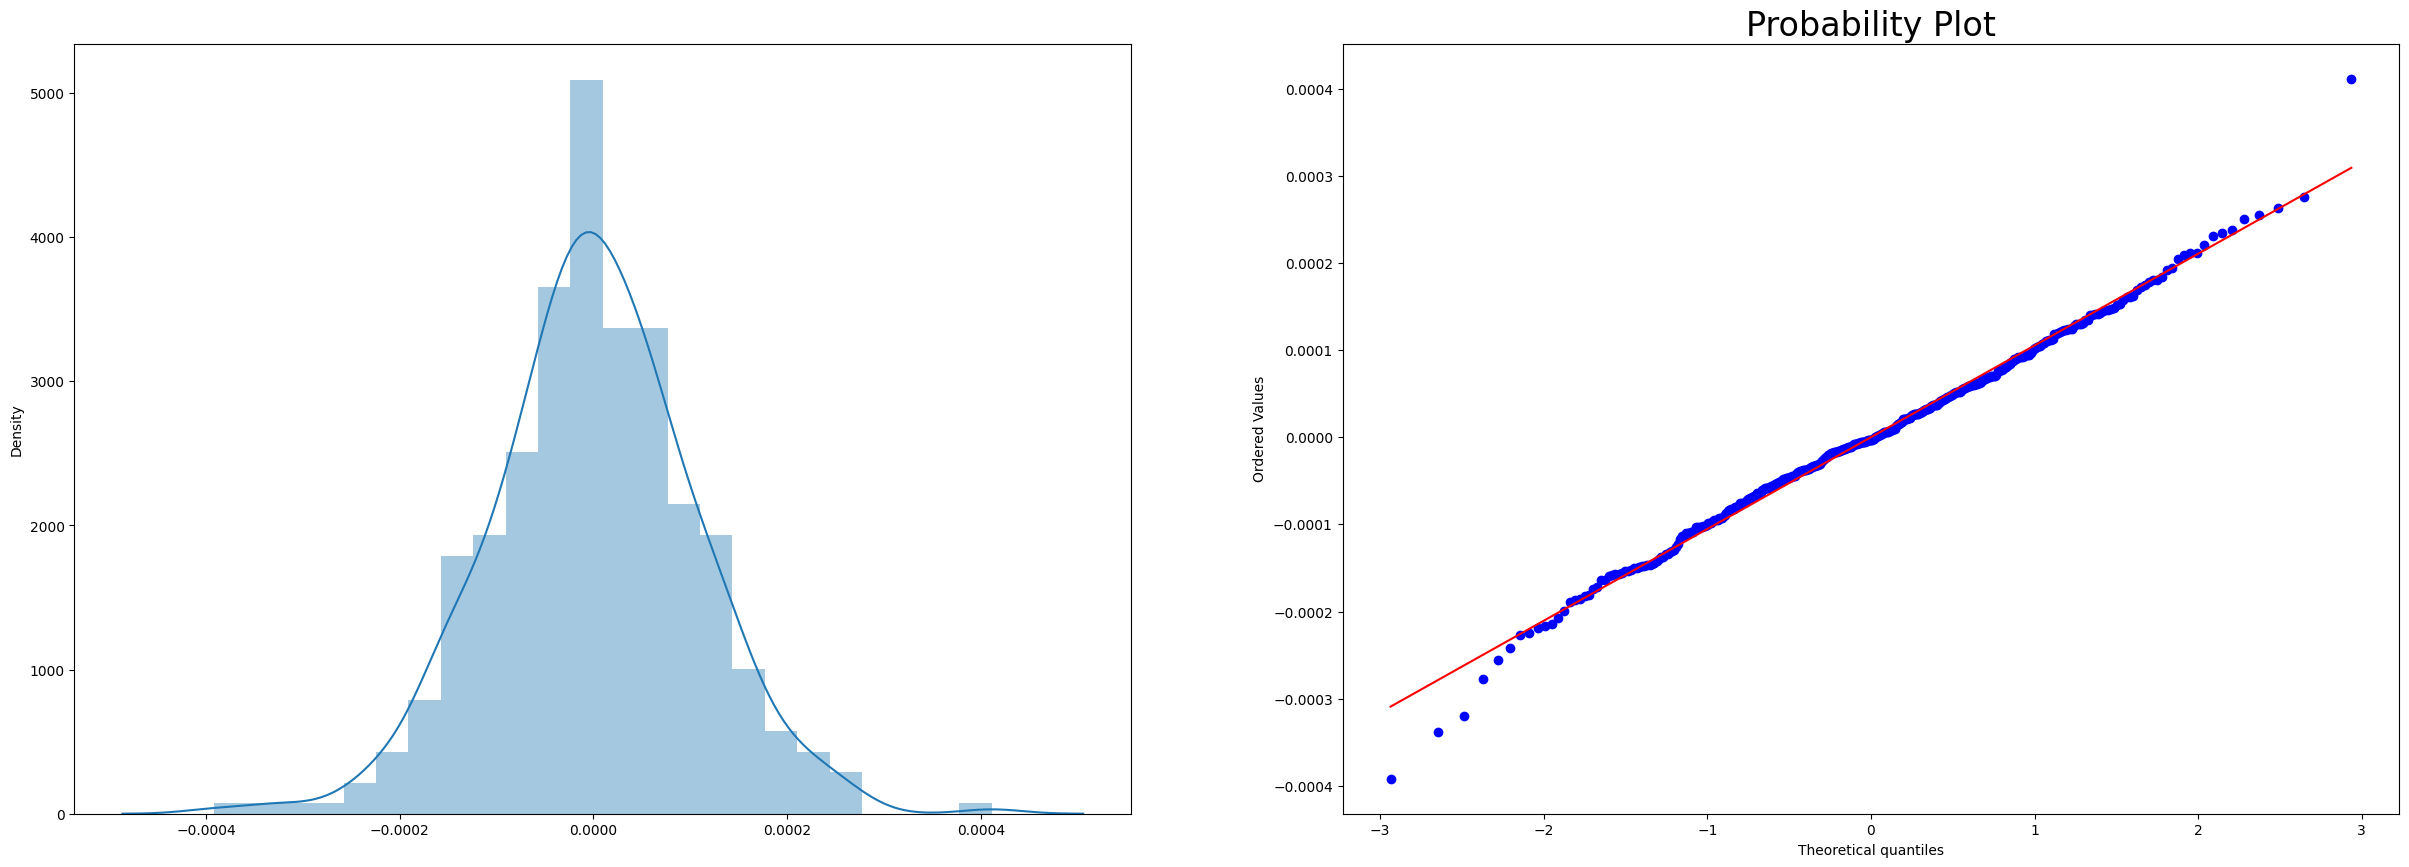

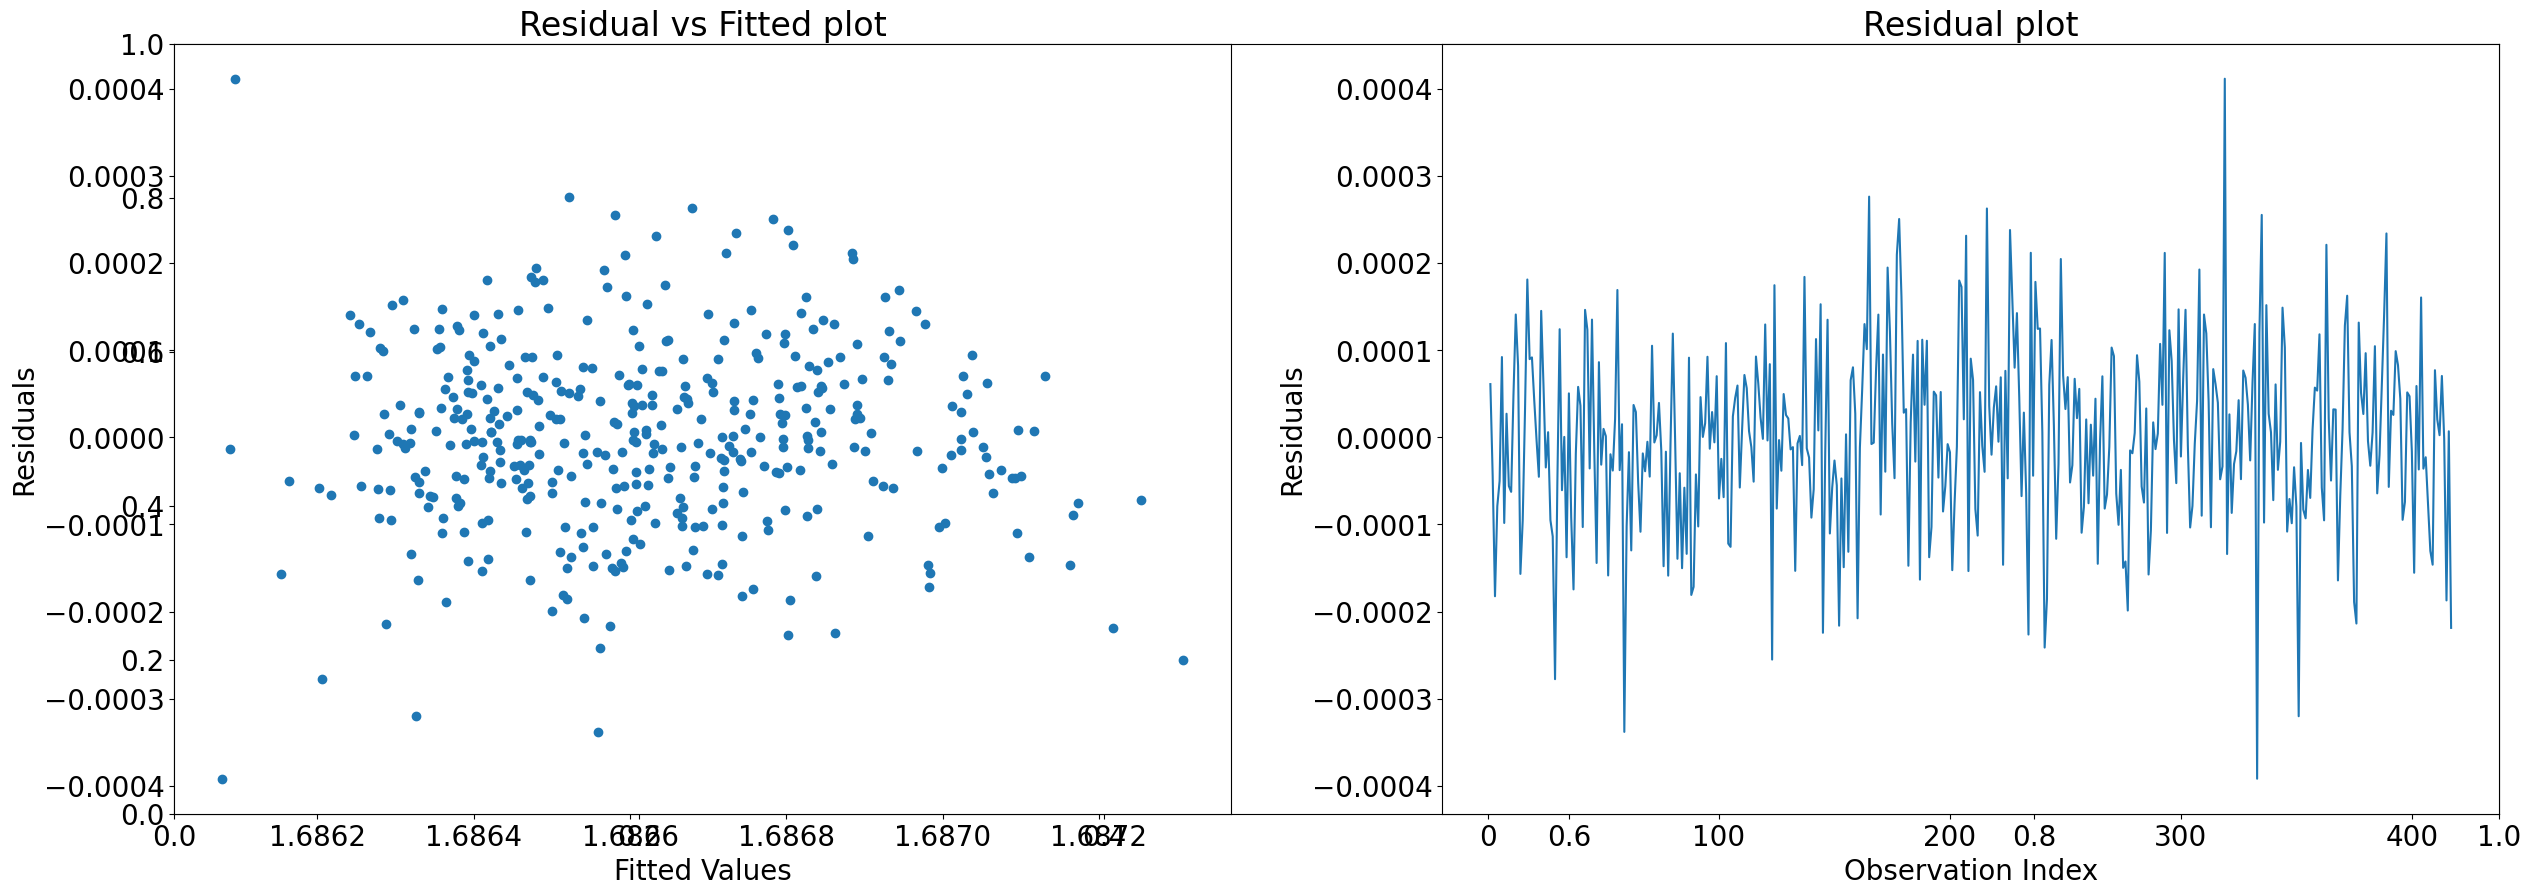

In [126]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
plt.rcParams['font.size'] = '20'
sns.distplot(residuals_sw, ax=ax1)
plt.title("Residual density plot")

sp.stats.probplot(residuals_sw, plot=ax2, fit=True)
plt.show()

plt.subplots(figsize=(30, 10))
plt.rcParams['font.size'] = '20'
plt.subplot(1, 2, 1)
plt.scatter(pred_sw, residuals_sw)  # Assuming pred_sw is defined somewhere
plt.title("Residual vs Fitted plot")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

plt.subplot(1, 2, 2)
plt.plot(residuals_sw)
plt.title("Residual plot")
plt.xlabel("Observation Index")
plt.ylabel("Residuals")
plt.show()

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [515]:
X1

x1  x2  x3  x4  x5  x6        x7  x9        x10  x11  x8_2  x8_3
220  7.731931   0   0   1   1   0  7.578657   1  10.148119    0     1     0
69   8.294050   1   1   1   0   1  7.590347   0  10.068790    0     0     0
374  7.664816   0   1   1   1   0  7.588830   1  10.629392    0     1     0
305  7.615791   1   1   1   1   0  7.580189   1   9.994881    0     1     0
173  8.196988   0   1   1   1   0  7.585281   0  10.055479    0     1     0
..        ...  ..  ..  ..  ..  ..       ...  ..        ...  ...   ...   ...
71   8.265907   0   1   1   0   0  7.596392   0  10.253369    0     0     0
106  8.165079   0   1   1   0   0  7.590347   0   9.896815    0     0     0
270  7.783224   0   1   1   1   0  7.588830   0  10.699800    0     1     0
435  7.454720   1   0   1   0   0  7.575585   1   9.305560    0     0     1
102  8.523573   1   1   1   0   0  7.595387   0   9.998798    0     0     0

[417 rows x 12 columns]

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Added variable plot

In [516]:
# fig = plt.figure(figsize=(30, 35))
# sm.graphics.plot_partregress_grid(model_sw, fig=fig)
# fig.tight_layout(pad=5)
# plt.show()

Observing the above plots ,  inclusion of ['x1', 'x7', 'x8_3', 'x10', 'x8_2', 'x4', 'x11', 'x5', 'x3'] columns in the model seems to be reasonable

# X1

In [517]:
# fig = plt.figure(figsize = (30,20))
# plt.rcParams['font.size'] = '20'
# sm.graphics.plot_regress_exog(model_sw, "x1", fig = fig)
# fig.tight_layout(pad=1.0)

This residual ·plot suggests that a linear relation for X1 is appropriate in the model already
containing other variables.
From the Partial regression plot, we can observe a positive linear relation for variable X1.

# X7

In [518]:
# fig = plt.figure(figsize = (30,20))
# plt.rcParams['font.size'] = '20'
# sm.graphics.plot_regress_exog(model_sw, "x7", fig = fig)
# fig.tight_layout(pad=1.0)

This residual ·plot suggests that a linear relation for X7 is appropriate in the model already
containing other variables.
From the Partial regression plot, we can observe a positive linear relation for variable X7.HOMOSCEDASTIC

# X10

In [519]:
# fig = plt.figure(figsize = (30,20))
# plt.rcParams['font.size'] = '20'
# sm.graphics.plot_regress_exog(model_sw, "x10", fig = fig)
# fig.tight_layout(pad=1.0)

- This residual ·plot suggests that a linear relation for X10 is appropriate in the model already
  containing other variables.
  From the Partial regression plot, we can observe a positive linear relation for variable X10.

- For categorical predictor variables, added variable plots are not typically used because the concept of adding one unit of a     categorical variable does not apply in the same way as it does for continuous variables.

# Checking for possible interaction terms

In [643]:
final1_X = X_sw
#final1_X.drop(columns = 'const' , inplace=True)
final1_X

const        x1        x7  x8_3        x10  x8_2  x4  x11  x5  x3  ...  \
0      1.0  7.731931  7.578657     0  10.148119     1   1    0   1   0  ...   
1      1.0  8.294050  7.590347     0  10.068790     0   1    0   0   1  ...   
2      1.0  7.664816  7.588830     0  10.629392     1   1    0   1   1  ...   
3      1.0  7.615791  7.580189     0   9.994881     1   1    0   1   1  ...   
4      1.0  8.196988  7.585281     0  10.055479     1   1    0   1   1  ...   
..     ...       ...       ...   ...        ...   ...  ..  ...  ..  ..  ...   
412    1.0  8.265907  7.596392     0  10.253369     0   1    0   0   1  ...   
413    1.0  8.165079  7.590347     0   9.896815     0   1    0   0   1  ...   
414    1.0  7.783224  7.588830     0  10.699800     1   1    0   1   1  ...   
415    1.0  7.454720  7.575585     1   9.305560     0   1    0   0   0  ...   
416    1.0  8.523573  7.595387     0   9.998798     0   1    0   0   1  ...   

        x10*x4  x10*x11     x10*x5     x10*x3      x1*x7     x1*x10  \
0    10.148119      0.0  10.148119   0.000000  58.597650  78.464550   
1    10.068790      0.0   0.000000  10.068790  62.954714  83.511045   
2    10.629392      0.0  10.629392  10.629392  58.166983  81.472334   
3     9.994881      0.0   9.994881   9.994881  57.729139  76.118925   
4    10.055479      0.0  10.055479  10.055479  62.176457  82.424638   
..         ...      ...        ...        ...        ...        ...   
412  10.253369      0.0   0.000000  10.253369  62.791075  84.753402   
413   9.896815      0.0   0.000000   9.896815  61.975784  80.808282   
414  10.699800      0.0  10.699800  10.699800  59.065563  83.278943   
415   9.305560      0.0   0.000000   0.000000  56.473862  69.370341   
416   9.998798      0.0   0.000000   9.998798  64.739836  85.225480   

         x7*x1     x7*x10     x10*x1     x10*x7  
0    58.597650  76.909108  78.464550  76.909108  
1    62.954714  76.425610  83.511045  76.425610  
2    58.166983  80.664650  81.472334  80.664650  
3    57.729139  75.763091  76.118925  75.763091  
4    62.176457  76.273633  82.424638  76.273633  
..         ...        ...        ...        ...  
412  62.791075  77.888617  84.753402  77.888617  
413  61.975784  75.120262  80.808282  75.120262  
414  59.065563  81.198965  83.278943  81.198965  
415  56.473862  70.495055  69.370341  70.495055  
416  64.739836  75.944741  85.225480  75.944741  

[417 rows x 37 columns]

In [521]:
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(final1_X)
# final1_standardized = pd.DataFrame(scaled_data, columns=final1_X[['x1','x7','x10']])

# # # Assuming final1_X is your DataFrame containing the original data

# for cols in ['x1','x7','x10']:
#     final1_X[cols] = final1_X[cols]/np.sqrt(final1_X.shape[0]-1)

In [522]:
final1_standardized = final1_X

In [523]:
final1_standardized

const        x1        x7  x8_3        x10  x8_2  x4  x11  x5  x3
220    1.0  7.731931  7.578657     0  10.148119     1   1    0   1   0
69     1.0  8.294050  7.590347     0  10.068790     0   1    0   0   1
374    1.0  7.664816  7.588830     0  10.629392     1   1    0   1   1
305    1.0  7.615791  7.580189     0   9.994881     1   1    0   1   1
173    1.0  8.196988  7.585281     0  10.055479     1   1    0   1   1
..     ...       ...       ...   ...        ...   ...  ..  ...  ..  ..
71     1.0  8.265907  7.596392     0  10.253369     0   1    0   0   1
106    1.0  8.165079  7.590347     0   9.896815     0   1    0   0   1
270    1.0  7.783224  7.588830     0  10.699800     1   1    0   1   1
435    1.0  7.454720  7.575585     1   9.305560     0   1    0   0   0
102    1.0  8.523573  7.595387     0   9.998798     0   1    0   0   1

[417 rows x 10 columns]

In [524]:
import numpy as np

numerical_cols = ['x1', 'x7', 'x10']
categorical_cols = ['x8_3', 'x8_2', 'x4', 'x11', 'x5', 'x3']

# Adding squared terms for numerical columns
for col in numerical_cols:
    squared_col = f"{col}^2"
    if squared_col not in final1_standardized.columns:
        final1_standardized[squared_col] = np.square(final1_standardized[col])

# Adding interaction terms
for num_col in numerical_cols:
    for cat_col in categorical_cols:
        interaction_col = f"{num_col}*{cat_col}"
        if interaction_col not in final1_standardized.columns:
            # Convert categorical column to numerical representation
            numerical_cat_col = pd.Categorical(final1_standardized[cat_col]).codes
            final1_standardized[interaction_col] = final1_standardized[num_col] * numerical_cat_col

# Adding interaction terms between numerical columns
for col1 in numerical_cols:
    for col2 in numerical_cols:
        if col1 != col2:
            interaction_col = f"{col1}*{col2}"
            if interaction_col not in final1_standardized.columns:
                final1_standardized[interaction_col] = final1_standardized[col1] * final1_standardized[col2]


In [525]:
#final1_standardized.drop(columns='const')
final1_standardized

const        x1        x7  x8_3        x10  x8_2  x4  x11  x5  x3  ...  \
220    1.0  7.731931  7.578657     0  10.148119     1   1    0   1   0  ...   
69     1.0  8.294050  7.590347     0  10.068790     0   1    0   0   1  ...   
374    1.0  7.664816  7.588830     0  10.629392     1   1    0   1   1  ...   
305    1.0  7.615791  7.580189     0   9.994881     1   1    0   1   1  ...   
173    1.0  8.196988  7.585281     0  10.055479     1   1    0   1   1  ...   
..     ...       ...       ...   ...        ...   ...  ..  ...  ..  ..  ...   
71     1.0  8.265907  7.596392     0  10.253369     0   1    0   0   1  ...   
106    1.0  8.165079  7.590347     0   9.896815     0   1    0   0   1  ...   
270    1.0  7.783224  7.588830     0  10.699800     1   1    0   1   1  ...   
435    1.0  7.454720  7.575585     1   9.305560     0   1    0   0   0  ...   
102    1.0  8.523573  7.595387     0   9.998798     0   1    0   0   1  ...   

        x10*x4  x10*x11     x10*x5     x10*x3      x1*x7     x1*x10  \
220  10.148119      0.0  10.148119   0.000000  58.597650  78.464550   
69   10.068790      0.0   0.000000  10.068790  62.954714  83.511045   
374  10.629392      0.0  10.629392  10.629392  58.166983  81.472334   
305   9.994881      0.0   9.994881   9.994881  57.729139  76.118925   
173  10.055479      0.0  10.055479  10.055479  62.176457  82.424638   
..         ...      ...        ...        ...        ...        ...   
71   10.253369      0.0   0.000000  10.253369  62.791075  84.753402   
106   9.896815      0.0   0.000000   9.896815  61.975784  80.808282   
270  10.699800      0.0  10.699800  10.699800  59.065563  83.278943   
435   9.305560      0.0   0.000000   0.000000  56.473862  69.370341   
102   9.998798      0.0   0.000000   9.998798  64.739836  85.225480   

         x7*x1     x7*x10     x10*x1     x10*x7  
220  58.597650  76.909108  78.464550  76.909108  
69   62.954714  76.425610  83.511045  76.425610  
374  58.166983  80.664650  81.472334  80.664650  
305  57.729139  75.763091  76.118925  75.763091  
173  62.176457  76.273633  82.424638  76.273633  
..         ...        ...        ...        ...  
71   62.791075  77.888617  84.753402  77.888617  
106  61.975784  75.120262  80.808282  75.120262  
270  59.065563  81.198965  83.278943  81.198965  
435  56.473862  70.495055  69.370341  70.495055  
102  64.739836  75.944741  85.225480  75.944741  

[417 rows x 37 columns]

In [526]:
Y_sw

220    1.686660
69     1.687056
374    1.686560
305    1.686541
173    1.686861
         ...   
71     1.687201
106    1.687022
270    1.686617
435    1.686358
102    1.686999
Name: y_box, Length: 417, dtype: float64

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [527]:
from sklearn.preprocessing import StandardScaler

# Assuming X_sw contains your numerical features
scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X_sw)

Y_std = (scaler.fit_transform(pd.DataFrame(Y_sw))/np.sqrt(len(Y_sw)-1))

In [528]:
# Assuming Y_stanadrdized contains your standardized target variable
Y_std = pd.DataFrame(Y_std, columns=['y_std'])
Y_std

y_std
0    0.007695
1    0.084061
2   -0.011432
3   -0.015277
4    0.046538
..        ...
412  0.112008
413  0.077458
414 -0.000488
415 -0.050387
416  0.073058

[417 rows x 1 columns]

In [529]:
# Resetting indices for Y_std and final1_standardized
Y_std.reset_index(drop=True, inplace=True)
final1_standardized.reset_index(drop=True, inplace=True)

# Fitting the model
model_itr = sm.OLS(Y_std, final1_standardized).fit()
pred_itr = model_itr.predict(final1_standardized)

# Calculating residuals
residuals_itr = Y_std - pred_itr  # Use Y_std instead of Y_stanadrdized

# Get summary of the model
summary_itr = model_itr.summary()
print(summary_itr)

                            OLS Regression Results                            
Dep. Variable:                  y_std   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     68.59
Date:                Fri, 19 Apr 2024   Prob (F-statistic):          1.38e-139
Time:                        21:31:03   Log-Likelihood:                 1068.7
No. Observations:                 417   AIC:                            -2069.
Df Residuals:                     383   BIC:                            -1932.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1195.7577    765.058      1.563      0.1

In [530]:
# Initialize empty lists to store attributes and p-values
attributes = []
p_values = []

# Iterate over each attribute in the final1_standardized columns
for attribute in final1_standardized.columns:
    # Check if the p-value for the attribute is greater than 0.05 and if the attribute is present in X_sw.columns
    if model_itr.pvalues[attribute] > 0.05 and attribute in X_sw.columns:
        # Append the attribute name and its p-value to the respective lists
        attributes.append(attribute)
        p_values.append(model_itr.pvalues[attribute])

# Create a DataFrame from the lists of attributes and p-values
itr_tab = pd.DataFrame({"Attribute": attributes, "p-value": p_values})
itr_tab

Attribute   p-value
0      const  0.118887
1         x1  0.133470
2         x7  0.135355
3       x8_2  0.050617
4         x4  0.843426
5        x11  0.378903
6         x5  0.236926
7         x3  0.785285
8       x1^2  0.182776
9       x7^2  0.154335
10     x10^2  0.126425
11     x1*x4  0.829415
12    x1*x11  0.971633
13     x1*x3  0.883265
14   x7*x8_2  0.079394
15     x7*x4  0.819085
16    x7*x11  0.388489
17     x7*x5  0.225614
18     x7*x3  0.783167
19  x10*x8_3  0.173426
20  x10*x8_2  0.127961
21    x10*x4  0.249431
22   x10*x11  0.678485
23    x10*x3  0.693313
24     x1*x7  0.117749
25    x1*x10  0.260655
26     x7*x1  0.117749
27    x10*x1  0.260655

In [531]:
def stepwise_selection(X, y, 
                           initial_list=[], 
                           threshold_in=0.05, 
                           threshold_out = 0.05, 
                           verbose=True):
        """ Perform a forward-backward feature selection 
        based on p-value from statsmodels.api.OLS
        Arguments:
            X - pandas.DataFrame with candidate features
            y - list-like with the target
            initial_list - list of features to start with (column names of X)
            threshold_in - include a feature if its p-value < threshold_in
            threshold_out - exclude a feature if its p-value > threshold_out
            verbose - whether to print the sequence of inclusions and exclusions
        Returns: list of selected features 
        Always set threshold_in < threshold_out to avoid infinite looping.
        See https://en.wikipedia.org/wiki/Stepwise_regression for the details
        """
        included = list(initial_list)
        while True:
            changed=False
            # forward step
            excluded = list(set(X.columns)-set(included))
            new_pval = pd.Series(index=excluded)
            for new_column in excluded:
                model = sm.OLS(y,(pd.DataFrame(X[included+[new_column]]))).fit()
                new_pval[new_column] = model.pvalues[new_column]
            best_pval = new_pval.min()
            if best_pval < threshold_in:
                best_feature = new_pval.idxmin()
                included.append(best_feature)
                changed=True
                if verbose:
                    print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

            # backward step
            model = sm.OLS(y,(pd.DataFrame(X[included]))).fit()
            # use all coefs except intercept
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max() # null if pvalues is empty
            if worst_pval > threshold_out:
                changed=True
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                if verbose:
                    print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
            if not changed:
                break
        return included

result = stepwise_selection(final1_standardized, Y_std)

print('resulting features:')
print(result)

Add  x8_3                           with p-value 2.77515e-30
Add  x1*x3                          with p-value 2.01598e-41
Add  x3                             with p-value 6.05992e-33
Add  x1*x8_3                        with p-value 7.5847e-16
Add  x8_2                           with p-value 1.4539e-16
Add  x10^2                          with p-value 5.93475e-09
Add  x1*x8_2                        with p-value 1.64804e-20
Drop x1*x3                          with p-value 0.564178
Add  x7*x8_3                        with p-value 1.29545e-06
Add  x7*x8_2                        with p-value 0.000119883
Add  x10*x4                         with p-value 0.005473
Add  x10*x8_2                       with p-value 0.00078509
resulting features:
['x8_3', 'x3', 'x1*x8_3', 'x8_2', 'x10^2', 'x1*x8_2', 'x7*x8_3', 'x7*x8_2', 'x10*x4', 'x10*x8_2']


In [532]:
final_features =['x8_3', 'x3', 'x1*x8_3', 'x8_2', 'x10^2', 'x1*x8_2', 'x7*x8_3', 'x7*x8_2', 'x10*x4', 'x10*x8_2']

## These are the final model features with interaction terms
final_features

['x8_3',
 'x3',
 'x1*x8_3',
 'x8_2',
 'x10^2',
 'x1*x8_2',
 'x7*x8_3',
 'x7*x8_2',
 'x10*x4',
 'x10*x8_2']

In [533]:
model_itr2 = sm.OLS(Y_std, final1_standardized[final_features]).fit()
summary_itr2 = model_itr2.summary()
print(summary_itr2)

                                 OLS Regression Results                                
Dep. Variable:                  y_std   R-squared (uncentered):                   0.843
Model:                            OLS   Adj. R-squared (uncentered):              0.840
Method:                 Least Squares   F-statistic:                              219.3
Date:                Fri, 19 Apr 2024   Prob (F-statistic):                   4.94e-157
Time:                        21:31:08   Log-Likelihood:                          1052.3
No. Observations:                 417   AIC:                                     -2085.
Df Residuals:                     407   BIC:                                     -2044.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [534]:
pred_itr2 = model_itr2.predict(final1_standardized[final_features])
pd.DataFrame(pred_itr2)

0
0   -0.002366
1    0.078144
2    0.024148
3   -0.001752
4    0.059685
..        ...
412  0.080304
413  0.076164
414  0.037292
415 -0.046094
416  0.077335

[417 rows x 1 columns]

In [535]:

np.array(Y_std)

array([[ 7.69474887e-03],
       [ 8.40613222e-02],
       [-1.14318025e-02],
       [-1.52766732e-02],
       [ 4.65377762e-02],
       [-1.02389662e-02],
       [-1.65108153e-02],
       [ 3.84446801e-02],
       [ 4.77682225e-02],
       [ 1.19344999e-02],
       [ 1.10116603e-02],
       [ 4.25465948e-02],
       [ 5.61008486e-02],
       [-1.20046301e-01],
       [ 1.14744987e-02],
       [-2.56452929e-02],
       [ 9.60583447e-03],
       [ 2.64433740e-02],
       [-1.20501883e-02],
       [-1.84964518e-02],
       [-2.91649941e-02],
       [ 3.19576901e-03],
       [ 9.46123290e-02],
       [-2.91649941e-02],
       [ 2.82571157e-02],
       [-3.70539757e-02],
       [-2.19107916e-02],
       [ 1.92598538e-03],
       [-1.33158443e-01],
       [-1.25482044e-02],
       [-2.69259679e-02],
       [-7.48005705e-02],
       [ 1.89305539e-02],
       [-4.48648932e-02],
       [-3.31034763e-02],
       [-8.35565632e-02],
       [-7.25660904e-03],
       [ 1.23916921e-02],
       [ 4.8

In [536]:
# Assuming Y_std is a DataFrame or Series and model_itr2.predict() returns a 1D array

# Convert the predicted values to a DataFrame or Series for easier handling
predictions = pd.Series(model_itr2.predict(final1_standardized[final_features]))

# Ensure the shapes are consistent for subtraction
if isinstance(Y_std, pd.DataFrame):
    m = np.array(Y_std.iloc[:, 0]) - np.array(predictions)
elif isinstance(Y_std, pd.Series):
    m = np.array(Y_std) - np.array(predictions)
else:
    raise ValueError("Unsupported data type for Y_std. Must be DataFrame or Series.")

# Create a DataFrame from the residuals
residuals_df = pd.DataFrame(m)
residuals_itr2 =residuals_df


The regression model shows a good overall fit, with approximately 84.3% of the variance in the dependent variable explained by the predictors. The model is statistically significant, indicating that at least one of the predictors has a significant effect on the dependent variable.

Among the predictors, variables such as x8_3, x3, x1*x8_3, x8_2, x10^2, x1*x8_2, x7*x8_3, x7*x8_2, x10*x4, and x10*x8_2 demonstrate significant effects on the dependent variable, as their p-values are less than 0.05. These coefficients provide insights into how each predictor influences the dependent variable, holding other variables constant.

However, there are some potential issues to address. The Jarque-Bera test suggests that the residuals may not be normally distributed, and the large condition number indicates potential multicollinearity problems. Additionally, the Durbin-Watson statistic suggests possible autocorrelation in the residuals.

Overall, while the model shows promise in explaining the variance in the dependent variable, further investigation and potentially model refinement are warranted to address the issues identified.

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [537]:
pred_itr2=pd.DataFrame(pred_itr2)
pred_itr2

0
0   -0.002366
1    0.078144
2    0.024148
3   -0.001752
4    0.059685
..        ...
412  0.080304
413  0.076164
414  0.037292
415 -0.046094
416  0.077335

[417 rows x 1 columns]

In [538]:
residuals_itr2

0
0    0.010061
1    0.005917
2   -0.035580
3   -0.013524
4   -0.013148
..        ...
412  0.031704
413  0.001294
414 -0.037780
415 -0.004293
416 -0.004277

[417 rows x 1 columns]

In [539]:
pred_itr2

0
0   -0.002366
1    0.078144
2    0.024148
3   -0.001752
4    0.059685
..        ...
412  0.080304
413  0.076164
414  0.037292
415 -0.046094
416  0.077335

[417 rows x 1 columns]

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [540]:
import scipy.stats as stats

# # Assuming residuals_itr2 is a DataFrame or Series
# if isinstance(residuals_itr2, pd.DataFrame):
#     residuals_itr2 = residuals_itr2.iloc[:, 0]  # Extracting the first column if it's a DataFrame
# elif not isinstance(residuals_itr2, pd.Series):
#     raise ValueError("residuals_itr2 must be a DataFrame or Series.")

# # Plotting the Q-Q plot
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
# plt.rcParams['font.size'] = '20'
# sns.distplot(residuals_itr2, ax=ax1)
# ax1.set_title("Residual density plot")

# stats.probplot(residuals_itr2, plot=ax2, fit=True)
# plt.show()

# # Plotting Residual vs Fitted and Residual plot
# plt.subplots(figsize=(30, 10))
# plt.rcParams['font.size'] = '20'

# plt.subplot(1, 2, 1)
# plt.scatter(pred_itr2, residuals_itr2)
# plt.title("Residual vs Fitted plot")

# plt.subplot(1, 2, 2)
# plt.plot(residuals_itr2)
# plt.title("Residual plot")
# plt.show()


- This will be our final model

# OUTLIER DETECTION

In [541]:
import itertools
from itertools import chain, combinations
import statsmodels.formula.api as sm
import scipy.stats as scipystats
import statsmodels.api as sm
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats 
from statsmodels.graphics.regressionplots import *
import copy
from sklearn.model_selection import train_test_split
import math
import time

In [542]:
## Hat matrix diagonal entries
final_model = model_itr2
influence = final_model.get_influence()
h_ii = pd.Series(influence.hat_matrix_diag)

In [543]:
influence = model_itr2.get_influence()
inf_sum = influence.summary_frame()
inf_sum = pd.DataFrame(inf_sum)

In [544]:
inf_sum

dfb_x8_3    dfb_x3  dfb_x1*x8_3  dfb_x8_2  dfb_x10^2  dfb_x1*x8_2  \
0    0.002877 -0.049555     0.000800  0.027453   0.017964     0.021673   
1   -0.001035  0.003841    -0.002001  0.000859   0.021771    -0.001478   
2   -0.013961 -0.073966     0.008661  0.072365   0.056899     0.076353   
3   -0.005733 -0.045806     0.004154 -0.046646   0.030608     0.036242   
4   -0.003205  0.010134     0.000899 -0.008264   0.000716    -0.091891   
..        ...       ...          ...       ...        ...          ...   
412 -0.007969  0.012786    -0.009931  0.002827   0.129121    -0.004939   
413 -0.000138  0.001132    -0.000468  0.000254   0.004313    -0.000435   
414 -0.015222 -0.047459     0.008136  0.084034   0.046672     0.007177   
415 -0.009938 -0.001379     0.000266 -0.002651   0.014847     0.000281   
416  0.000628 -0.003171     0.001487 -0.000711  -0.015128     0.001220   

     dfb_x7*x8_3  dfb_x7*x8_2  dfb_x10*x4  dfb_x10*x8_2   cooks_d  \
0      -0.002988    -0.028323    0.014086      0.000220  0.000502   
1       0.001071    -0.000740    0.001200     -0.006331  0.000187   
2       0.013643    -0.070625   -0.025936     -0.200303  0.006221   
3       0.005561     0.045416   -0.008534      0.005174  0.000630   
4       0.003206     0.011319   -0.009596      0.005354  0.001133   
..           ...          ...         ...           ...       ...   
412     0.008127    -0.002233    0.002232     -0.036974  0.005750   
413     0.000147    -0.000226    0.000416     -0.001275  0.000008   
414     0.014966    -0.079267   -0.032788     -0.228283  0.007359   
415     0.009986     0.002749   -0.018242     -0.004357  0.000074   
416    -0.000656     0.000623   -0.001077      0.004428  0.000095   

     standard_resid  hat_diag  dffits_internal  student_resid    dffits  
0          0.517169  0.018412         0.070830       0.516703  0.070766  
1          0.304362  0.019774         0.043229       0.304023  0.043181  
2         -1.828757  0.018262        -0.249424      -1.834060 -0.250147  
3         -0.693254  0.012941        -0.079379      -0.692811 -0.079328  
4         -0.677772  0.024078        -0.106459      -0.677321 -0.106388  
..              ...       ...              ...            ...       ...  
412        1.631904  0.021136         0.239800       1.635256  0.240293  
413        0.066512  0.018628         0.009164       0.066431  0.009152  
414       -1.942696  0.019126        -0.271272      -1.949367 -0.272204  
415       -0.220302  0.015076        -0.027256      -0.220045 -0.027224  
416       -0.219921  0.019294        -0.030847      -0.219664 -0.030811  

[417 rows x 16 columns]

In [545]:

student_resid = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag


In [546]:
inf_sum = inf_sum[['standard_resid', 'student_resid', 'hat_diag', 'cooks_d', 'dffits_internal', 'dffits']]
inf_sum


standard_resid  student_resid  hat_diag   cooks_d  dffits_internal  \
0          0.517169       0.516703  0.018412  0.000502         0.070830   
1          0.304362       0.304023  0.019774  0.000187         0.043229   
2         -1.828757      -1.834060  0.018262  0.006221        -0.249424   
3         -0.693254      -0.692811  0.012941  0.000630        -0.079379   
4         -0.677772      -0.677321  0.024078  0.001133        -0.106459   
..              ...            ...       ...       ...              ...   
412        1.631904       1.635256  0.021136  0.005750         0.239800   
413        0.066512       0.066431  0.018628  0.000008         0.009164   
414       -1.942696      -1.949367  0.019126  0.007359        -0.271272   
415       -0.220302      -0.220045  0.015076  0.000074        -0.027256   
416       -0.219921      -0.219664  0.019294  0.000095        -0.030847   

       dffits  
0    0.070766  
1    0.043181  
2   -0.250147  
3   -0.079328  
4   -0.106388  
..        ...  
412  0.240293  
413  0.009152  
414 -0.272204  
415 -0.027224  
416 -0.030811  

[417 rows x 6 columns]

In [547]:

inf_sum['y'] = (Y_std)


In [548]:
inf_sum

standard_resid  student_resid  hat_diag   cooks_d  dffits_internal  \
0          0.517169       0.516703  0.018412  0.000502         0.070830   
1          0.304362       0.304023  0.019774  0.000187         0.043229   
2         -1.828757      -1.834060  0.018262  0.006221        -0.249424   
3         -0.693254      -0.692811  0.012941  0.000630        -0.079379   
4         -0.677772      -0.677321  0.024078  0.001133        -0.106459   
..              ...            ...       ...       ...              ...   
412        1.631904       1.635256  0.021136  0.005750         0.239800   
413        0.066512       0.066431  0.018628  0.000008         0.009164   
414       -1.942696      -1.949367  0.019126  0.007359        -0.271272   
415       -0.220302      -0.220045  0.015076  0.000074        -0.027256   
416       -0.219921      -0.219664  0.019294  0.000095        -0.030847   

       dffits         y  
0    0.070766  0.007695  
1    0.043181  0.084061  
2   -0.250147 -0.011432  
3   -0.079328 -0.015277  
4   -0.106388  0.046538  
..        ...       ...  
412  0.240293  0.112008  
413  0.009152  0.077458  
414 -0.272204 -0.000488  
415 -0.027224 -0.050387  
416 -0.030811  0.073058  

[417 rows x 7 columns]

Text(0, 0.5, 'Studentized Residuals')

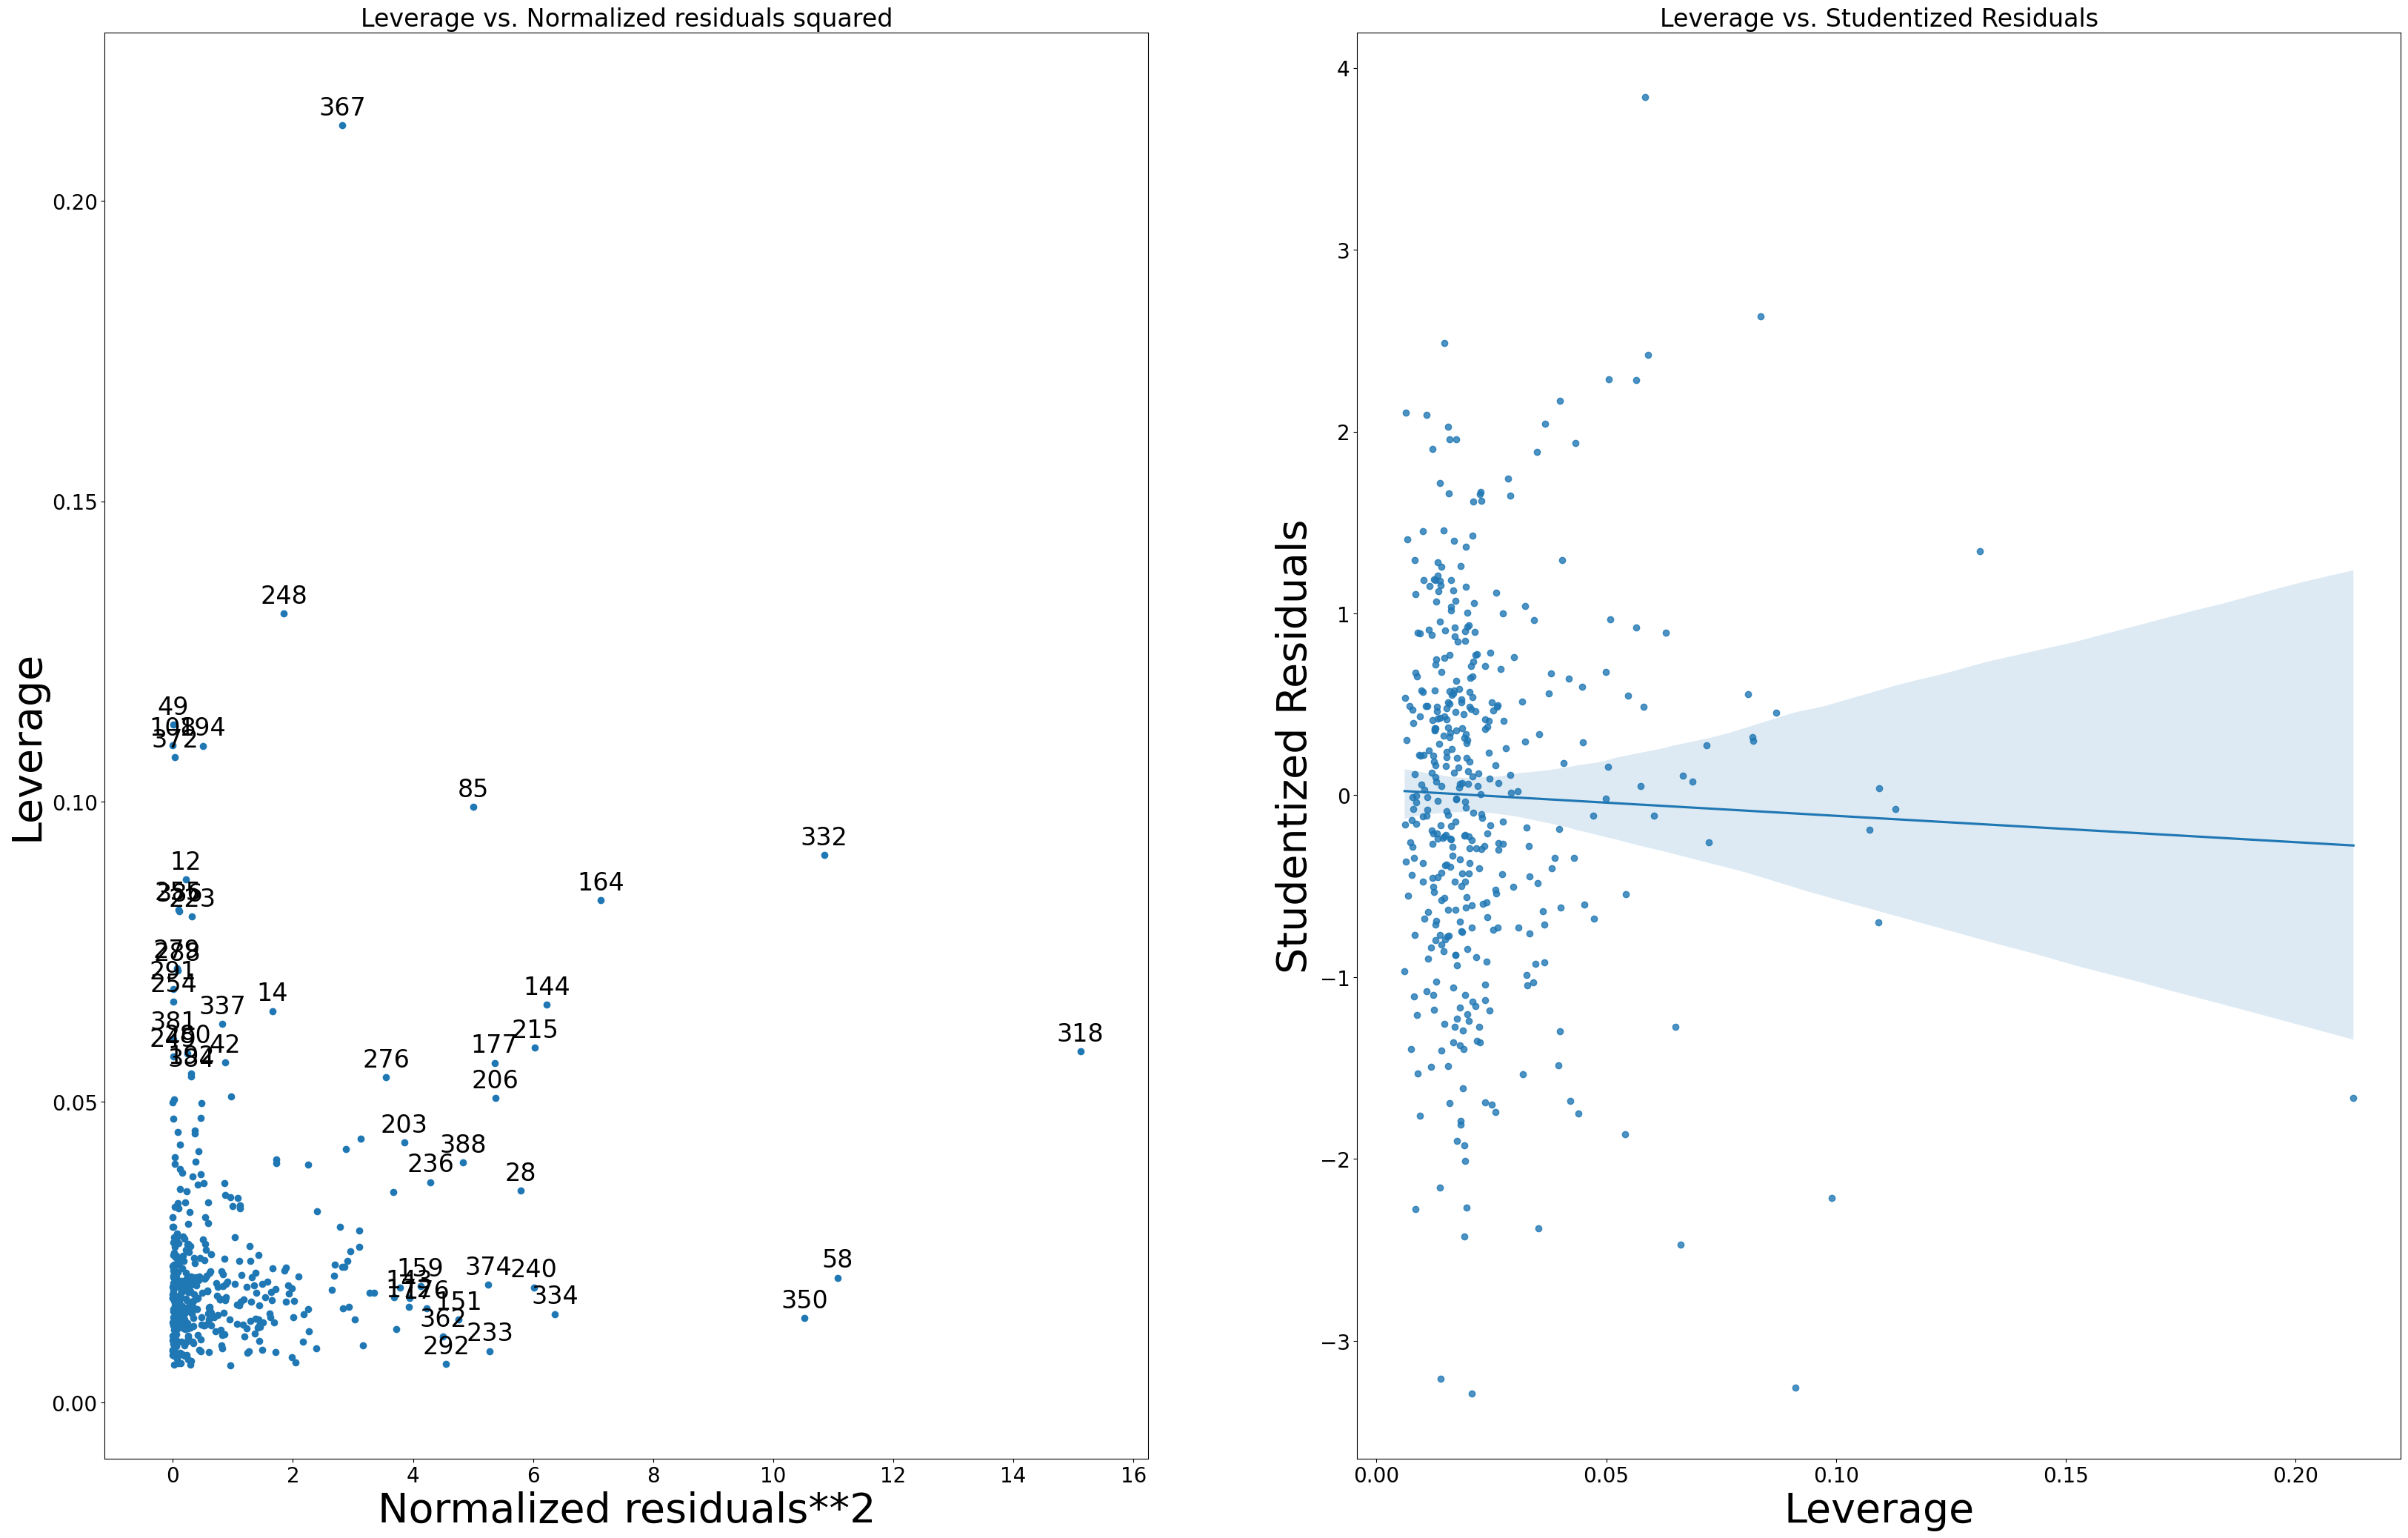

In [549]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(40, 25))
plt.rcParams['font.size'] = '20'
plt.rc('axes', labelsize = 40)
plot_leverage_resid2(final_model, ax=ax1)

plt.rcParams['font.size'] = '20'
sns.regplot(x=leverage, y=final_model.resid_pearson, ax=ax2)
plt.title('Leverage vs. Studentized Residuals')
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')

# Use of hat matrix for identifying outlying observations 
Considering the observations with large residuals and high leverage values as influential. We 
plotted the flowing plots to visualize the influential observations

We can clearly notice many outlying cases with high leverage values in plots. Any 
observation with leverage value greater than 2p/n is considered to be outlying in their X 
values. Given below are the values and index with leverage values greater than 2p/n –


# Residual Method

In [550]:
r = inf_sum.student_resid
print ('-'*30 + ' studentized residual ' + '-'*30)
print (r.describe())
print ('\n')

r_sort = inf_sum.sort_values(by = 'student_resid')
print ('-'*20 + ' top 5 most negative stundentized residuals ' + '-'*20)
print (r_sort['student_resid'].head())
print ('\n')

print ('-'*20 + ' top 5 most positive studentized residuals ' + '-'*20)
print (r_sort['student_resid'].tail())

------------------------------ studentized residual ------------------------------
count    417.000000
mean      -0.003332
std        1.008495
min       -3.462294
25%       -0.612257
50%        0.044455
75%        0.572323
max        4.028973
Name: student_resid, dtype: float64


-------------------- top 5 most negative stundentized residuals --------------------
332   -3.462294
58    -3.367213
350   -3.268387
144   -2.572425
240   -2.464184
Name: student_resid, dtype: float64


-------------------- top 5 most positive studentized residuals --------------------
177    2.365062
215    2.514388
334    2.523808
164    2.774231
318    4.028973
Name: student_resid, dtype: float64


In [551]:
## printing y values which is outlier

print (inf_sum.y[abs(r) > 2])

28    -0.133158
58    -0.076741
85    -0.035421
144    0.003452
151   -0.050293
159   -0.055240
164    0.034401
176    0.035230
177    0.079713
206    0.047197
215    0.061923
233   -0.008407
236    0.007203
240   -0.057656
292    0.060631
318   -0.021911
332   -0.179878
334    0.041508
350   -0.118280
362    0.078947
374   -0.085527
388    0.067296
Name: y, dtype: float64


Now that we identified outliers, we need to see which observations can be considered to have leverage values. As discussed earlier, the leverage cutoff can be calculated as (2k+2)/n where k is the number of predictors and n is the sample size.

In [552]:
#Identify high leverage
#point with leverage = (2k+2)/n 
#k = number of predictors (11)
#n = number of observations (506)
# ((2*12)+2)/264 = 0.09848 any numbner higher than this is high leverage
thres_hii= 2*(len(final_features)+1)/len(inf_sum.y)
inf_hii = pd.DataFrame(inf_sum[['y', 'hat_diag']][abs(inf_sum.hat_diag) > thres_hii])
inf_hii

y  hat_diag
12   0.056101  0.087028
14   0.011474  0.065126
42   0.020579  0.056544
49   0.026443  0.112843
85  -0.035421  0.099125
108 -0.091658  0.109364
144  0.003452  0.066157
164  0.034401  0.083575
177  0.079713  0.056493
192 -0.033817  0.054741
194 -0.003284  0.109280
215  0.061923  0.059020
223  0.018092  0.080839
248 -0.055140  0.131322
249  0.051700  0.057529
254 -0.034215  0.066727
255 -0.005489  0.081942
276 -0.061286  0.054130
279  0.056570  0.072286
280 -0.003731  0.058106
288 -0.105004  0.071827
291  0.008654  0.068754
318 -0.021911  0.058401
332 -0.179878  0.091120
337 -0.059196  0.062951
367 -0.060235  0.212551
372  0.044431  0.107341
381 -0.038716  0.060380
384 -0.035421  0.054242
386  0.009606  0.081755

In [553]:
# #Plot influential observations by cooks distance
# #Use residual squared to restrict the graph but preserve the relative position of observations

# from statsmodels.graphics.regressionplots import *
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(40, 25))
# plt.rcParams['font.size'] = '20'
# plt.rc('figure', titlesize = 30)
# influence_plot(final_model, ax=ax1, size=50)


# plt.rcParams['font.size'] = '20'
# influence_plot(final_model, ax=ax2, size=50, criterion='DFFITS')
# plt.show()

# Identifying Influential Cases-DFFITS, Cook's Distance~ and DFBETAS Measures
- DFFITS :
As a guideline for identifying influential cases, we suggest considering a case influential 
if the absolute value of DFFITS exceeds 1 for small to medium data sets and 2*root(P/n). In for 
large data sets.


- Cook's Distance :
We have used the thumb rule that Cook's Distance of more than 3 times the mean is a possible outlier. Based on the rule we have decided.

- DFBETAS :
As a guideline for identifying influential cases, 
we recommend considering a case influential if the absolute value of DFBETAS exceeds 1 
for small to medium data sets and 2/root(n) for large data sets.


# DFFITS

In [554]:
## Influential cases by DFFITS
thres_dfts = 2*math.sqrt((len(final_features)+1)/len(inf_sum.y))
inf_dffits = pd.DataFrame(inf_sum[['y','dffits']][abs(inf_sum.dffits) > thres_dfts])
inf_dffits                         

y    dffits
14   0.011474 -0.348375
28  -0.133158 -0.466175
58  -0.076741 -0.490019
85  -0.035421 -0.778077
144  0.003452 -0.684688
164  0.034401  0.837783
177  0.079713  0.578718
203 -0.004351  0.422656
206  0.047197  0.545030
215  0.061923  0.629712
236  0.007203  0.407877
240 -0.057656 -0.344370
241 -0.055140 -0.384788
248 -0.055140  0.560525
276 -0.061286 -0.460300
318 -0.021911  1.003394
332 -0.179878 -1.096271
336 -0.033420  0.367469
350 -0.118280 -0.389598
367 -0.060235 -0.976482
374 -0.085527 -0.325255
388  0.067296  0.453570
408  0.041508 -0.361003

Text(0.5, 1.0, 'Index Influece plot - DFFITS')

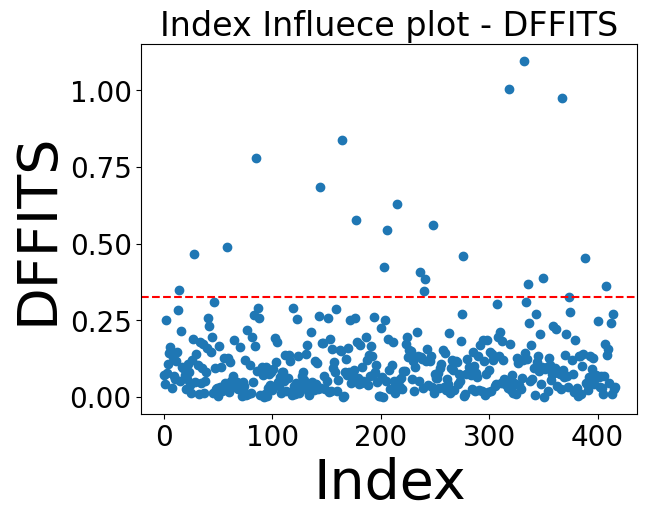

In [555]:
thres_dfts=0.3248
plt.scatter(x= range(0,len(inf_sum.y)), y = abs(inf_sum.dffits))
plt.axhline(y = thres_dfts, color = 'r', linestyle = '--')
plt.rcParams['font.size'] = '20'
plt.xlabel("Index")
plt.ylabel("DFFITS")
plt.title("Index Influece plot - DFFITS")

Observations above the red line are Influential cases according to DFFITS.

# COOK'S DISTANCE

In [556]:
#Cook's D of more than 3 times the mean is a possible outlier

import scipy
thres_cooks = 3*inf_sum.cooks_d.mean()
inf_cooks=pd.DataFrame((inf_sum[['y', 'cooks_d']][abs(inf_sum.cooks_d) > thres_cooks]))
inf_cooks

y   cooks_d
14   0.011474  0.012114
28  -0.133158  0.021471
58  -0.076741  0.023417
85  -0.035421  0.059878
144  0.003452  0.046242
164  0.034401  0.069052
177  0.079713  0.033118
203 -0.004351  0.017735
206  0.047197  0.029376
215  0.061923  0.039142
236  0.007203  0.016500
240 -0.057656  0.011713
241 -0.055140  0.014726
248 -0.055140  0.031336
276 -0.061286  0.021048
318 -0.021911  0.097048
332 -0.179878  0.117022
336 -0.033420  0.013414
350 -0.118280  0.014826
367 -0.060235  0.094762
374 -0.085527  0.010469
388  0.067296  0.020375
408  0.041508  0.012970

Text(0.5, 1.0, 'Index Influence plot')

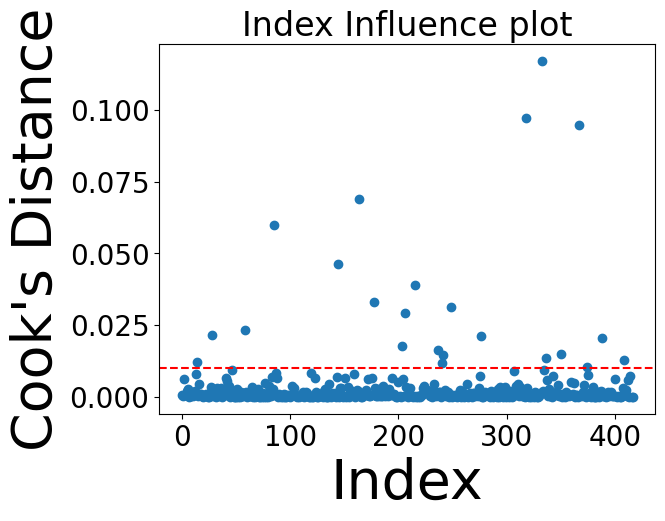

In [557]:



plt.scatter(x= range(0,len(inf_sum.y)), y = inf_sum.cooks_d)
plt.axhline(y = thres_cooks, color = 'r', linestyle = '--')
plt.rcParams['font.size'] = '20'
plt.xlabel("Index")
plt.ylabel("Cook's Distance")
plt.title("Index Influence plot")

In [558]:
thres_cooks

0.009955867919562711

# DFBETAS

In [559]:
# ## Influential cases by DFBETAS
# n=417
# thres_dfbts=2/math.sqrt(n) 
# inf_dfbts = pd.DataFrame(inf_sum[['y','df']][abs(inf_sum.dffits) > thres_dfts])
# inf_dffits    

In [560]:
# plt.scatter(x= range(0,len(inf_sum.y)), y = abs(inf_sum.dfbts))
# plt.axhline(y = thres_dfbts, color = 'r', linestyle = '--')
# plt.rcParams['font.size'] = '20'
# plt.xlabel("Index")
# plt.ylabel("DFBETAS")
# plt.title("Index Influece plot - DFBETAS")

# Removing outliers


In [561]:
X_final = final1_standardized.drop(list(inf_cooks.index), inplace= False)
X_final

const        x1        x7  x8_3        x10  x8_2  x4  x11  x5  x3  ...  \
0      1.0  7.731931  7.578657     0  10.148119     1   1    0   1   0  ...   
1      1.0  8.294050  7.590347     0  10.068790     0   1    0   0   1  ...   
2      1.0  7.664816  7.588830     0  10.629392     1   1    0   1   1  ...   
3      1.0  7.615791  7.580189     0   9.994881     1   1    0   1   1  ...   
4      1.0  8.196988  7.585281     0  10.055479     1   1    0   1   1  ...   
..     ...       ...       ...   ...        ...   ...  ..  ...  ..  ..  ...   
412    1.0  8.265907  7.596392     0  10.253369     0   1    0   0   1  ...   
413    1.0  8.165079  7.590347     0   9.896815     0   1    0   0   1  ...   
414    1.0  7.783224  7.588830     0  10.699800     1   1    0   1   1  ...   
415    1.0  7.454720  7.575585     1   9.305560     0   1    0   0   0  ...   
416    1.0  8.523573  7.595387     0   9.998798     0   1    0   0   1  ...   

        x10*x4  x10*x11     x10*x5     x10*x3      x1*x7     x1*x10  \
0    10.148119      0.0  10.148119   0.000000  58.597650  78.464550   
1    10.068790      0.0   0.000000  10.068790  62.954714  83.511045   
2    10.629392      0.0  10.629392  10.629392  58.166983  81.472334   
3     9.994881      0.0   9.994881   9.994881  57.729139  76.118925   
4    10.055479      0.0  10.055479  10.055479  62.176457  82.424638   
..         ...      ...        ...        ...        ...        ...   
412  10.253369      0.0   0.000000  10.253369  62.791075  84.753402   
413   9.896815      0.0   0.000000   9.896815  61.975784  80.808282   
414  10.699800      0.0  10.699800  10.699800  59.065563  83.278943   
415   9.305560      0.0   0.000000   0.000000  56.473862  69.370341   
416   9.998798      0.0   0.000000   9.998798  64.739836  85.225480   

         x7*x1     x7*x10     x10*x1     x10*x7  
0    58.597650  76.909108  78.464550  76.909108  
1    62.954714  76.425610  83.511045  76.425610  
2    58.166983  80.664650  81.472334  80.664650  
3    57.729139  75.763091  76.118925  75.763091  
4    62.176457  76.273633  82.424638  76.273633  
..         ...        ...        ...        ...  
412  62.791075  77.888617  84.753402  77.888617  
413  61.975784  75.120262  80.808282  75.120262  
414  59.065563  81.198965  83.278943  81.198965  
415  56.473862  70.495055  69.370341  70.495055  
416  64.739836  75.944741  85.225480  75.944741  

[394 rows x 37 columns]

In [562]:
Y_final = pd.DataFrame(Y_std)
Y_final

y_std
0    0.007695
1    0.084061
2   -0.011432
3   -0.015277
4    0.046538
..        ...
412  0.112008
413  0.077458
414 -0.000488
415 -0.050387
416  0.073058

[417 rows x 1 columns]

In [563]:
Y_final.drop(list(inf_cooks.index) , inplace = True)
Y_final

y_std
0    0.007695
1    0.084061
2   -0.011432
3   -0.015277
4    0.046538
..        ...
412  0.112008
413  0.077458
414 -0.000488
415 -0.050387
416  0.073058

[394 rows x 1 columns]

# ~~~~~~~~~~~~~~~Building Final Model~~~~~~~~~~~~~~~~~~~~

In [564]:
model_final = sm.OLS(Y_final['y_std'], X_final[final_features]).fit()
pred_final = model_final.predict(X_final[final_features])
residuals_final = Y_final['y_std'] - model_final.predict(X_final[final_features])
summary_final = model_final.summary()
print(summary_final)

                                 OLS Regression Results                                
Dep. Variable:                  y_std   R-squared (uncentered):                   0.880
Model:                            OLS   Adj. R-squared (uncentered):              0.877
Method:                 Least Squares   F-statistic:                              281.2
Date:                Fri, 19 Apr 2024   Prob (F-statistic):                   7.05e-170
Time:                        21:31:42   Log-Likelihood:                          1059.7
No. Observations:                 394   AIC:                                     -2099.
Df Residuals:                     384   BIC:                                     -2060.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [565]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
# #plt.rcParams['font.size'] = '20'
# sns.distplot(residuals_final, ax = ax1)
# plt.title("Residual density plot")

# sp.stats.probplot(residuals_final,plot=ax2,fit=True)
# plt.show()

# plt.subplots(figsize=(30, 10))
# #plt.rcParams['font.size'] = '20'
# plt.subplot(1, 2, 1)
# plt.scatter(pred_final,residuals_final)
# plt.title("Residual vs Fitted plot")
# # Draw a horizontal line at y=0
# plt.axhline(y=0, color='r', linestyle='--')
# plt.xlabel("Predicted Values")
# plt.ylabel("Residuals")


# plt.subplot(1, 2, 2)
# plt.plot(residuals_final)
# plt.title("Residual plot")
# plt.show()

# Multicollinearity Detection

In [566]:
# Function to calculate VIF
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

lm = sm.OLS(Y_final['y_std'], X_final[final_features]).fit()
calculate_vif(X_final[final_features])

Var         Vif
0      x8_3  1912105.55
6   x7*x8_3  1880330.49
3      x8_2  1331570.36
7   x7*x8_2  1323711.53
2   x1*x8_3     2675.24
5   x1*x8_2     1486.88
9  x10*x8_2      895.83
4     x10^2       24.36
8    x10*x4        9.38
1        x3        5.13

- x8_3 and x8_2 seem to have extremely high VIF values, indicating severe multicollinearity.
The interaction terms involving x7 and x8_3, as well as x7 and x8_2, also have high VIF values, suggesting further multicollinearity issues.

In [567]:
vif_df = pd.DataFrame(calculate_vif(X_final[final_features]))

In [568]:
# Assuming you have your VIF values stored in a DataFrame named vif_df with columns 'Var' and 'Vif'
# Example:
# vif_df = your_dataframe_containing_vif_values

# Set a threshold for high VIF values
threshold = 10

# Filter out variables with VIF values above the threshold
high_vif_variables = vif_df[vif_df['Vif'] > threshold]['Var'].tolist()

# Print the variables with high VIF values
print("Variables with high VIF values:")
print(high_vif_variables)


Variables with high VIF values:
['x8_3', 'x7*x8_3', 'x8_2', 'x7*x8_2', 'x1*x8_3', 'x1*x8_2', 'x10*x8_2', 'x10^2']


In [569]:
# Assuming your DataFrame is named 'data'
# X_final = X_final.drop(columns=high_vif_variables)
# X_final
df=X_final.drop(columns=high_vif_variables)

In [570]:
df

const        x1        x7        x10  x4  x11  x5  x3       x1^2  \
0      1.0  7.731931  7.578657  10.148119   1    0   1   0  59.782753   
1      1.0  8.294050  7.590347  10.068790   1    0   0   1  68.791259   
2      1.0  7.664816  7.588830  10.629392   1    0   1   1  58.749401   
3      1.0  7.615791  7.580189   9.994881   1    0   1   1  58.000274   
4      1.0  8.196988  7.585281  10.055479   1    0   1   1  67.190611   
..     ...       ...       ...        ...  ..  ...  ..  ..        ...   
412    1.0  8.265907  7.596392  10.253369   1    0   0   1  68.325224   
413    1.0  8.165079  7.590347   9.896815   1    0   0   1  66.668519   
414    1.0  7.783224  7.588830  10.699800   1    0   1   1  60.578576   
415    1.0  7.454720  7.575585   9.305560   1    0   0   0  55.572850   
416    1.0  8.523573  7.595387   9.998798   1    0   0   1  72.651293   

          x7^2  ...     x10*x4  x10*x11     x10*x5     x10*x3      x1*x7  \
0    57.436040  ...  10.148119      0.0  10.148119   0.000000  58.597650   
1    57.613367  ...  10.068790      0.0   0.000000  10.068790  62.954714   
2    57.590339  ...  10.629392      0.0  10.629392  10.629392  58.166983   
3    57.459272  ...   9.994881      0.0   9.994881   9.994881  57.729139   
4    57.536489  ...  10.055479      0.0  10.055479  10.055479  62.176457   
..         ...  ...        ...      ...        ...        ...        ...   
412  57.705176  ...  10.253369      0.0   0.000000  10.253369  62.791075   
413  57.613367  ...   9.896815      0.0   0.000000   9.896815  61.975784   
414  57.590339  ...  10.699800      0.0  10.699800  10.699800  59.065563   
415  57.389483  ...   9.305560      0.0   0.000000   0.000000  56.473862   
416  57.689908  ...   9.998798      0.0   0.000000   9.998798  64.739836   

        x1*x10      x7*x1     x7*x10     x10*x1     x10*x7  
0    78.464550  58.597650  76.909108  78.464550  76.909108  
1    83.511045  62.954714  76.425610  83.511045  76.425610  
2    81.472334  58.166983  80.664650  81.472334  80.664650  
3    76.118925  57.729139  75.763091  76.118925  75.763091  
4    82.424638  62.176457  76.273633  82.424638  76.273633  
..         ...        ...        ...        ...        ...  
412  84.753402  62.791075  77.888617  84.753402  77.888617  
413  80.808282  61.975784  75.120262  80.808282  75.120262  
414  83.278943  59.065563  81.198965  83.278943  81.198965  
415  69.370341  56.473862  70.495055  69.370341  70.495055  
416  85.225480  64.739836  75.944741  85.225480  75.944741  

[394 rows x 29 columns]

# Ridge Regression

In [571]:
from numpy import arange
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

In [572]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
model_ridge = RidgeCV(alphas=arange(0.01, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')

#fit model
model_ridge.fit(X_final, Y_final['y_std'])

#display lambda that produced the lowest test MSE
print(model_ridge.alpha_)

0.03


In [573]:
X_final.columns

Index(['const', 'x1', 'x7', 'x8_3', 'x10', 'x8_2', 'x4', 'x11', 'x5', 'x3',
       'x1^2', 'x7^2', 'x10^2', 'x1*x8_3', 'x1*x8_2', 'x1*x4', 'x1*x11',
       'x1*x5', 'x1*x3', 'x7*x8_3', 'x7*x8_2', 'x7*x4', 'x7*x11', 'x7*x5',
       'x7*x3', 'x10*x8_3', 'x10*x8_2', 'x10*x4', 'x10*x11', 'x10*x5',
       'x10*x3', 'x1*x7', 'x1*x10', 'x7*x1', 'x7*x10', 'x10*x1', 'x10*x7'],
      dtype='object')

In [574]:
mod_coeff = []
lst=np.arange(0,1,0.05)
for i in range(len(lst)):
    model = Ridge(alpha=lst[i])
# fit model
    model.fit(X_final[final_features],Y_final['y_std'])
# define new data
    model_coeff=model.coef_
    mod_coeff.append(model_coeff)

In [575]:
mod_coeff

[array([-1.00936627e+01,  1.34845574e-02,  1.15656625e-01, -7.03070472e+00,
         7.15165407e-04,  1.00359917e-01,  1.20515836e+00,  8.05870025e-01,
         8.10763758e-04,  7.87519721e-03]),
 array([-0.02614233,  0.0156902 ,  0.09981843, -0.03719794,  0.00059921,
         0.09963696, -0.10732174, -0.11370215,  0.0014689 ,  0.00677306]),
 array([-0.01965777,  0.01599147,  0.09550425, -0.02589709,  0.00063236,
         0.09841103, -0.10388027, -0.11271044,  0.00148359,  0.00586104]),
 array([-0.01716937,  0.01627578,  0.09152469, -0.02192765,  0.00066334,
         0.0972291 , -0.10024388, -0.1108767 ,  0.0014967 ,  0.00500793]),
 array([-0.01570767,  0.01654607,  0.08783955, -0.01980563,  0.00069235,
         0.09608825, -0.09676432, -0.10891092,  0.00150866,  0.0042064 ]),
 array([-0.01467527,  0.01680374,  0.08441722, -0.01843055,  0.00071957,
         0.09498578, -0.09348905, -0.10694871,  0.00151963,  0.00345147]),
 array([-0.01387088,  0.01704988,  0.08123083, -0.01743458,  0.0

In [576]:
Ridge_estimated_params = pd.DataFrame(mod_coeff,columns=final_features)
Ridge_estimated_params.insert(0,'C', lst )
Ridge_estimated_params

C       x8_3        x3   x1*x8_3      x8_2     x10^2   x1*x8_2  \
0   0.00 -10.093663  0.013485  0.115657 -7.030705  0.000715  0.100360   
1   0.05  -0.026142  0.015690  0.099818 -0.037198  0.000599  0.099637   
2   0.10  -0.019658  0.015991  0.095504 -0.025897  0.000632  0.098411   
3   0.15  -0.017169  0.016276  0.091525 -0.021928  0.000663  0.097229   
4   0.20  -0.015708  0.016546  0.087840 -0.019806  0.000692  0.096088   
5   0.25  -0.014675  0.016804  0.084417 -0.018431  0.000720  0.094986   
6   0.30  -0.013871  0.017050  0.081231 -0.017435  0.000745  0.093919   
7   0.35  -0.013207  0.017285  0.078257 -0.016660  0.000769  0.092886   
8   0.40  -0.012638  0.017511  0.075476 -0.016026  0.000792  0.091885   
9   0.45  -0.012138  0.017727  0.072869 -0.015489  0.000814  0.090914   
10  0.50  -0.011692  0.017935  0.070421 -0.015023  0.000834  0.089972   
11  0.55  -0.011288  0.018135  0.068118 -0.014609  0.000853  0.089056   
12  0.60  -0.010920  0.018327  0.065948 -0.014237  0.000872  0.088165   
13  0.65  -0.010580  0.018512  0.063900 -0.013897  0.000889  0.087299   
14  0.70  -0.010266  0.018691  0.061964 -0.013585  0.000906  0.086455   
15  0.75  -0.009974  0.018863  0.060131 -0.013295  0.000921  0.085633   
16  0.80  -0.009701  0.019030  0.058393 -0.013025  0.000936  0.084833   
17  0.85  -0.009445  0.019190  0.056744 -0.012771  0.000951  0.084052   
18  0.90  -0.009204  0.019346  0.055176 -0.012532  0.000964  0.083290   
19  0.95  -0.008977  0.019496  0.053684 -0.012306  0.000978  0.082546   

     x7*x8_3   x7*x8_2    x10*x4  x10*x8_2  
0   1.205158  0.805870  0.000811  0.007875  
1  -0.107322 -0.113702  0.001469  0.006773  
2  -0.103880 -0.112710  0.001484  0.005861  
3  -0.100244 -0.110877  0.001497  0.005008  
4  -0.096764 -0.108911  0.001509  0.004206  
5  -0.093489 -0.106949  0.001520  0.003451  
6  -0.090418 -0.105030  0.001530  0.002739  
7  -0.087540 -0.103170  0.001539  0.002065  
8  -0.084840 -0.101372  0.001548  0.001428  
9  -0.082304 -0.099636  0.001556  0.000823  
10 -0.079920 -0.097960  0.001563  0.000249  
11 -0.077674 -0.096343  0.001570 -0.000297  
12 -0.075555 -0.094782  0.001577 -0.000817  
13 -0.073554 -0.093275  0.001583 -0.001312  
14 -0.071660 -0.091818  0.001588 -0.001784  
15 -0.069867 -0.090409  0.001594 -0.002235  
16 -0.068165 -0.089046  0.001599 -0.002666  
17 -0.066550 -0.087727  0.001603 -0.003078  
18 -0.065013 -0.086449  0.001608 -0.003472  
19 -0.063551 -0.085210  0.001612 -0.003850

In [577]:
# Function to calculate VIF
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

# Your code snippet with slight modifications
coeff_vif = []
for c in lst:
    model_ridge = Ridge(alpha=c)
    model_ridge.fit(X_final[final_features], Y_final['y_std'])
    
    # Calculate VIF for the current feature set
    vif_values = calculate_vif(X_final[final_features])
    
    # Append VIF values along with the R^2 score from Ridge regression
    temp = list(vif_values["VIF"])
    temp.append(model_ridge.score(X_final[final_features], Y_final['y_std']))
    
    coeff_vif.append(temp)


In [578]:
col_names = final_features.copy()
col_names.append("R2")
coeff_vif_ridge = pd.DataFrame(coeff_vif,columns=col_names)
coeff_vif_ridge.insert(0,'C', lst )
coeff_vif_ridge

C          x8_3        x3      x1*x8_3          x8_2      x10^2  \
0   0.00  1.912106e+06  5.128621  2675.239637  1.331570e+06  24.363154   
1   0.05  1.912106e+06  5.128621  2675.239637  1.331570e+06  24.363154   
2   0.10  1.912106e+06  5.128621  2675.239637  1.331570e+06  24.363154   
3   0.15  1.912106e+06  5.128621  2675.239637  1.331570e+06  24.363154   
4   0.20  1.912106e+06  5.128621  2675.239637  1.331570e+06  24.363154   
5   0.25  1.912106e+06  5.128621  2675.239637  1.331570e+06  24.363154   
6   0.30  1.912106e+06  5.128621  2675.239637  1.331570e+06  24.363154   
7   0.35  1.912106e+06  5.128621  2675.239637  1.331570e+06  24.363154   
8   0.40  1.912106e+06  5.128621  2675.239637  1.331570e+06  24.363154   
9   0.45  1.912106e+06  5.128621  2675.239637  1.331570e+06  24.363154   
10  0.50  1.912106e+06  5.128621  2675.239637  1.331570e+06  24.363154   
11  0.55  1.912106e+06  5.128621  2675.239637  1.331570e+06  24.363154   
12  0.60  1.912106e+06  5.128621  2675.239637  1.331570e+06  24.363154   
13  0.65  1.912106e+06  5.128621  2675.239637  1.331570e+06  24.363154   
14  0.70  1.912106e+06  5.128621  2675.239637  1.331570e+06  24.363154   
15  0.75  1.912106e+06  5.128621  2675.239637  1.331570e+06  24.363154   
16  0.80  1.912106e+06  5.128621  2675.239637  1.331570e+06  24.363154   
17  0.85  1.912106e+06  5.128621  2675.239637  1.331570e+06  24.363154   
18  0.90  1.912106e+06  5.128621  2675.239637  1.331570e+06  24.363154   
19  0.95  1.912106e+06  5.128621  2675.239637  1.331570e+06  24.363154   

        x1*x8_2       x7*x8_3       x7*x8_2    x10*x4    x10*x8_2        R2  
0   1486.884103  1.880330e+06  1.323712e+06  9.375938  895.828693  0.880018  
1   1486.884103  1.880330e+06  1.323712e+06  9.375938  895.828693  0.864215  
2   1486.884103  1.880330e+06  1.323712e+06  9.375938  895.828693  0.863962  
3   1486.884103  1.880330e+06  1.323712e+06  9.375938  895.828693  0.863623  
4   1486.884103  1.880330e+06  1.323712e+06  9.375938  895.828693  0.863202  
5   1486.884103  1.880330e+06  1.323712e+06  9.375938  895.828693  0.862712  
6   1486.884103  1.880330e+06  1.323712e+06  9.375938  895.828693  0.862167  
7   1486.884103  1.880330e+06  1.323712e+06  9.375938  895.828693  0.861577  
8   1486.884103  1.880330e+06  1.323712e+06  9.375938  895.828693  0.860952  
9   1486.884103  1.880330e+06  1.323712e+06  9.375938  895.828693  0.860299  
10  1486.884103  1.880330e+06  1.323712e+06  9.375938  895.828693  0.859625  
11  1486.884103  1.880330e+06  1.323712e+06  9.375938  895.828693  0.858933  
12  1486.884103  1.880330e+06  1.323712e+06  9.375938  895.828693  0.858230  
13  1486.884103  1.880330e+06  1.323712e+06  9.375938  895.828693  0.857517  
14  1486.884103  1.880330e+06  1.323712e+06  9.375938  895.828693  0.856798  
15  1486.884103  1.880330e+06  1.323712e+06  9.375938  895.828693  0.856076  
16  1486.884103  1.880330e+06  1.323712e+06  9.375938  895.828693  0.855353  
17  1486.884103  1.880330e+06  1.323712e+06  9.375938  895.828693  0.854630  
18  1486.884103  1.880330e+06  1.323712e+06  9.375938  895.828693  0.853908  
19  1486.884103  1.880330e+06  1.323712e+06  9.375938  895.828693  0.853189

In [579]:
def vif_ridge(corr_x, pen_factors, is_corr=True):
    """variance inflation factor for Ridge regression

    assumes penalization is on standardized variables
    data should not include a constant

    Parameters
    ----------
    corr_x : array_like
        correlation matrix if is_corr=True or original data if is_corr is False.
    pen_factors : iterable
        iterable of Ridge penalization factors
    is_corr : bool
        Boolean to indicate how corr_x is interpreted, see corr_x

    Returns
    -------
    vif : ndarray
        variance inflation factors for parameters in columns and ridge
        penalization factors in rows

    could be optimized for repeated calculations
    """
    corr_x = np.asarray(corr_x)
    if not is_corr:
        corr = np.corrcoef(corr_x, rowvar=0, bias=True)
    else:
        corr = corr_x
    
    eye = np.eye(corr.shape[1])
    res = []
    for k in pen_factors:
        minv = np.linalg.inv(corr + (k * eye))
        vif = np.matmul(minv,corr)
        vif = np.matmul(vif,minv)
        res.append(np.diag(vif))
    return np.asarray(res)

In [580]:
vif_ridge_coeff = vif_ridge(X_final[final_features].corr(),lst, is_corr=True)

In [581]:
col_names = final_features.copy()
col_names

['x8_3',
 'x3',
 'x1*x8_3',
 'x8_2',
 'x10^2',
 'x1*x8_2',
 'x7*x8_3',
 'x7*x8_2',
 'x10*x4',
 'x10*x8_2']

In [582]:
vif_values_ridge = pd.DataFrame(vif_ridge_coeff,columns=col_names)
vif_values_ridge.insert(0,'C', lst )
vif_values_ridge['R^2'] = list(coeff_vif_ridge['R2'])
vif_values_ridge

C          x8_3        x3      x1*x8_3           x8_2     x10^2  \
0   0.00  1.355214e+06  2.455919  2009.913792  585181.022350  2.342374   
1   0.05  3.926753e-01  1.554113     0.471581       0.210897  0.927675   
2   0.10  3.096792e-01  1.276784     0.334391       0.141430  0.840921   
3   0.15  2.582645e-01  1.072035     0.271896       0.119618  0.766347   
4   0.20  2.206328e-01  0.915871     0.229858       0.106577  0.701545   
5   0.25  1.917101e-01  0.793616     0.198595       0.097002  0.644809   
6   0.30  1.688316e-01  0.695824     0.174262       0.089354  0.594815   
7   0.35  1.503428e-01  0.616176     0.154779       0.082976  0.550512   
8   0.40  1.351407e-01  0.550305     0.138854       0.077519  0.511051   
9   0.45  1.224581e-01  0.495105     0.125623       0.072768  0.475740   
10  0.50  1.117443e-01  0.448313     0.114479       0.068580  0.444008   
11  0.55  1.025947e-01  0.408250     0.104985       0.064850  0.415380   
12  0.60  9.470545e-02  0.373642     0.096813       0.061504  0.389461   
13  0.65  8.784482e-02  0.343510     0.089718       0.058481  0.365915   
14  0.70  8.183294e-02  0.317089     0.083509       0.055735  0.344459   
15  0.75  7.652848e-02  0.293775     0.078037       0.053228  0.324849   
16  0.80  7.181895e-02  0.273083     0.073184       0.050930  0.306880   
17  0.85  6.761388e-02  0.254621     0.068855       0.048815  0.290371   
18  0.90  6.383972e-02  0.238071     0.064972       0.046861  0.275167   
19  0.95  6.043620e-02  0.223170     0.061473       0.045052  0.261133   

       x1*x8_2       x7*x8_3        x7*x8_2    x10*x4    x10*x8_2       R^2  
0   652.094119  1.339640e+06  579567.359130  1.532132  755.019177  0.880018  
1     0.506516  3.937865e-01       0.212421  1.135220    0.490453  0.864215  
2     0.223691  3.100179e-01       0.141891  1.000434    0.217676  0.863962  
3     0.159583  2.584492e-01       0.119860  0.889156    0.156273  0.863623  
4     0.130788  2.207580e-01       0.106731  0.796076    0.128787  0.863202  
5     0.113456  1.918044e-01       0.097110  0.717338    0.112227  0.862712  
6     0.101336  1.689070e-01       0.089434  0.650076    0.100605  0.862167  
7     0.092110  1.504052e-01       0.083037  0.592116    0.091715  0.861577  
8     0.084712  1.351938e-01       0.077567  0.541788    0.084550  0.860952  
9     0.078571  1.225040e-01       0.072806  0.497781    0.078574  0.860299  
10    0.073350  1.117845e-01       0.068611  0.459063    0.073470  0.859625  
11    0.068832  1.026302e-01       0.064876  0.424804    0.069035  0.858933  
12    0.064869  9.473724e-02       0.061525  0.394333    0.065130  0.858230  
13    0.061354  8.787341e-02       0.058498  0.367104    0.061656  0.857517  
14    0.058210  8.185882e-02       0.055749  0.342665    0.058540  0.856798  
15    0.055377  7.655201e-02       0.053240  0.320642    0.055725  0.856076  
16    0.052808  7.184046e-02       0.050940  0.300723    0.053167  0.855353  
17    0.050467  6.763361e-02       0.048823  0.282644    0.050831  0.854630  
18    0.048322  6.385790e-02       0.046868  0.266182    0.048687  0.853908  
19    0.046349  6.045299e-02       0.045057  0.251148    0.046713  0.853189

In [592]:
col_names

['x8_3',
 'x3',
 'x1*x8_3',
 'x8_2',
 'x10^2',
 'x1*x8_2',
 'x7*x8_3',
 'x7*x8_2',
 'x10*x4',
 'x10*x8_2']

In [593]:
final_features

['x8_3',
 'x3',
 'x1*x8_3',
 'x8_2',
 'x10^2',
 'x1*x8_2',
 'x7*x8_3',
 'x7*x8_2',
 'x10*x4',
 'x10*x8_2']

In [583]:
model_ridge2= Ridge(alpha = 0.01)
model_ridge2.fit(X_final[final_features], Y_final['y_std'])
pred_ridge2 = model_ridge2.predict(X_final[final_features])
residuals_ridge2 = Y_final['y_std'] - pred_ridge2
model_ridge2.score(X_final[final_features],Y_final['y_std'])

0.8645729366793582

In [584]:
X_final

const        x1        x7  x8_3        x10  x8_2  x4  x11  x5  x3  ...  \
0      1.0  7.731931  7.578657     0  10.148119     1   1    0   1   0  ...   
1      1.0  8.294050  7.590347     0  10.068790     0   1    0   0   1  ...   
2      1.0  7.664816  7.588830     0  10.629392     1   1    0   1   1  ...   
3      1.0  7.615791  7.580189     0   9.994881     1   1    0   1   1  ...   
4      1.0  8.196988  7.585281     0  10.055479     1   1    0   1   1  ...   
..     ...       ...       ...   ...        ...   ...  ..  ...  ..  ..  ...   
412    1.0  8.265907  7.596392     0  10.253369     0   1    0   0   1  ...   
413    1.0  8.165079  7.590347     0   9.896815     0   1    0   0   1  ...   
414    1.0  7.783224  7.588830     0  10.699800     1   1    0   1   1  ...   
415    1.0  7.454720  7.575585     1   9.305560     0   1    0   0   0  ...   
416    1.0  8.523573  7.595387     0   9.998798     0   1    0   0   1  ...   

        x10*x4  x10*x11     x10*x5     x10*x3      x1*x7     x1*x10  \
0    10.148119      0.0  10.148119   0.000000  58.597650  78.464550   
1    10.068790      0.0   0.000000  10.068790  62.954714  83.511045   
2    10.629392      0.0  10.629392  10.629392  58.166983  81.472334   
3     9.994881      0.0   9.994881   9.994881  57.729139  76.118925   
4    10.055479      0.0  10.055479  10.055479  62.176457  82.424638   
..         ...      ...        ...        ...        ...        ...   
412  10.253369      0.0   0.000000  10.253369  62.791075  84.753402   
413   9.896815      0.0   0.000000   9.896815  61.975784  80.808282   
414  10.699800      0.0  10.699800  10.699800  59.065563  83.278943   
415   9.305560      0.0   0.000000   0.000000  56.473862  69.370341   
416   9.998798      0.0   0.000000   9.998798  64.739836  85.225480   

         x7*x1     x7*x10     x10*x1     x10*x7  
0    58.597650  76.909108  78.464550  76.909108  
1    62.954714  76.425610  83.511045  76.425610  
2    58.166983  80.664650  81.472334  80.664650  
3    57.729139  75.763091  76.118925  75.763091  
4    62.176457  76.273633  82.424638  76.273633  
..         ...        ...        ...        ...  
412  62.791075  77.888617  84.753402  77.888617  
413  61.975784  75.120262  80.808282  75.120262  
414  59.065563  81.198965  83.278943  81.198965  
415  56.473862  70.495055  69.370341  70.495055  
416  64.739836  75.944741  85.225480  75.944741  

[394 rows x 37 columns]

In [585]:
from sklearn import linear_model

n_alphas = 200
alphas = np.arange(0.001,1,0.001)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_final, Y_final['y_std'])
    coefs.append(ridge.coef_)

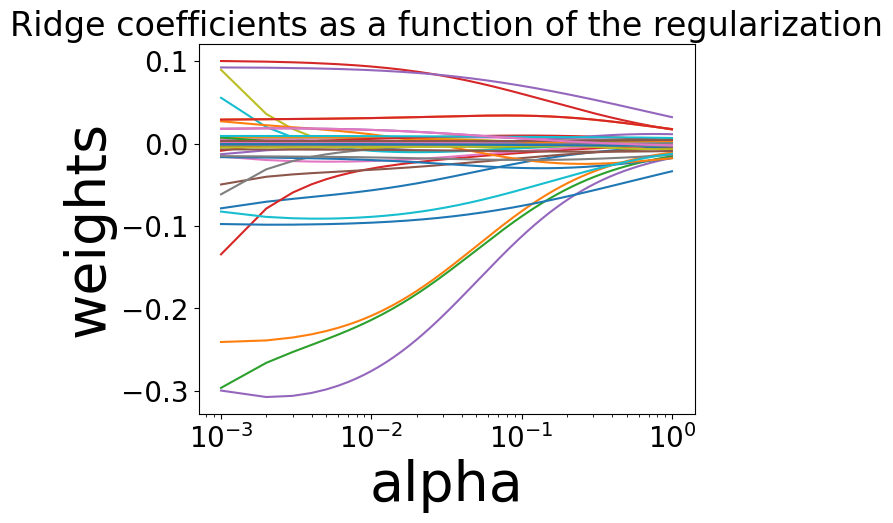

In [586]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

In [589]:
from sklearn.linear_model import Ridge
def ridge_regression(X, Y, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha)
    ridgereg.fit(X,Y)
    y_pred = ridgereg.predict(X)
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

In [617]:
# predictors=final_features
# alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]
# models_to_plot = {1e-15: 231, 1e-10: 232, 1e-4: 233, 1e-3: 234, 1e-2: 235, 5: 236}
# for i in range(10):
#     coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)


In [601]:
data = pd.concat([X_final,Y_final], axis=1)

# Model Vallidation 

In [609]:
from sklearn.model_selection import cross_val_score

# Define the Ridge regression model
ridge_model = Ridge()

# Perform cross-validation
cv_scores = cross_val_score(ridge_model, X_final, Y_final, cv=5, scoring='neg_mean_squared_error')

# Convert negative mean squared errors to positive
cv_scores_positive = -cv_scores

# Calculate mean and standard deviation of cross-validation scores
mean_cv_score = cv_scores_positive.mean()
std_cv_score = cv_scores_positive.std()

print("Mean Cross-Validation Score:", mean_cv_score)
print("Standard Deviation of Cross-Validation Scores:", std_cv_score)

Mean Cross-Validation Score: 0.00031582155195659077
Standard Deviation of Cross-Validation Scores: 4.562689836893358e-05


# MODEL VALIDATION

In [ ]:
one degree model validation

In [646]:
import statsmodels.api as sm

# Assuming X1 is the DataFrame containing predictor variables and p is the target variable
p = pd.DataFrame(y1)
# Fit the OLS model
X_with_const = sm.add_constant(Xv)  # Add a constant term to the predictors
model_final = sm.OLS(p, X_with_const).fit()

# Print the summary output containing ANOVA table and coefficient estimates
print(model_final.summary())


                            OLS Regression Results                            
Dep. Variable:                  y_box   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     220.3
Date:                Fri, 19 Apr 2024   Prob (F-statistic):          2.08e-150
Time:                        22:55:36   Log-Likelihood:                 3228.6
No. Observations:                 417   AIC:                            -6437.
Df Residuals:                     407   BIC:                            -6397.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6521      0.006    268.682      0.0

In [645]:
Xv =  X1[['x1', 'x7', 'x8_3', 'x10', 'x8_2', 'x4', 'x11', 'x5', 'x3']]

In [ ]:
INTERACTION VALIDATION

In [647]:
import statsmodels.api as sm

# Assuming X1 is the DataFrame containing predictor variables and p is the target variable
p = Y_final
Xiv=X_final
# Fit the OLS model
X_with_const = sm.add_constant(Xiv)  # Add a constant term to the predictors
model_final = sm.OLS(p, X_with_const).fit()

# Print the summary output containing ANOVA table and coefficient estimates
print(model_final.summary())


                            OLS Regression Results                            
Dep. Variable:                  y_std   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     84.28
Date:                Fri, 19 Apr 2024   Prob (F-statistic):          2.40e-148
Time:                        22:58:01   Log-Likelihood:                 1069.2
No. Observations:                 394   AIC:                            -2070.
Df Residuals:                     360   BIC:                            -1935.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        375.2483    795.336      0.472      0.6

# ~~~~~~~~~~~~~~~~~~MODEL2~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [127]:
model2_features = train_data[['x1', 'x3', 'x4', 'x7', 'x9', 'x10', 'x8_2', 'x8_3']]
model2_features

x1  x3  x4        x7  x9        x10  x8_2  x8_3
220  7.731931   0   1  7.578657   1  10.148119     1     0
69   8.294050   1   1  7.590347   0  10.068790     0     0
374  7.664816   1   1  7.588830   1  10.629392     1     0
305  7.615791   1   1  7.580189   1   9.994881     1     0
173  8.196988   1   1  7.585281   0  10.055479     1     0
..        ...  ..  ..       ...  ..        ...   ...   ...
71   8.265907   1   1  7.596392   0  10.253369     0     0
106  8.165079   1   1  7.590347   0   9.896815     0     0
270  7.783224   1   1  7.588830   0  10.699800     1     0
435  7.454720   0   1  7.575585   1   9.305560     0     1
102  8.523573   1   1  7.595387   0   9.998798     0     0

[417 rows x 8 columns]

In [128]:
# Fit simple linear regression model
X_sw2 =  model2_features
Y_sw2 =  y1
X_sw2 = sm.add_constant(X_sw2)
model_sw2 = sm.OLS(Y_sw2, X_sw2).fit()
pred_sw2 = model_sw2.predict(X_sw2)
residuals_sw2 = Y_sw2 - pred_sw2
summary = model_sw2.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  y_box   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     258.1
Date:                Sat, 20 Apr 2024   Prob (F-statistic):          1.95e-154
Time:                        00:40:38   Log-Likelihood:                 3235.2
No. Observations:                 417   AIC:                            -6452.
Df Residuals:                     408   BIC:                            -6416.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6511      0.006    276.296      0.0

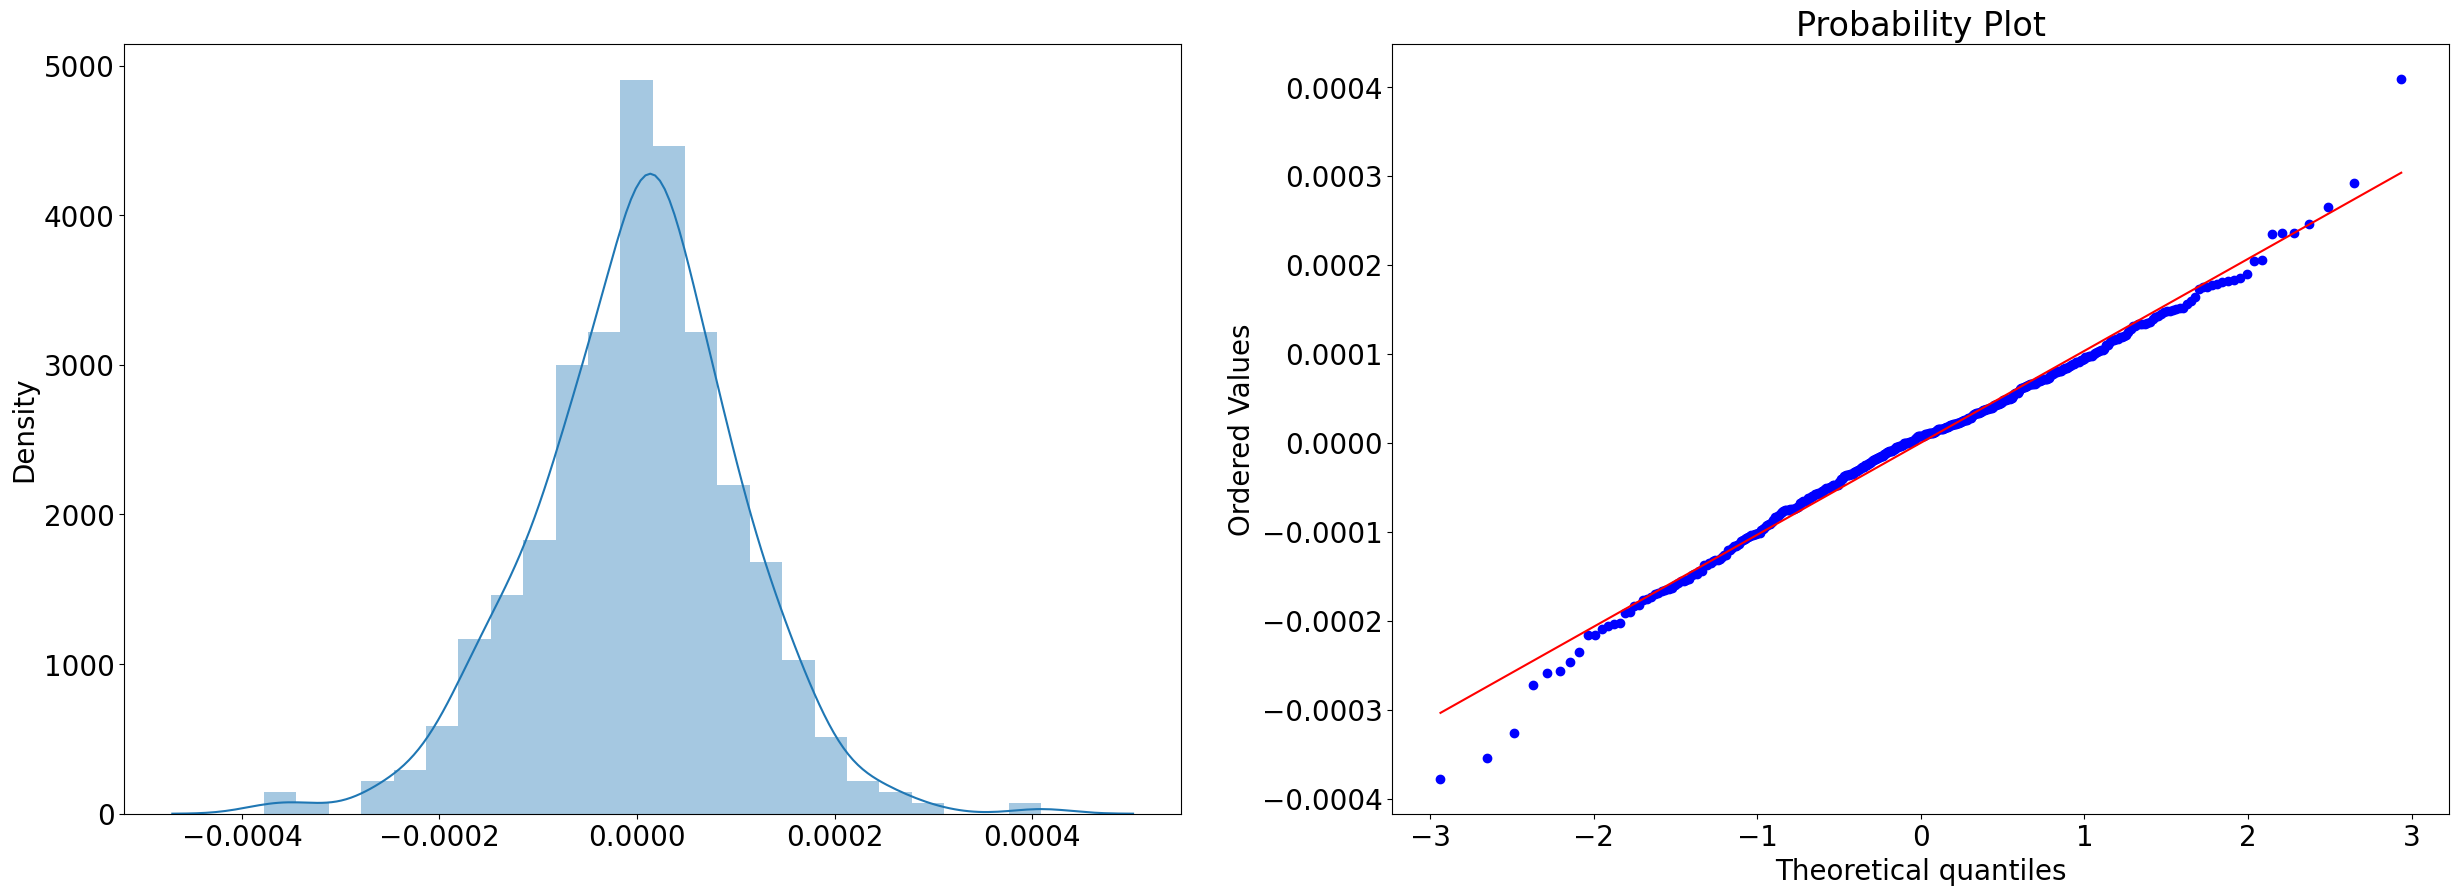

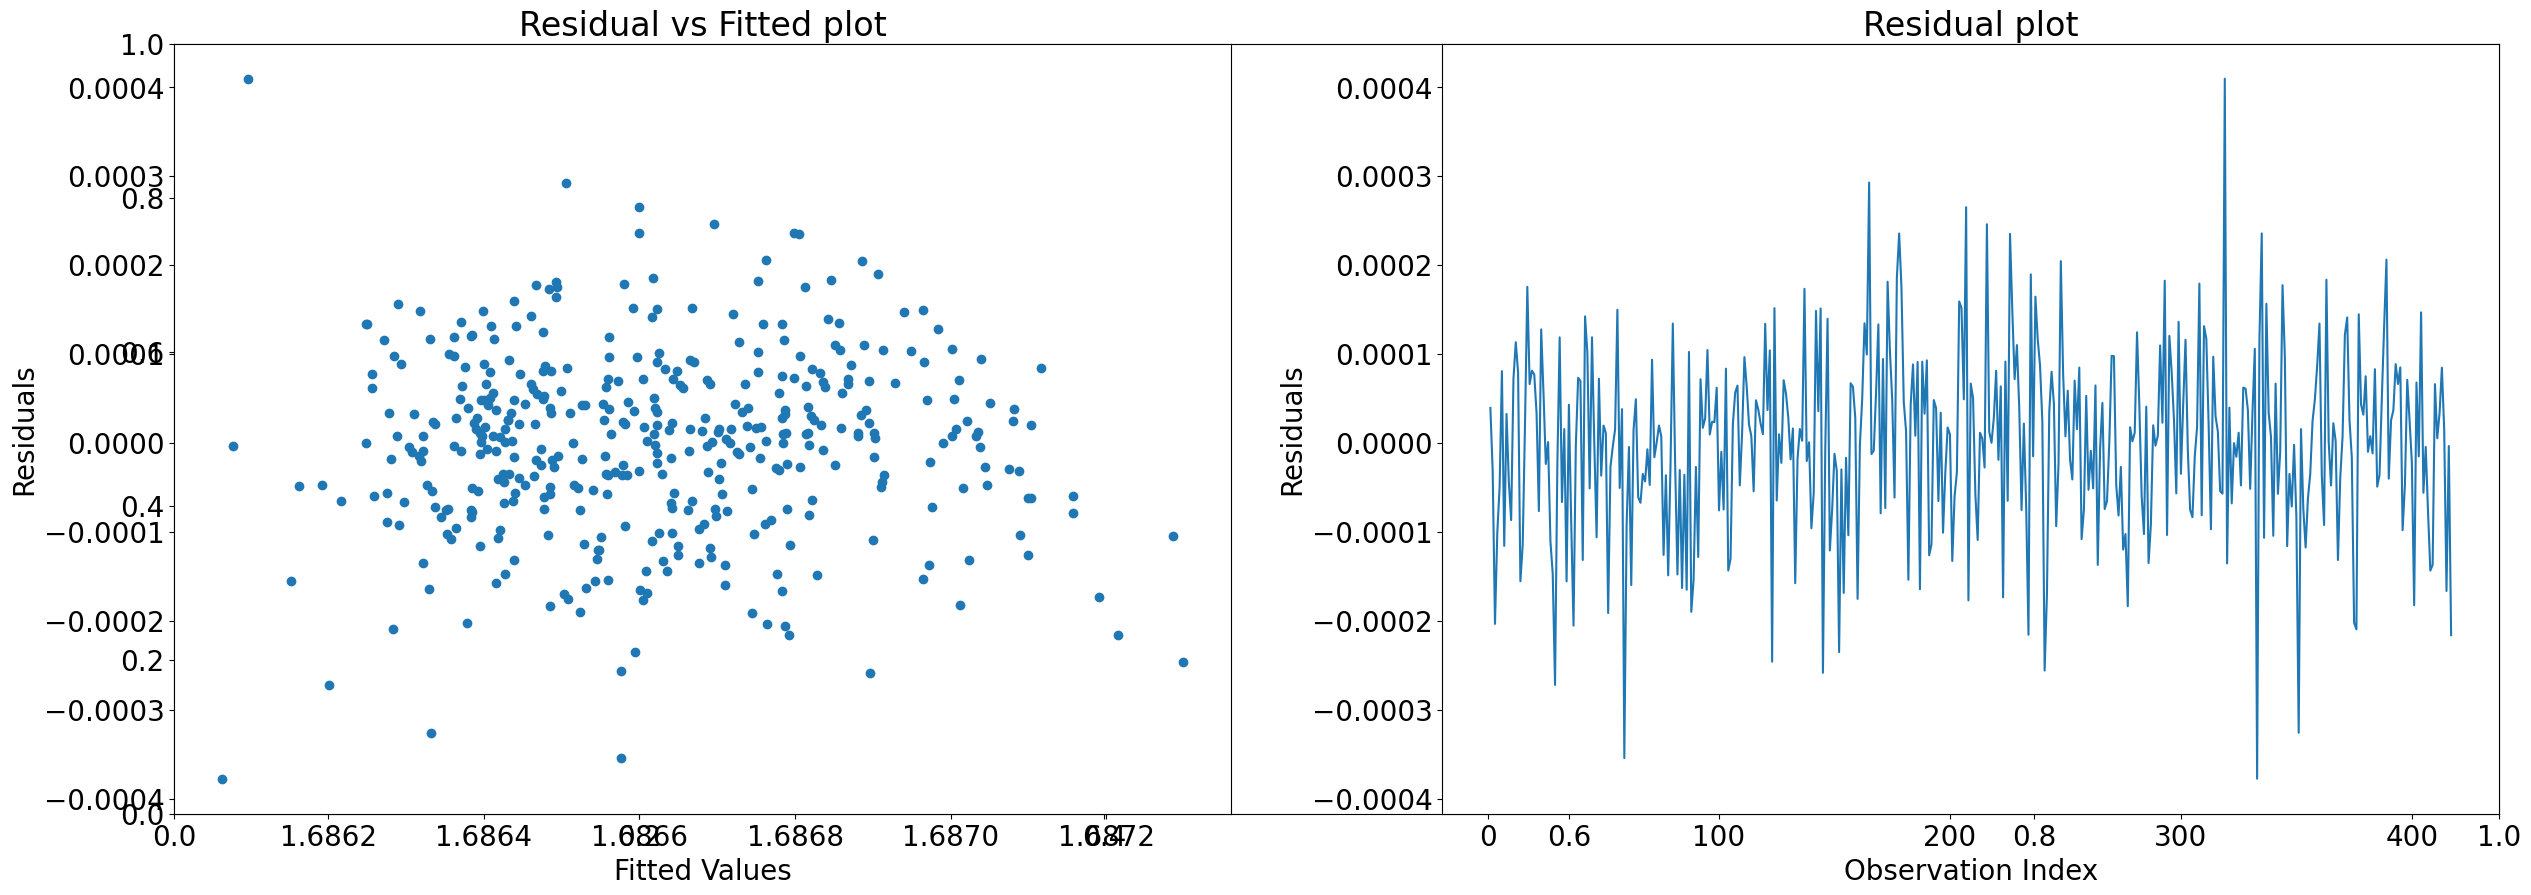

In [129]:
residuals_sw2.index = range(1,418)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
plt.rcParams['font.size'] = '20'
sns.distplot(residuals_sw2, ax=ax1)
plt.title("Residual density plot")

sp.stats.probplot(residuals_sw2, plot=ax2, fit=True)
plt.show()

plt.subplots(figsize=(30, 10))
plt.rcParams['font.size'] = '20'
plt.subplot(1, 2, 1)
plt.scatter(pred_sw2, residuals_sw2)  # Assuming pred_sw is defined somewhere
plt.title("Residual vs Fitted plot")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

plt.subplot(1, 2, 2)
plt.plot(residuals_sw2)
plt.title("Residual plot")
plt.xlabel("Observation Index")
plt.ylabel("Residuals")
plt.show()

# Added variable plot

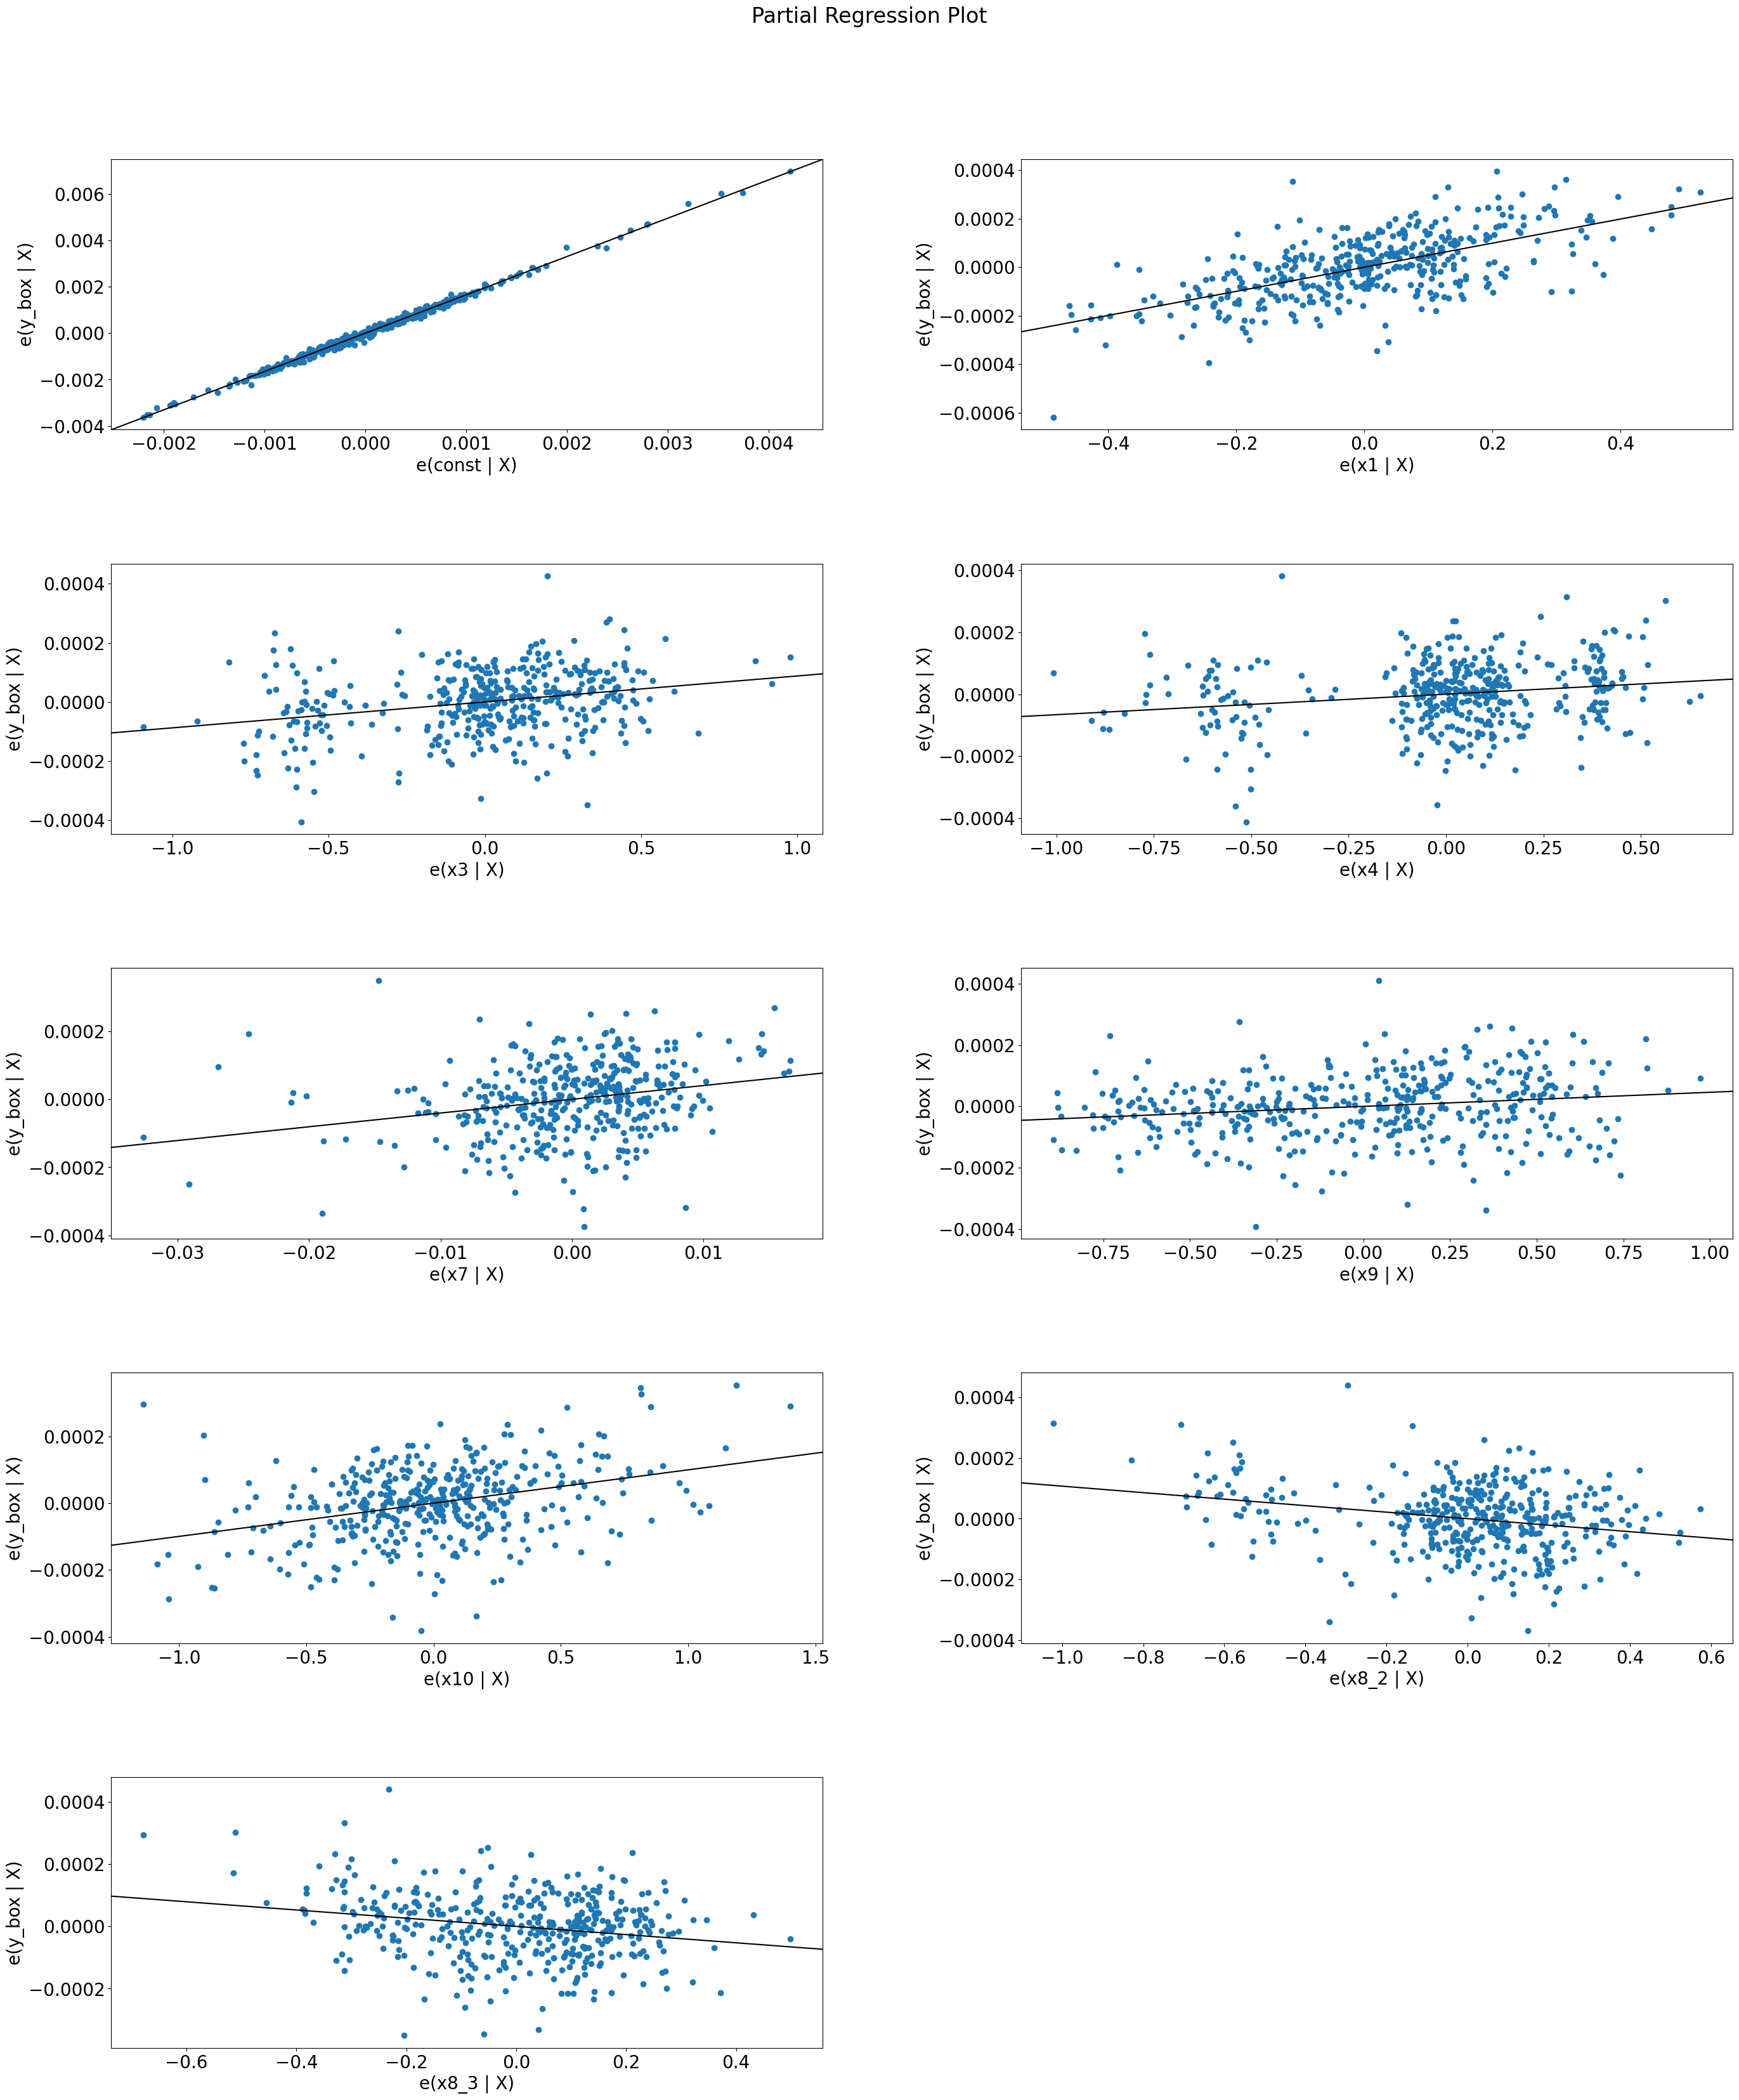

In [130]:
fig = plt.figure(figsize=(30, 35))
sm.graphics.plot_partregress_grid(model_sw2, fig=fig)
fig.tight_layout(pad=5)
plt.show()

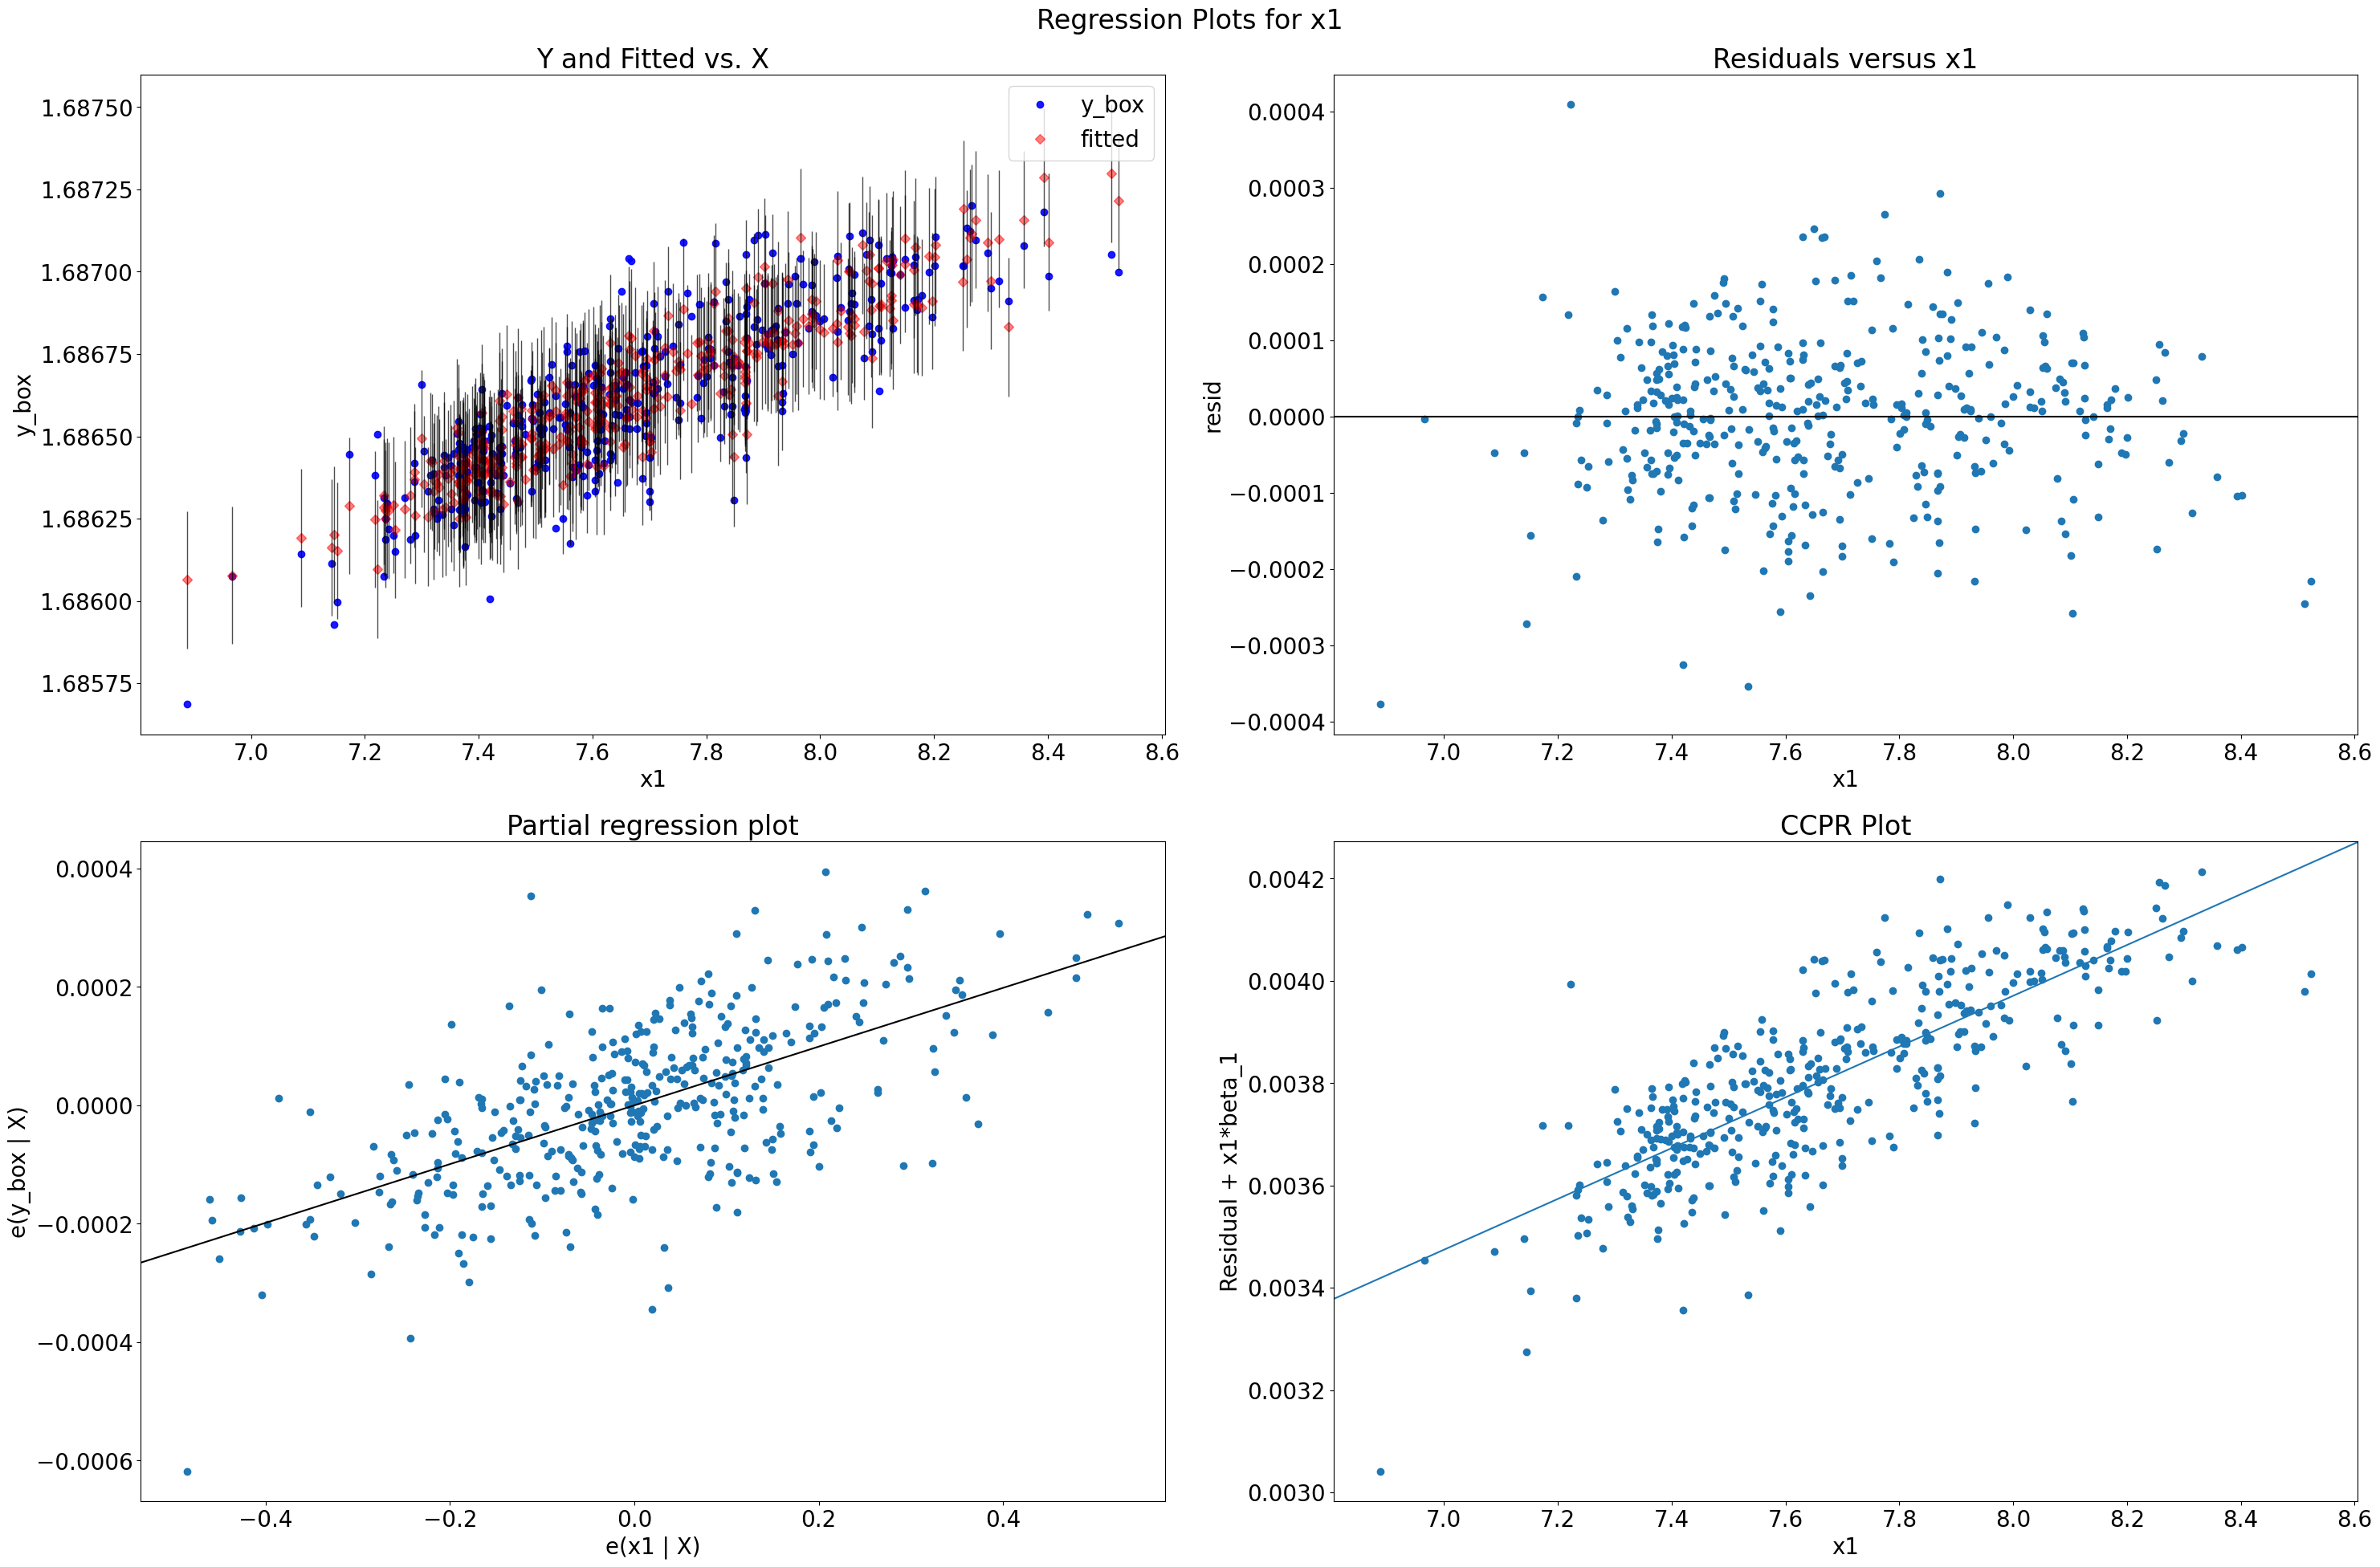

In [131]:
fig = plt.figure(figsize = (30,20))
plt.rcParams['font.size'] = '20'
sm.graphics.plot_regress_exog(model_sw2, "x1", fig = fig)
fig.tight_layout(pad=1.0)

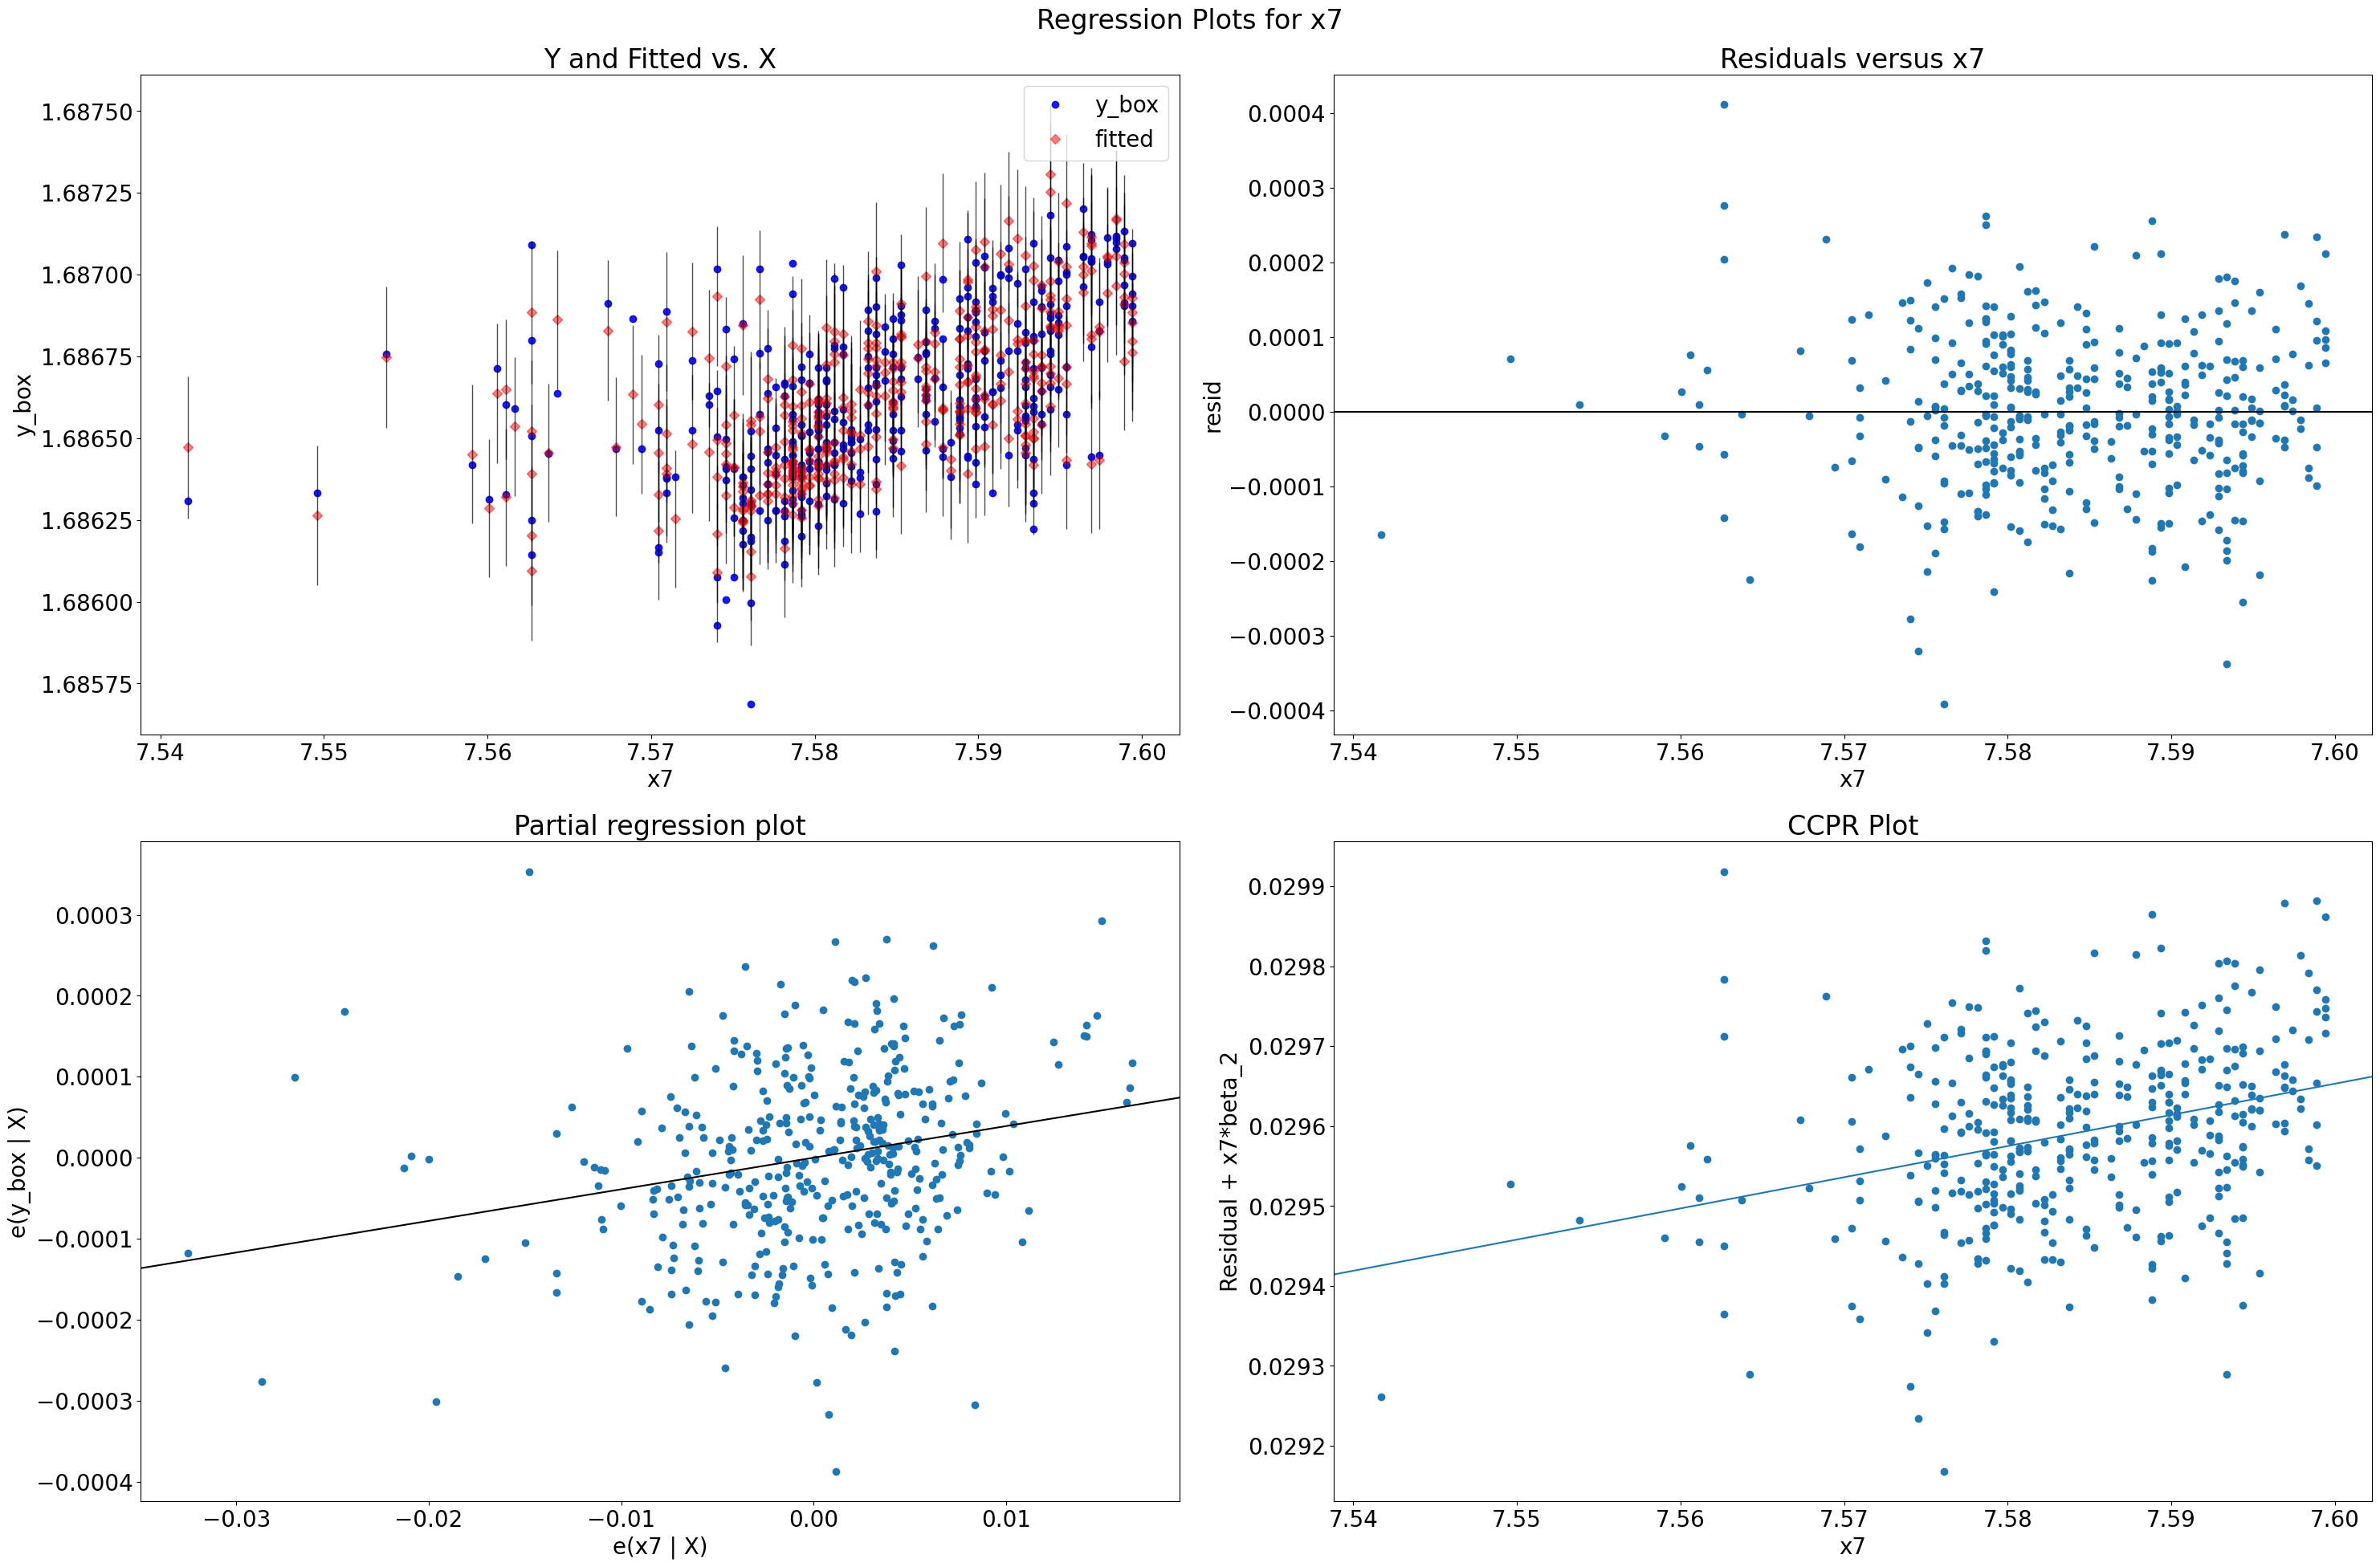

In [132]:
fig = plt.figure(figsize = (30,20))
plt.rcParams['font.size'] = '20'
sm.graphics.plot_regress_exog(model_sw, "x7", fig = fig)
fig.tight_layout(pad=1.0)

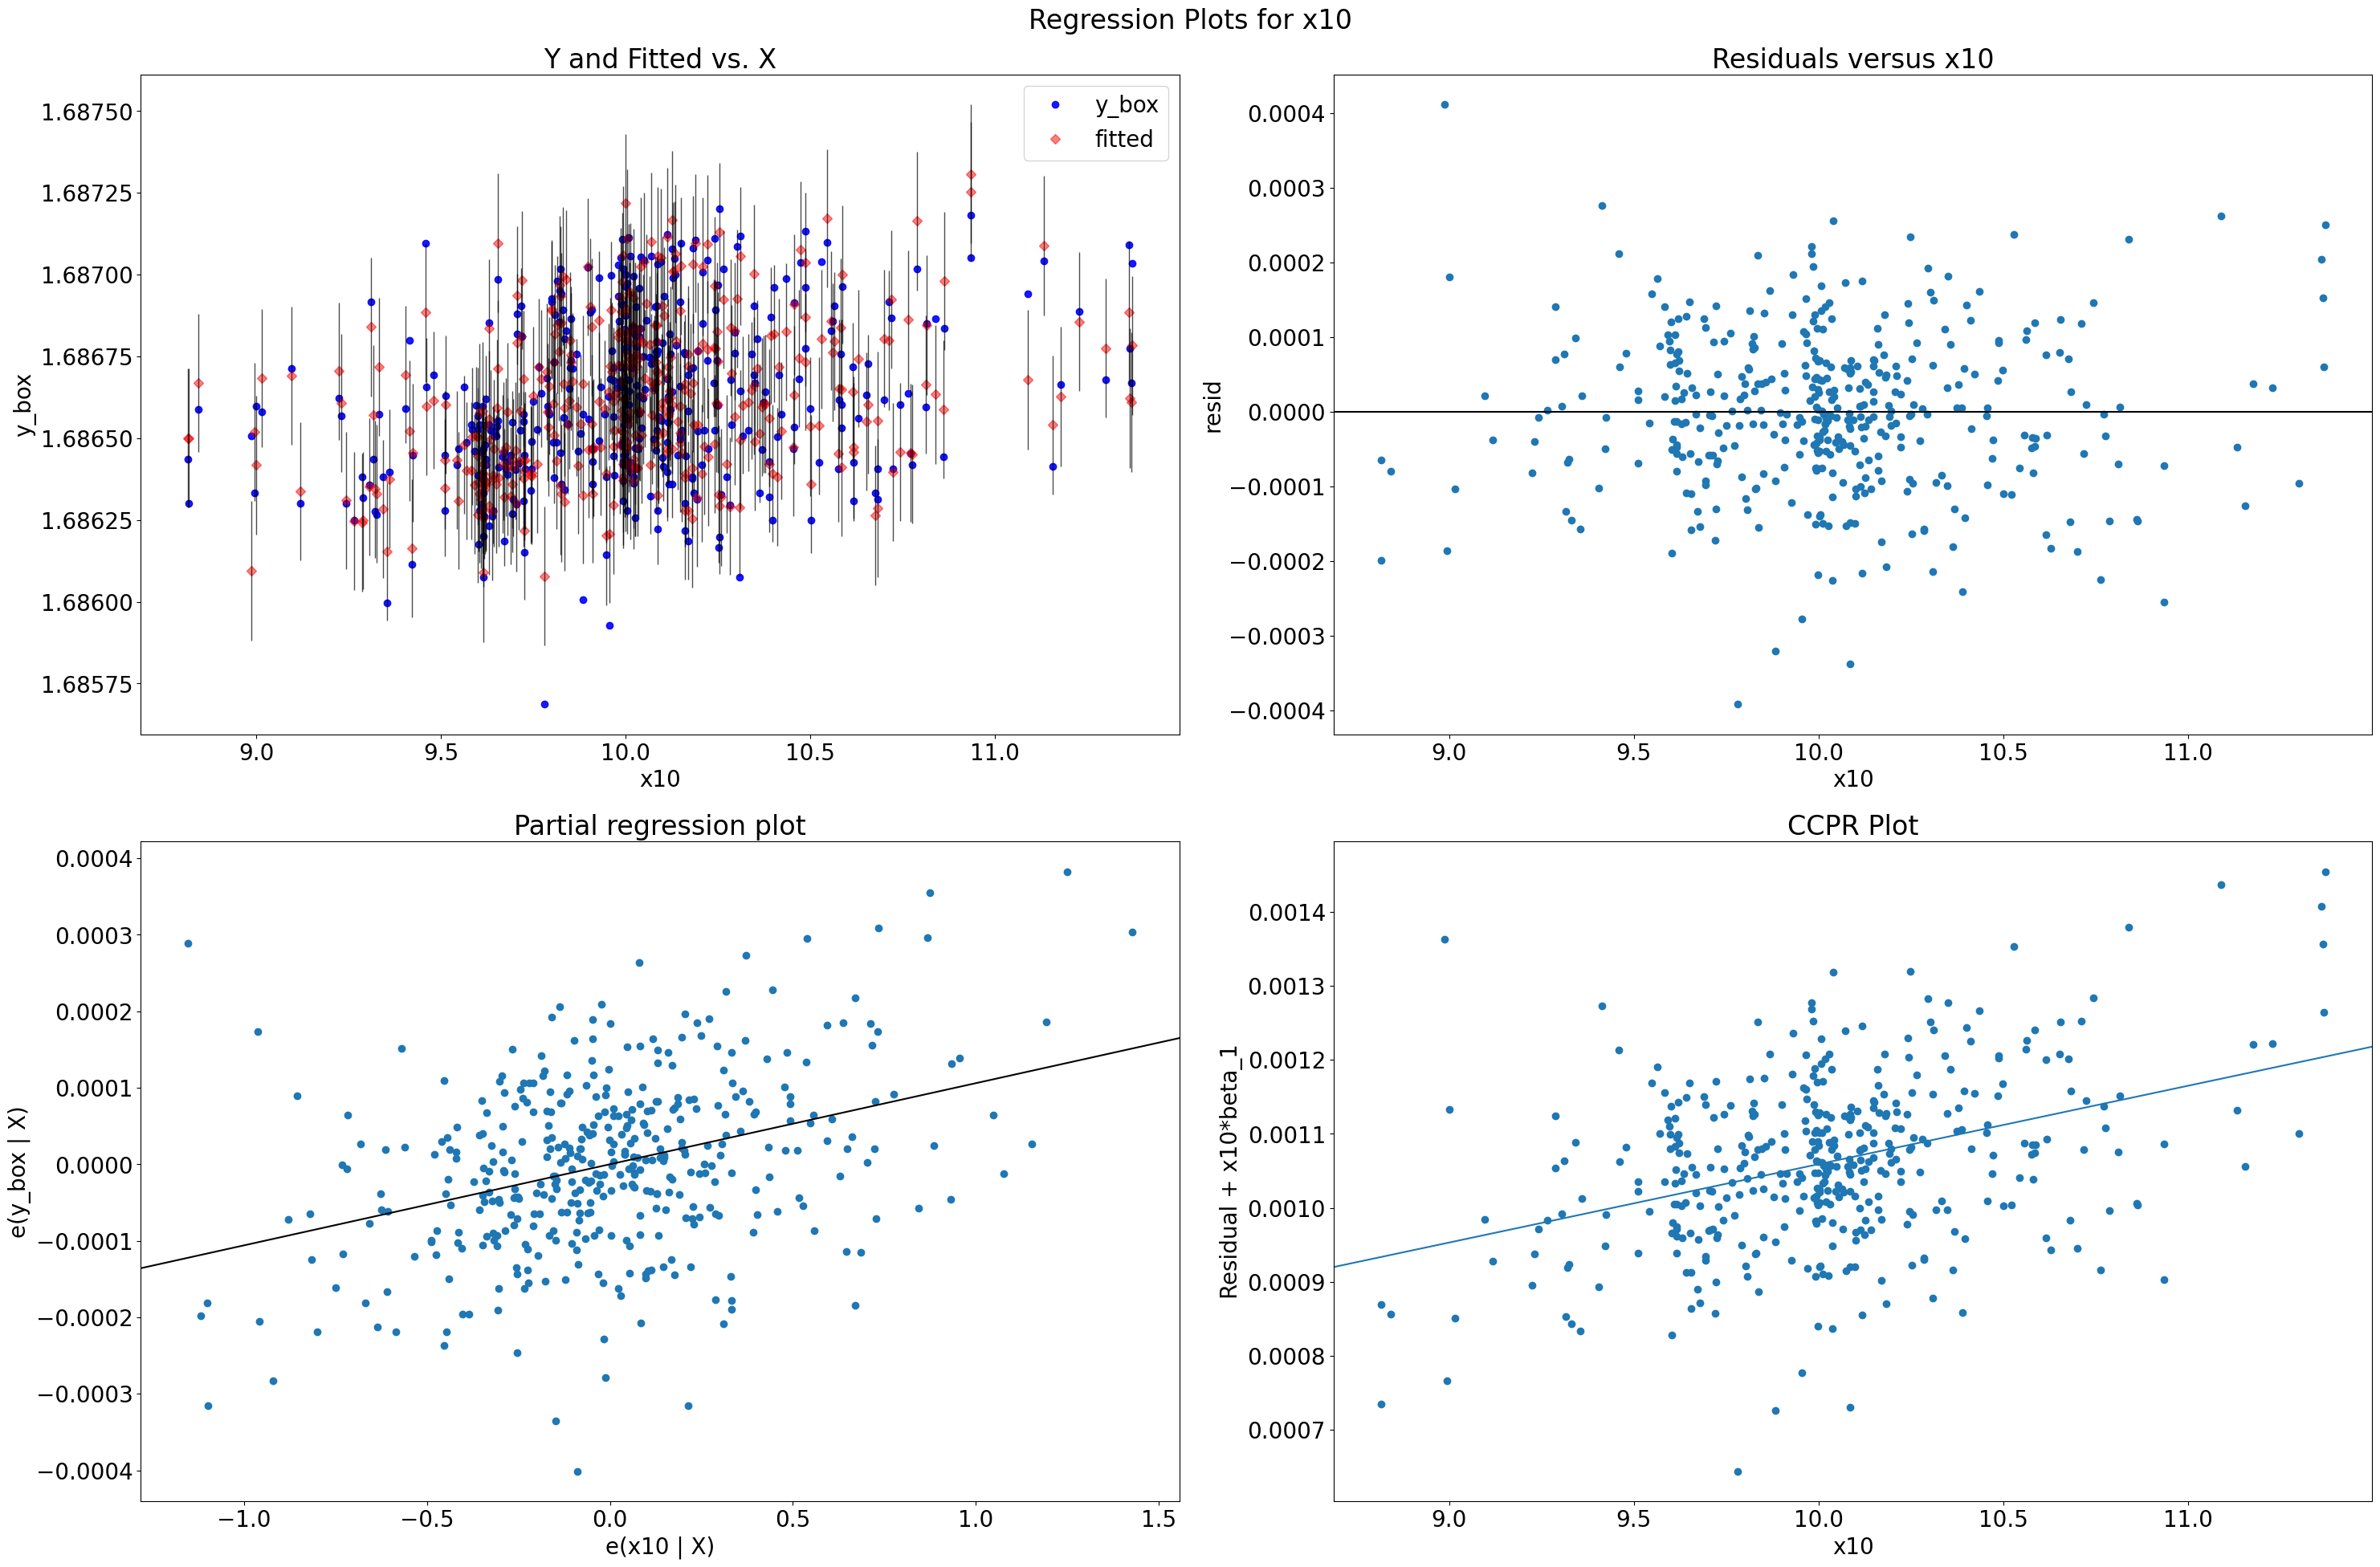

In [133]:
fig = plt.figure(figsize = (30,20))
plt.rcParams['font.size'] = '20'
sm.graphics.plot_regress_exog(model_sw, "x10", fig = fig)
fig.tight_layout(pad=1.0)

# Checking for possible interaction terms

In [134]:
final2_X = X_sw2
#final2_X.drop(columns = 'const' , inplace=True)
final2_X

x1  x3  x4        x7  x9        x10  x8_2  x8_3
220  7.731931   0   1  7.578657   1  10.148119     1     0
69   8.294050   1   1  7.590347   0  10.068790     0     0
374  7.664816   1   1  7.588830   1  10.629392     1     0
305  7.615791   1   1  7.580189   1   9.994881     1     0
173  8.196988   1   1  7.585281   0  10.055479     1     0
..        ...  ..  ..       ...  ..        ...   ...   ...
71   8.265907   1   1  7.596392   0  10.253369     0     0
106  8.165079   1   1  7.590347   0   9.896815     0     0
270  7.783224   1   1  7.588830   0  10.699800     1     0
435  7.454720   0   1  7.575585   1   9.305560     0     1
102  8.523573   1   1  7.595387   0   9.998798     0     0

[417 rows x 8 columns]

In [135]:
for cols in ['x1','x7','x10']:
    final2_X[cols] = final2_X[cols]/np.sqrt(final2_X.shape[0]-1)

In [136]:
final2_standardized = final2_X

In [137]:
final2_standardized

x1  x3  x4        x7  x9       x10  x8_2  x8_3
220  0.379089   0   1  0.371574   1  0.497552     1     0
69   0.406649   1   1  0.372147   0  0.493663     0     0
374  0.375799   1   1  0.372073   1  0.521149     1     0
305  0.373395   1   1  0.371649   1  0.490039     1     0
173  0.401890   1   1  0.371899   0  0.493010     1     0
..        ...  ..  ..       ...  ..       ...   ...   ...
71   0.405269   1   1  0.372444   0  0.502713     0     0
106  0.400326   1   1  0.372147   0  0.485231     0     0
270  0.381604   1   1  0.372073   0  0.524601     1     0
435  0.365498   0   1  0.371424   1  0.456243     0     1
102  0.417903   1   1  0.372394   0  0.490231     0     0

[417 rows x 8 columns]

In [138]:
import numpy as np

numerical_cols = ['x1', 'x7', 'x10']
categorical_cols = ['x8_3', 'x8_2', 'x4', 'x3', 'x9']

# Adding squared terms for numerical columns
for col in numerical_cols:
    squared_col = f"{col}^2"
    if squared_col not in final2_standardized.columns:
        final2_standardized[squared_col] = np.square(final2_standardized[col])

# Adding interaction terms
for num_col in numerical_cols:
    for cat_col in categorical_cols:
        interaction_col = f"{num_col}*{cat_col}"
        if interaction_col not in final2_standardized.columns:
            # Convert categorical column to numerical representation
            numerical_cat_col = pd.Categorical(final2_standardized[cat_col]).codes
            final2_standardized[interaction_col] = final2_standardized[num_col] * numerical_cat_col

# Adding interaction terms between numerical columns
for col1 in numerical_cols:
    for col2 in numerical_cols:
        if col1 != col2:
            interaction_col = f"{col1}*{col2}"
            if interaction_col not in final2_standardized.columns:
                final2_standardized[interaction_col] = final2_standardized[col1] * final2_standardized[col2]


In [139]:
#final1_standardized.drop(columns='const')
final2_standardized

x1  x3  x4        x7  x9       x10  x8_2  x8_3      x1^2      x7^2  \
220  0.379089   0   1  0.371574   1  0.497552     1     0  0.143709  0.138067   
69   0.406649   1   1  0.372147   0  0.493663     0     0  0.165364  0.138494   
374  0.375799   1   1  0.372073   1  0.521149     1     0  0.141225  0.138438   
305  0.373395   1   1  0.371649   1  0.490039     1     0  0.139424  0.138123   
173  0.401890   1   1  0.371899   0  0.493010     1     0  0.161516  0.138309   
..        ...  ..  ..       ...  ..       ...   ...   ...       ...       ...   
71   0.405269   1   1  0.372444   0  0.502713     0     0  0.164243  0.138714   
106  0.400326   1   1  0.372147   0  0.485231     0     0  0.160261  0.138494   
270  0.381604   1   1  0.372073   0  0.524601     1     0  0.145622  0.138438   
435  0.365498   0   1  0.371424   1  0.456243     0     1  0.133589  0.137955   
102  0.417903   1   1  0.372394   0  0.490231     0     0  0.174643  0.138678   

     ...  x10*x8_2    x10*x4    x10*x3    x10*x9     x1*x7    x1*x10  \
220  ...  0.497552  0.497552  0.000000  0.497552  0.140860  0.188617   
69   ...  0.000000  0.493663  0.493663  0.000000  0.151333  0.200748   
374  ...  0.521149  0.521149  0.521149  0.521149  0.139824  0.195847   
305  ...  0.490039  0.490039  0.490039  0.490039  0.138772  0.182978   
173  ...  0.493010  0.493010  0.493010  0.000000  0.149463  0.198136   
..   ...       ...       ...       ...       ...       ...       ...   
71   ...  0.000000  0.502713  0.502713  0.000000  0.150940  0.203734   
106  ...  0.000000  0.485231  0.485231  0.000000  0.148980  0.194251   
270  ...  0.524601  0.524601  0.524601  0.000000  0.141985  0.200190   
435  ...  0.000000  0.456243  0.000000  0.456243  0.135754  0.166756   
102  ...  0.000000  0.490231  0.490231  0.000000  0.155625  0.204869   

        x7*x1    x7*x10    x10*x1    x10*x7  
220  0.140860  0.184878  0.188617  0.184878  
69   0.151333  0.183715  0.200748  0.183715  
374  0.139824  0.193905  0.195847  0.193905  
305  0.138772  0.182123  0.182978  0.182123  
173  0.149463  0.183350  0.198136  0.183350  
..        ...       ...       ...       ...  
71   0.150940  0.187232  0.203734  0.187232  
106  0.148980  0.180578  0.194251  0.180578  
270  0.141985  0.195190  0.200190  0.195190  
435  0.135754  0.169459  0.166756  0.169459  
102  0.155625  0.182559  0.204869  0.182559  

[417 rows x 32 columns]

In [140]:
Y_sw2

220    1.686660
69     1.687056
374    1.686560
305    1.686541
173    1.686861
         ...   
71     1.687201
106    1.687022
270    1.686617
435    1.686358
102    1.686999
Name: y_box, Length: 417, dtype: float64

In [141]:
from sklearn.preprocessing import StandardScaler

# Assuming X_sw contains your numerical features
scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X_sw)

Y_std2 = (scaler.fit_transform(pd.DataFrame(Y_sw2))/np.sqrt(len(Y_sw2)-1))
# Assuming Y_stanadrdized contains your standardized target variable
Y_std2 = pd.DataFrame(Y_std2, columns=['y_std2'])
Y_std2

y_std2
0    0.007695
1    0.084061
2   -0.011432
3   -0.015277
4    0.046538
..        ...
412  0.112008
413  0.077458
414 -0.000488
415 -0.050387
416  0.073058

[417 rows x 1 columns]

In [142]:
# Resetting indices for Y_std and final1_standardized
Y_std2.reset_index(drop=True, inplace=True)
final2_standardized.reset_index(drop=True, inplace=True)

# Fitting the model
model_itr2 = sm.OLS(Y_std2, final2_standardized).fit()
pred_itr2 = model_itr2.predict(final2_standardized)

# Calculating residuals
residuals_itr2 = Y_std2 - pred_itr2  # Use Y_std instead of Y_stanadrdized

# Get summary of the model
summary_itr2 = model_itr2.summary()
print(summary_itr2)

                                 OLS Regression Results                                
Dep. Variable:                 y_std2   R-squared (uncentered):                   0.853
Model:                            OLS   Adj. R-squared (uncentered):              0.842
Method:                 Least Squares   F-statistic:                              77.73
Date:                Sat, 20 Apr 2024   Prob (F-statistic):                   1.51e-142
Time:                        00:41:14   Log-Likelihood:                          1065.7
No. Observations:                 417   AIC:                                     -2073.
Df Residuals:                     388   BIC:                                     -1956.
Df Model:                          29                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [143]:
# Initialize empty lists to store attributes and p-values
attributes = []
p_values = []

# Iterate over each attribute in the final1_standardized columns
for attribute in final2_standardized.columns:
    # Check if the p-value for the attribute is greater than 0.05 and if the attribute is present in X_sw.columns
    if model_itr2.pvalues[attribute] > 0.05 and attribute in X_sw2.columns:
        # Append the attribute name and its p-value to the respective lists
        attributes.append(attribute)
        p_values.append(model_itr2.pvalues[attribute])

# Create a DataFrame from the lists of attributes and p-values
itr_tab = pd.DataFrame({"Attribute": attributes, "p-value": p_values})

In [144]:
itr_tab 

Attribute   p-value
0         x1  0.143467
1         x3  0.371007
2         x4  0.350379
3         x9  0.290302
4        x10  0.146028
5       x8_2  0.058603
6       x1^2  0.731911
7      x10^2  0.504100
8      x1*x4  0.272232
9      x1*x3  0.540847
10     x1*x9  0.375494
11   x7*x8_2  0.088932
12     x7*x4  0.327767
13     x7*x3  0.367583
14     x7*x9  0.279355
15  x10*x8_3  0.157308
16  x10*x8_2  0.155921
17    x10*x4  0.722536
18    x10*x3  0.239866
19    x10*x9  0.641091
20     x1*x7  0.137478
21    x1*x10  0.502646
22     x7*x1  0.137478
23    x7*x10  0.155626
24    x10*x1  0.502646
25    x10*x7  0.155626

In [145]:
final_features2 = final2_standardized.columns
## These are the final model features with interaction terms
final_features2

Index(['x1', 'x3', 'x4', 'x7', 'x9', 'x10', 'x8_2', 'x8_3', 'x1^2', 'x7^2',
       'x10^2', 'x1*x8_3', 'x1*x8_2', 'x1*x4', 'x1*x3', 'x1*x9', 'x7*x8_3',
       'x7*x8_2', 'x7*x4', 'x7*x3', 'x7*x9', 'x10*x8_3', 'x10*x8_2', 'x10*x4',
       'x10*x3', 'x10*x9', 'x1*x7', 'x1*x10', 'x7*x1', 'x7*x10', 'x10*x1',
       'x10*x7'],
      dtype='object')

In [146]:
model_itr2_2 = sm.OLS(Y_std2, final2_standardized[final_features2]).fit()
summary_itr2_2 = model_itr2_2.summary()
print(summary_itr2_2)

                                 OLS Regression Results                                
Dep. Variable:                 y_std2   R-squared (uncentered):                   0.853
Model:                            OLS   Adj. R-squared (uncentered):              0.842
Method:                 Least Squares   F-statistic:                              77.73
Date:                Sat, 20 Apr 2024   Prob (F-statistic):                   1.51e-142
Time:                        00:41:17   Log-Likelihood:                          1065.7
No. Observations:                 417   AIC:                                     -2073.
Df Residuals:                     388   BIC:                                     -1956.
Df Model:                          29                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [147]:
pred_itr2_2 = model_itr2_2.predict(final2_standardized[final_features2])
pd.DataFrame(pred_itr2)

0
0   -0.000222
1    0.075608
2    0.032272
3    0.002680
4    0.057077
..        ...
412  0.080947
413  0.071907
414  0.036348
415 -0.045636
416  0.078898

[417 rows x 1 columns]

In [148]:
np.array(Y_std2)

array([[ 7.69474887e-03],
       [ 8.40613222e-02],
       [-1.14318025e-02],
       [-1.52766732e-02],
       [ 4.65377762e-02],
       [-1.02389662e-02],
       [-1.65108153e-02],
       [ 3.84446801e-02],
       [ 4.77682225e-02],
       [ 1.19344999e-02],
       [ 1.10116603e-02],
       [ 4.25465948e-02],
       [ 5.61008486e-02],
       [-1.20046301e-01],
       [ 1.14744987e-02],
       [-2.56452929e-02],
       [ 9.60583447e-03],
       [ 2.64433740e-02],
       [-1.20501883e-02],
       [-1.84964518e-02],
       [-2.91649941e-02],
       [ 3.19576901e-03],
       [ 9.46123290e-02],
       [-2.91649941e-02],
       [ 2.82571157e-02],
       [-3.70539757e-02],
       [-2.19107916e-02],
       [ 1.92598538e-03],
       [-1.33158443e-01],
       [-1.25482044e-02],
       [-2.69259679e-02],
       [-7.48005705e-02],
       [ 1.89305539e-02],
       [-4.48648932e-02],
       [-3.31034763e-02],
       [-8.35565632e-02],
       [-7.25660904e-03],
       [ 1.23916921e-02],
       [ 4.8

In [149]:
# Assuming Y_std is a DataFrame or Series and model_itr2.predict() returns a 1D array

# Convert the predicted values to a DataFrame or Series for easier handling
predictions_model2 = pd.Series(model_itr2_2.predict(final2_standardized[final_features2]))

# Ensure the shapes are consistent for subtraction
if isinstance(Y_std2, pd.DataFrame):
    m = np.array(Y_std2.iloc[:, 0]) - np.array(predictions_model2)
elif isinstance(Y_std2, pd.Series):
    m = np.array(Y_std2) - np.array(predictions_model2)
else:
    raise ValueError("Unsupported data type for Y_std. Must be DataFrame or Series.")

# Create a DataFrame from the residuals
residuals_df_model2 = pd.DataFrame(m)
residuals_itr2_model2 =residuals_df_model2

In [150]:
pred_itr2_2=pd.DataFrame(pred_itr2_2)
pred_itr2_2

residuals_itr2_model2

0
0    0.007916
1    0.008453
2   -0.043704
3   -0.017957
4   -0.010539
..        ...
412  0.031061
413  0.005551
414 -0.036836
415 -0.004751
416 -0.005840

[417 rows x 1 columns]

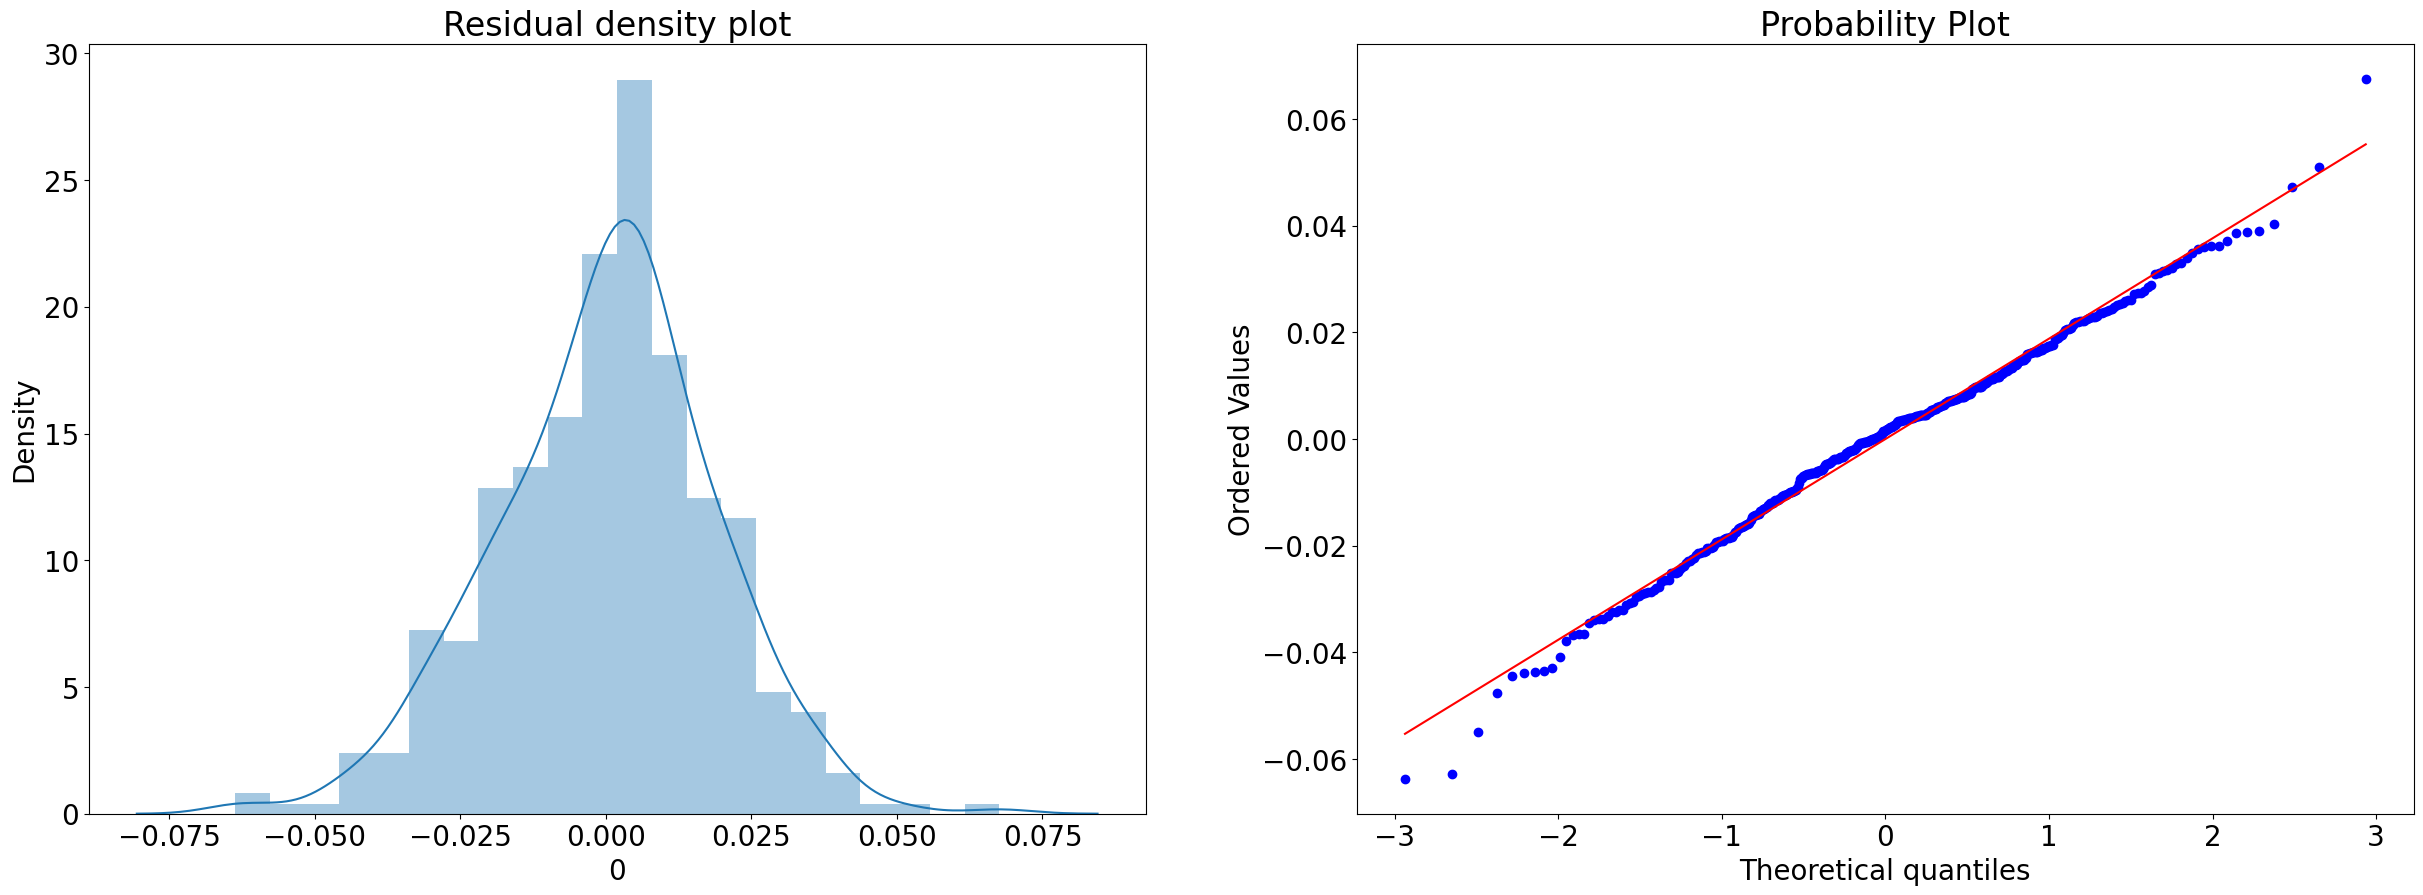

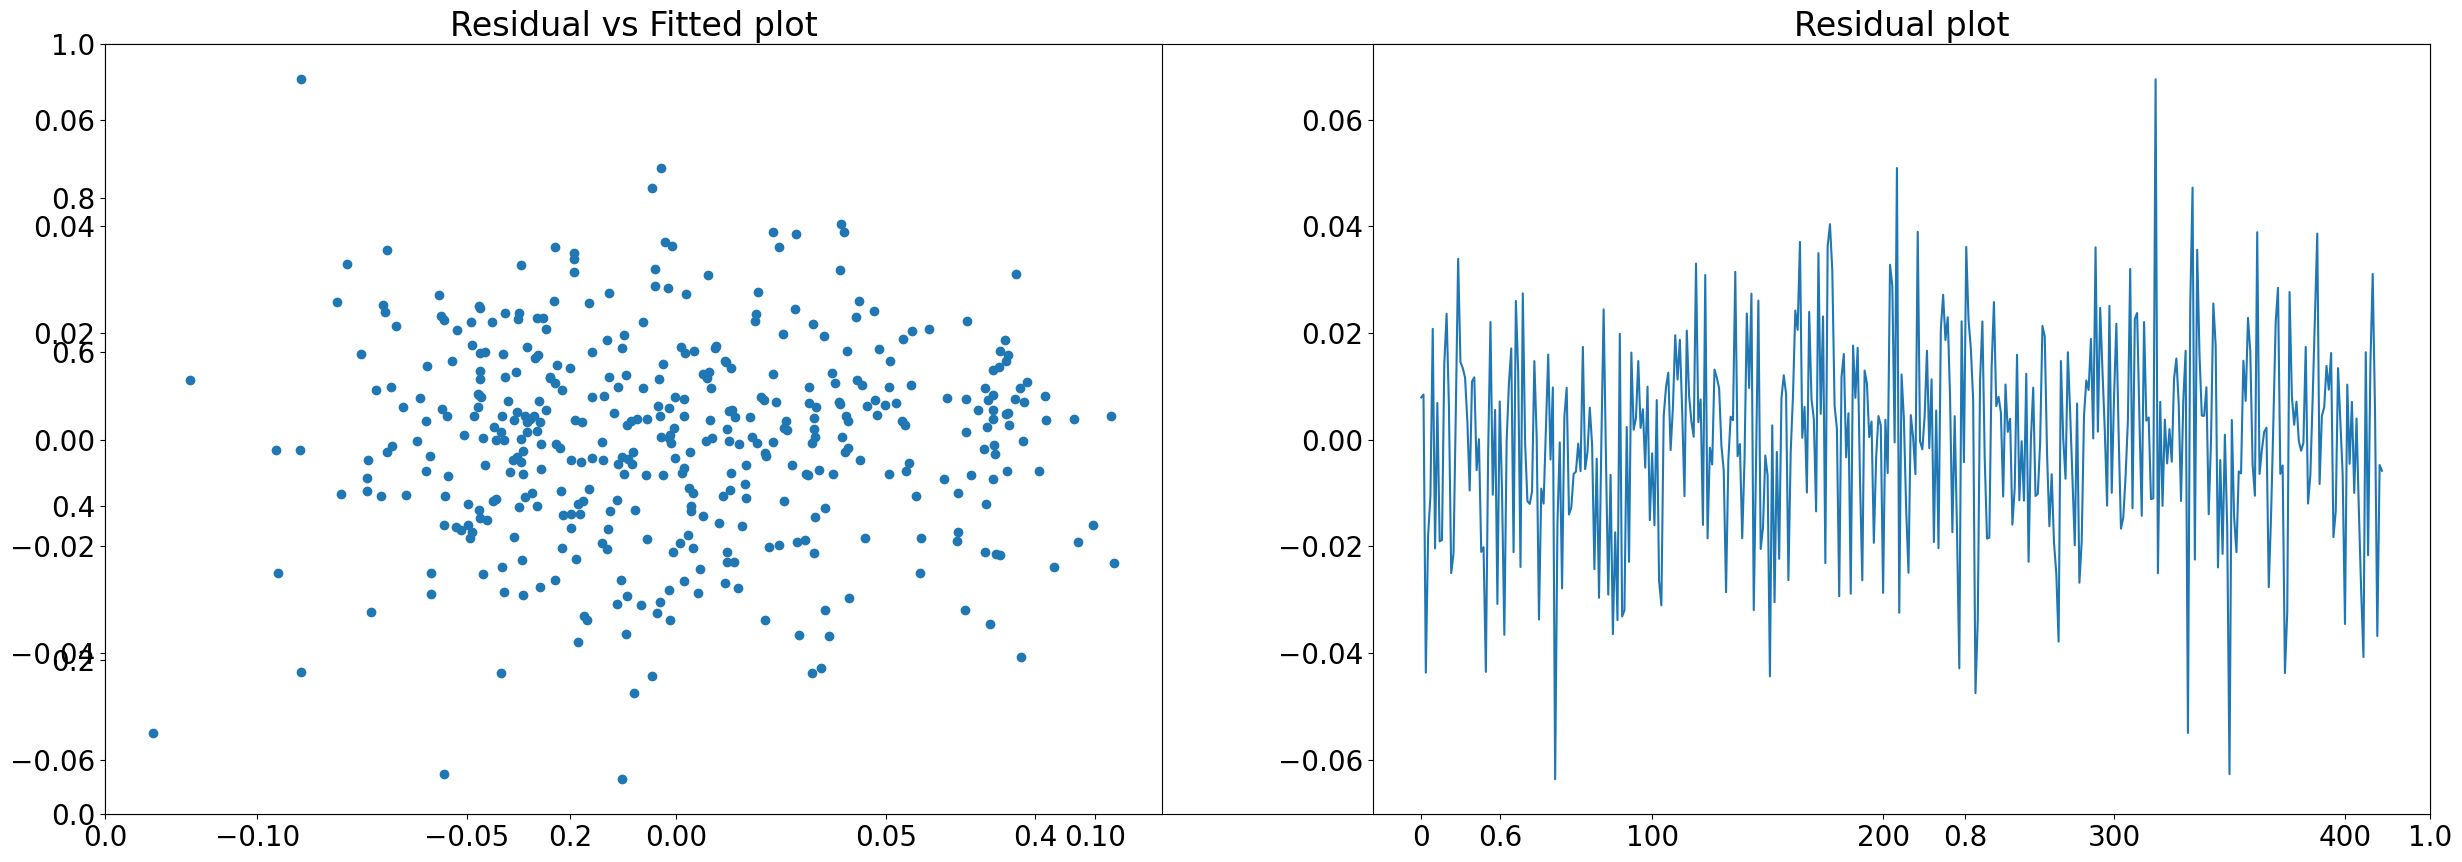

In [151]:
import scipy.stats as stats

# Assuming residuals_itr2 is a DataFrame or Series
if isinstance(residuals_itr2_model2, pd.DataFrame):
    residuals_itr2_model2 = residuals_itr2_model2.iloc[:, 0]  # Extracting the first column if it's a DataFrame
elif not isinstance(residuals_itr2_model2, pd.Series):
    raise ValueError("residuals_itr2 must be a DataFrame or Series.")

# Plotting the Q-Q plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
plt.rcParams['font.size'] = '20'
sns.distplot(residuals_itr2_model2, ax=ax1)
ax1.set_title("Residual density plot")

stats.probplot(residuals_itr2_model2, plot=ax2, fit=True)
plt.show()

# Plotting Residual vs Fitted and Residual plot
plt.subplots(figsize=(30, 10))
plt.rcParams['font.size'] = '20'

plt.subplot(1, 2, 1)
plt.scatter(pred_itr2_2, residuals_itr2_model2)
plt.title("Residual vs Fitted plot")

plt.subplot(1, 2, 2)
plt.plot(residuals_itr2_model2)
plt.title("Residual plot")
plt.show()

# OUTLIER DETECTION

In [152]:
import itertools
from itertools import chain, combinations
import statsmodels.formula.api as sm
import scipy.stats as scipystats
import statsmodels.api as sm
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats 
from statsmodels.graphics.regressionplots import *
import copy
from sklearn.model_selection import train_test_split
import math
import time

In [153]:
## Hat matrix diagonal entries
final_model2 = model_itr2_2
influence_m2 = final_model2.get_influence()
h_ii_m2 = pd.Series(influence_m2.hat_matrix_diag)

In [154]:
influence_m2 = model_itr2_2.get_influence()
inf_sum_m2 = influence_m2.summary_frame()
inf_sum_m2 = pd.DataFrame(inf_sum_m2)

In [155]:
inf_sum_m2

dfb_x1    dfb_x3    dfb_x4    dfb_x7    dfb_x9   dfb_x10  dfb_x8_2  \
0    0.010932 -0.028321 -0.000534 -0.012898  0.020384  0.007067  0.005316   
1    0.015680  0.000240  0.003329 -0.013241 -0.001394  0.001551 -0.023450   
2   -0.024004  0.063885  0.055054 -0.034380  0.131930  0.082418  0.048719   
3    0.029550 -0.046904  0.012479 -0.032124 -0.025505  0.011574 -0.016324   
4   -0.004738  0.003165 -0.003352  0.000792  0.010546  0.005792 -0.002370   
..        ...       ...       ...       ...       ...       ...       ...   
412  0.003426  0.008633  0.008294 -0.051573  0.051483  0.062589  0.136847   
413  0.006807  0.000838 -0.001756 -0.000235  0.002926 -0.006915 -0.023108   
414 -0.081198  0.029650  0.045719  0.031380 -0.075554  0.070429  0.000342   
415 -0.011498 -0.000068 -0.007348  0.000528 -0.011779  0.018782 -0.002972   
416  0.024797 -0.002091 -0.012012  0.000292  0.023327 -0.035416 -0.024730   

     dfb_x8_3  dfb_x1^2  dfb_x7^2  ...  dfb_x7*x1  dfb_x7*x10  dfb_x10*x1  \
0   -0.008679 -0.000553  0.012778  ...  -0.010892   -0.006631   -0.000850   
1   -0.010445 -0.003547  0.012897  ...  -0.015225   -0.001104   -0.007256   
2    0.000406  0.031013  0.036303  ...   0.020663   -0.083640    0.051721   
3    0.001859  0.015865  0.032700  ...  -0.030414   -0.011464   -0.014804   
4    0.000316 -0.056253 -0.001973  ...   0.007816   -0.006751    0.015776   
..        ...       ...       ...  ...        ...         ...         ...   
412  0.090046 -0.050372  0.049346  ...   0.000619   -0.061407   -0.017016   
413 -0.013438 -0.011879  0.000016  ...  -0.006229    0.006782    0.003773   
414  0.000375  0.101024 -0.028200  ...   0.073453   -0.069792    0.095532   
415 -0.012752  0.000502 -0.000325  ...   0.011225   -0.019020    0.013892   
416 -0.014069 -0.065547 -0.000625  ...  -0.022775    0.033781    0.045582   

     dfb_x10*x7   cooks_d  standard_resid  hat_diag  dffits_internal  \
0     -0.006631  0.000220        0.414655  0.039254         0.083816   
1     -0.001104  0.000380        0.446988  0.057320         0.110221   
2     -0.083640  0.008078       -2.298086  0.046664        -0.508433   
3     -0.011464  0.000658       -0.933001  0.023633        -0.145155   
4     -0.006751  0.000432       -0.553161  0.043220        -0.117567   
..          ...       ...             ...       ...              ...   
412   -0.061407  0.004666        1.638430  0.052686         0.386391   
413    0.006782  0.000141        0.292413  0.050233         0.067249   
414   -0.069792  0.006443       -1.942220  0.051827        -0.454081   
415   -0.019020  0.000143       -0.252496  0.066754        -0.067530   
416    0.033781  0.000809       -0.332991  0.189357        -0.160938   

     student_resid    dffits  
0         0.414212  0.083726  
1         0.446526  0.110107  
2        -2.310904 -0.511269  
3        -0.932845 -0.145130  
4        -0.552665 -0.117462  
..             ...       ...  
412       1.642008  0.387235  
413       0.292068  0.067169  
414      -1.949214 -0.455716  
415      -0.252191 -0.067448  
416      -0.332609 -0.160753  

[417 rows x 38 columns]

In [156]:
student_resid_m2 = influence_m2.resid_studentized_external
(cooks, p) = influence_m2.cooks_distance
(dffits, p) = influence_m2.dffits
leverage = influence_m2.hat_matrix_diag

In [161]:
inf_sum_m2 = inf_sum_m2[['standard_resid', 'student_resid', 'hat_diag', 'cooks_d', 'dffits_internal', 'dffits']]
inf_sum_m2

standard_resid  student_resid  hat_diag   cooks_d  dffits_internal  \
0          0.414655       0.414212  0.039254  0.000220         0.083816   
1          0.446988       0.446526  0.057320  0.000380         0.110221   
2         -2.298086      -2.310904  0.046664  0.008078        -0.508433   
3         -0.933001      -0.932845  0.023633  0.000658        -0.145155   
4         -0.553161      -0.552665  0.043220  0.000432        -0.117567   
..              ...            ...       ...       ...              ...   
412        1.638430       1.642008  0.052686  0.004666         0.386391   
413        0.292413       0.292068  0.050233  0.000141         0.067249   
414       -1.942220      -1.949214  0.051827  0.006443        -0.454081   
415       -0.252496      -0.252191  0.066754  0.000143        -0.067530   
416       -0.332991      -0.332609  0.189357  0.000809        -0.160938   

       dffits  
0    0.083726  
1    0.110107  
2   -0.511269  
3   -0.145130  
4   -0.117462  
..        ...  
412  0.387235  
413  0.067169  
414 -0.455716  
415 -0.067448  
416 -0.160753  

[417 rows x 6 columns]

In [162]:
inf_sum_m2['y2'] = (Y_std2)
inf_sum_m2

standard_resid  student_resid  hat_diag   cooks_d  dffits_internal  \
0          0.414655       0.414212  0.039254  0.000220         0.083816   
1          0.446988       0.446526  0.057320  0.000380         0.110221   
2         -2.298086      -2.310904  0.046664  0.008078        -0.508433   
3         -0.933001      -0.932845  0.023633  0.000658        -0.145155   
4         -0.553161      -0.552665  0.043220  0.000432        -0.117567   
..              ...            ...       ...       ...              ...   
412        1.638430       1.642008  0.052686  0.004666         0.386391   
413        0.292413       0.292068  0.050233  0.000141         0.067249   
414       -1.942220      -1.949214  0.051827  0.006443        -0.454081   
415       -0.252496      -0.252191  0.066754  0.000143        -0.067530   
416       -0.332991      -0.332609  0.189357  0.000809        -0.160938   

       dffits        y2  
0    0.083726  0.007695  
1    0.110107  0.084061  
2   -0.511269 -0.011432  
3   -0.145130 -0.015277  
4   -0.117462  0.046538  
..        ...       ...  
412  0.387235  0.112008  
413  0.067169  0.077458  
414 -0.455716 -0.000488  
415 -0.067448 -0.050387  
416 -0.160753  0.073058  

[417 rows x 7 columns]

Text(0, 0.5, 'Studentized Residuals')

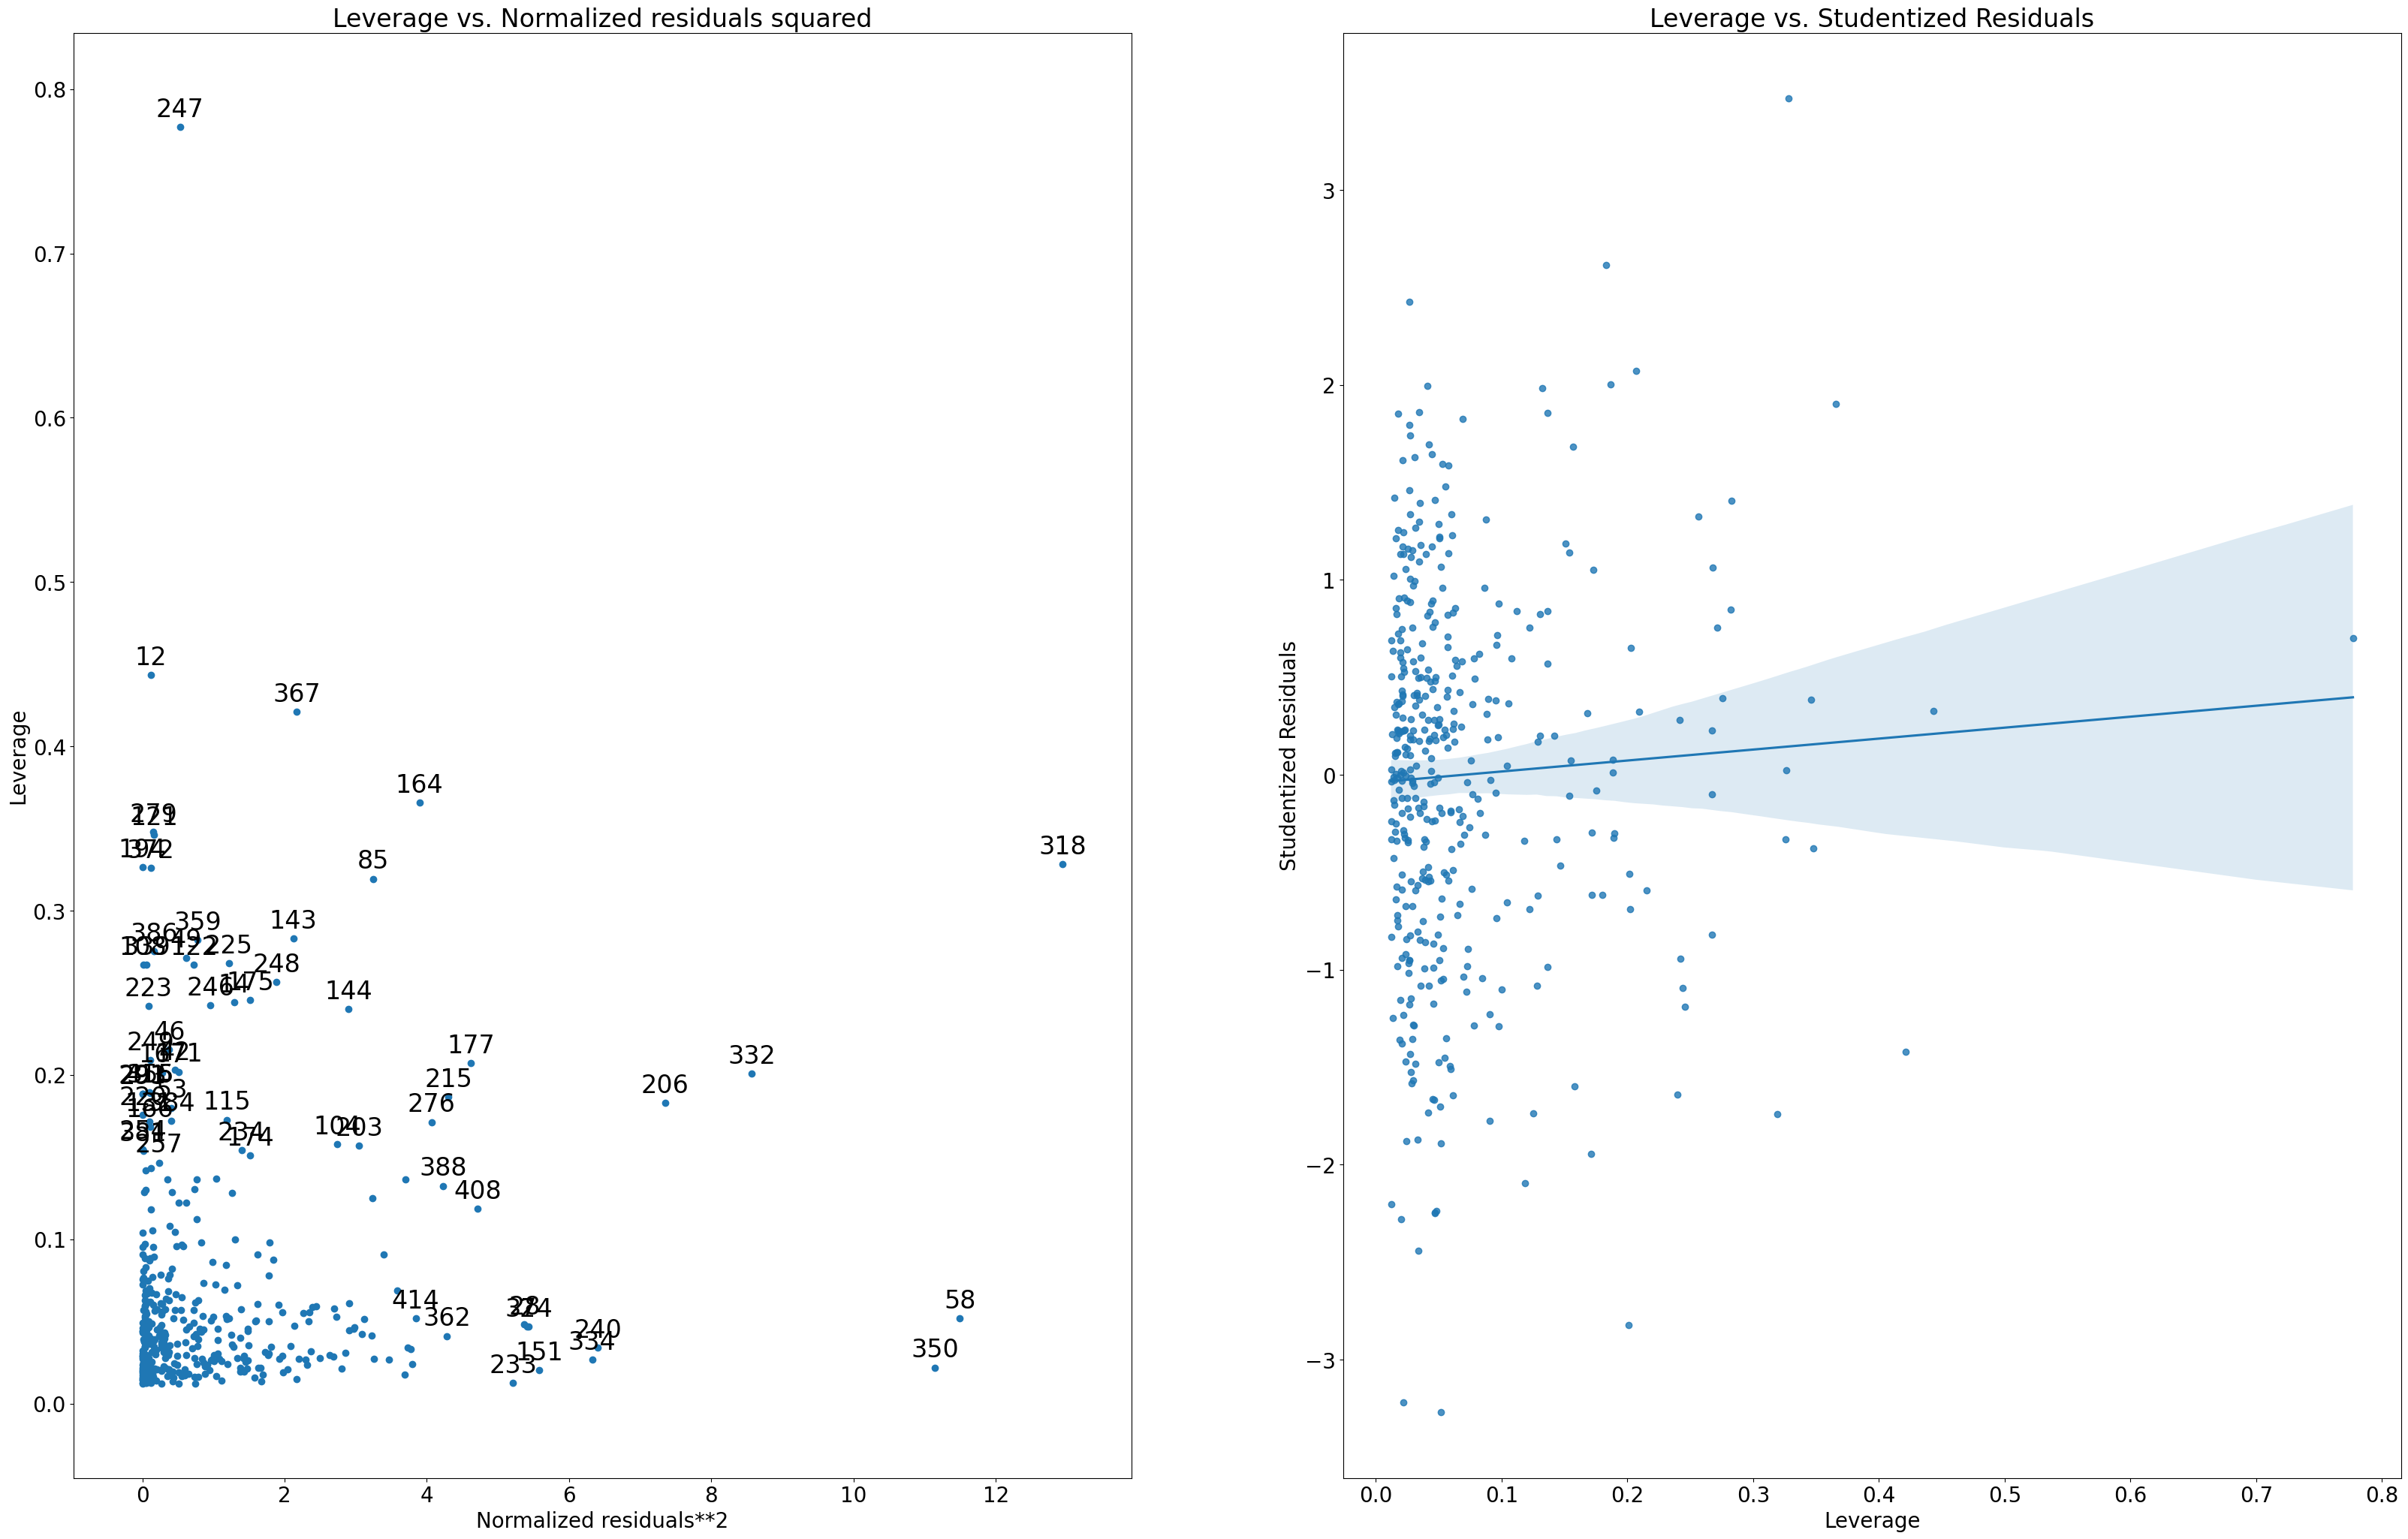

In [163]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(40, 25))
plt.rcParams['font.size'] = '20'
plt.rc('axes', labelsize = 40)
plot_leverage_resid2(final_model2, ax=ax1)

plt.rcParams['font.size'] = '20'
sns.regplot(x=leverage, y=final_model2.resid_pearson, ax=ax2)
plt.title('Leverage vs. Studentized Residuals')
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')

In [164]:
r = inf_sum_m2.student_resid
print ('-'*30 + ' studentized residual ' + '-'*30)
print (r.describe())
print ('\n')

r_sort = inf_sum_m2.sort_values(by = 'student_resid')
print ('-'*20 + ' top 5 most negative stundentized residuals ' + '-'*20)
print (r_sort['student_resid'].head())
print ('\n')

print ('-'*20 + ' top 5 most positive studentized residuals ' + '-'*20)
print (r_sort['student_resid'].tail())

------------------------------ studentized residual ------------------------------
count    417.000000
mean       0.003324
std        1.020278
min       -3.404061
25%       -0.607641
50%        0.084580
75%        0.612619
max        4.328185
Name: student_resid, dtype: float64


-------------------- top 5 most negative stundentized residuals --------------------
58    -3.404061
350   -3.297471
332   -3.196144
240   -2.500639
374   -2.315572
Name: student_resid, dtype: float64


-------------------- top 5 most positive studentized residuals --------------------
177    2.342750
164    2.405283
334    2.475126
206    2.920702
318    4.328185
Name: student_resid, dtype: float64


In [166]:
## printing y values which is outlier

print (inf_sum_m2.y2[abs(r) > 2])

2     -0.011432
28    -0.133158
58    -0.076741
85    -0.035421
151   -0.050293
164    0.034401
177    0.079713
206    0.047197
215    0.061923
233   -0.008407
236    0.007203
240   -0.057656
276   -0.061286
318   -0.021911
332   -0.179878
334    0.041508
350   -0.118280
362    0.078947
374   -0.085527
388    0.067296
408    0.041508
Name: y2, dtype: float64


In [169]:
#Identify high leverage
#point with leverage = (2k+2)/n 
#k = number of predictors (11)
#n = number of observations (506)
# ((2*12)+2)/264 = 0.09848 any numbner higher than this is high leverage
thres_hii_m2= 2*(len(final_features2)+1)/len(inf_sum_m2.y2)
inf_hii_m2 = pd.DataFrame(inf_sum_m2[['y2', 'hat_diag']][abs(inf_sum_m2.hat_diag) > thres_hii_m2])
inf_hii_m2

y2  hat_diag
12   0.056101  0.443326
14   0.011474  0.244122
42   0.020579  0.203002
46  -0.033896  0.215314
49   0.026443  0.271387
53  -0.061656  0.179999
85  -0.035421  0.319336
108 -0.091658  0.266969
115  0.076575  0.172669
121  0.076575  0.346222
122  0.083375  0.267032
131  0.049107  0.171695
143  0.029739  0.282991
144  0.003452  0.239963
164  0.034401  0.365766
166 -0.059196  0.168372
167  0.057267  0.201421
171 -0.009906  0.201978
175  0.081211  0.245598
177  0.079713  0.207086
194 -0.003284  0.326329
206  0.047197  0.182864
215  0.061923  0.186497
220 -0.029241  0.175571
223  0.018092  0.241804
225  0.081026  0.267792
246  0.039995  0.242329
247  0.090562  0.776938
248 -0.055140  0.256485
249  0.051700  0.209036
276 -0.061286  0.171281
279  0.056570  0.347968
291  0.008654  0.188614
293  0.070574  0.188292
318 -0.021911  0.328104
332 -0.179878  0.200661
339  0.108214  0.267015
355 -0.004975  0.189064
359  0.057267  0.282229
367 -0.060235  0.421090
372  0.044431  0.325871
384 -0.035421  0.171832
386  0.009606  0.275363
416  0.073058  0.189357

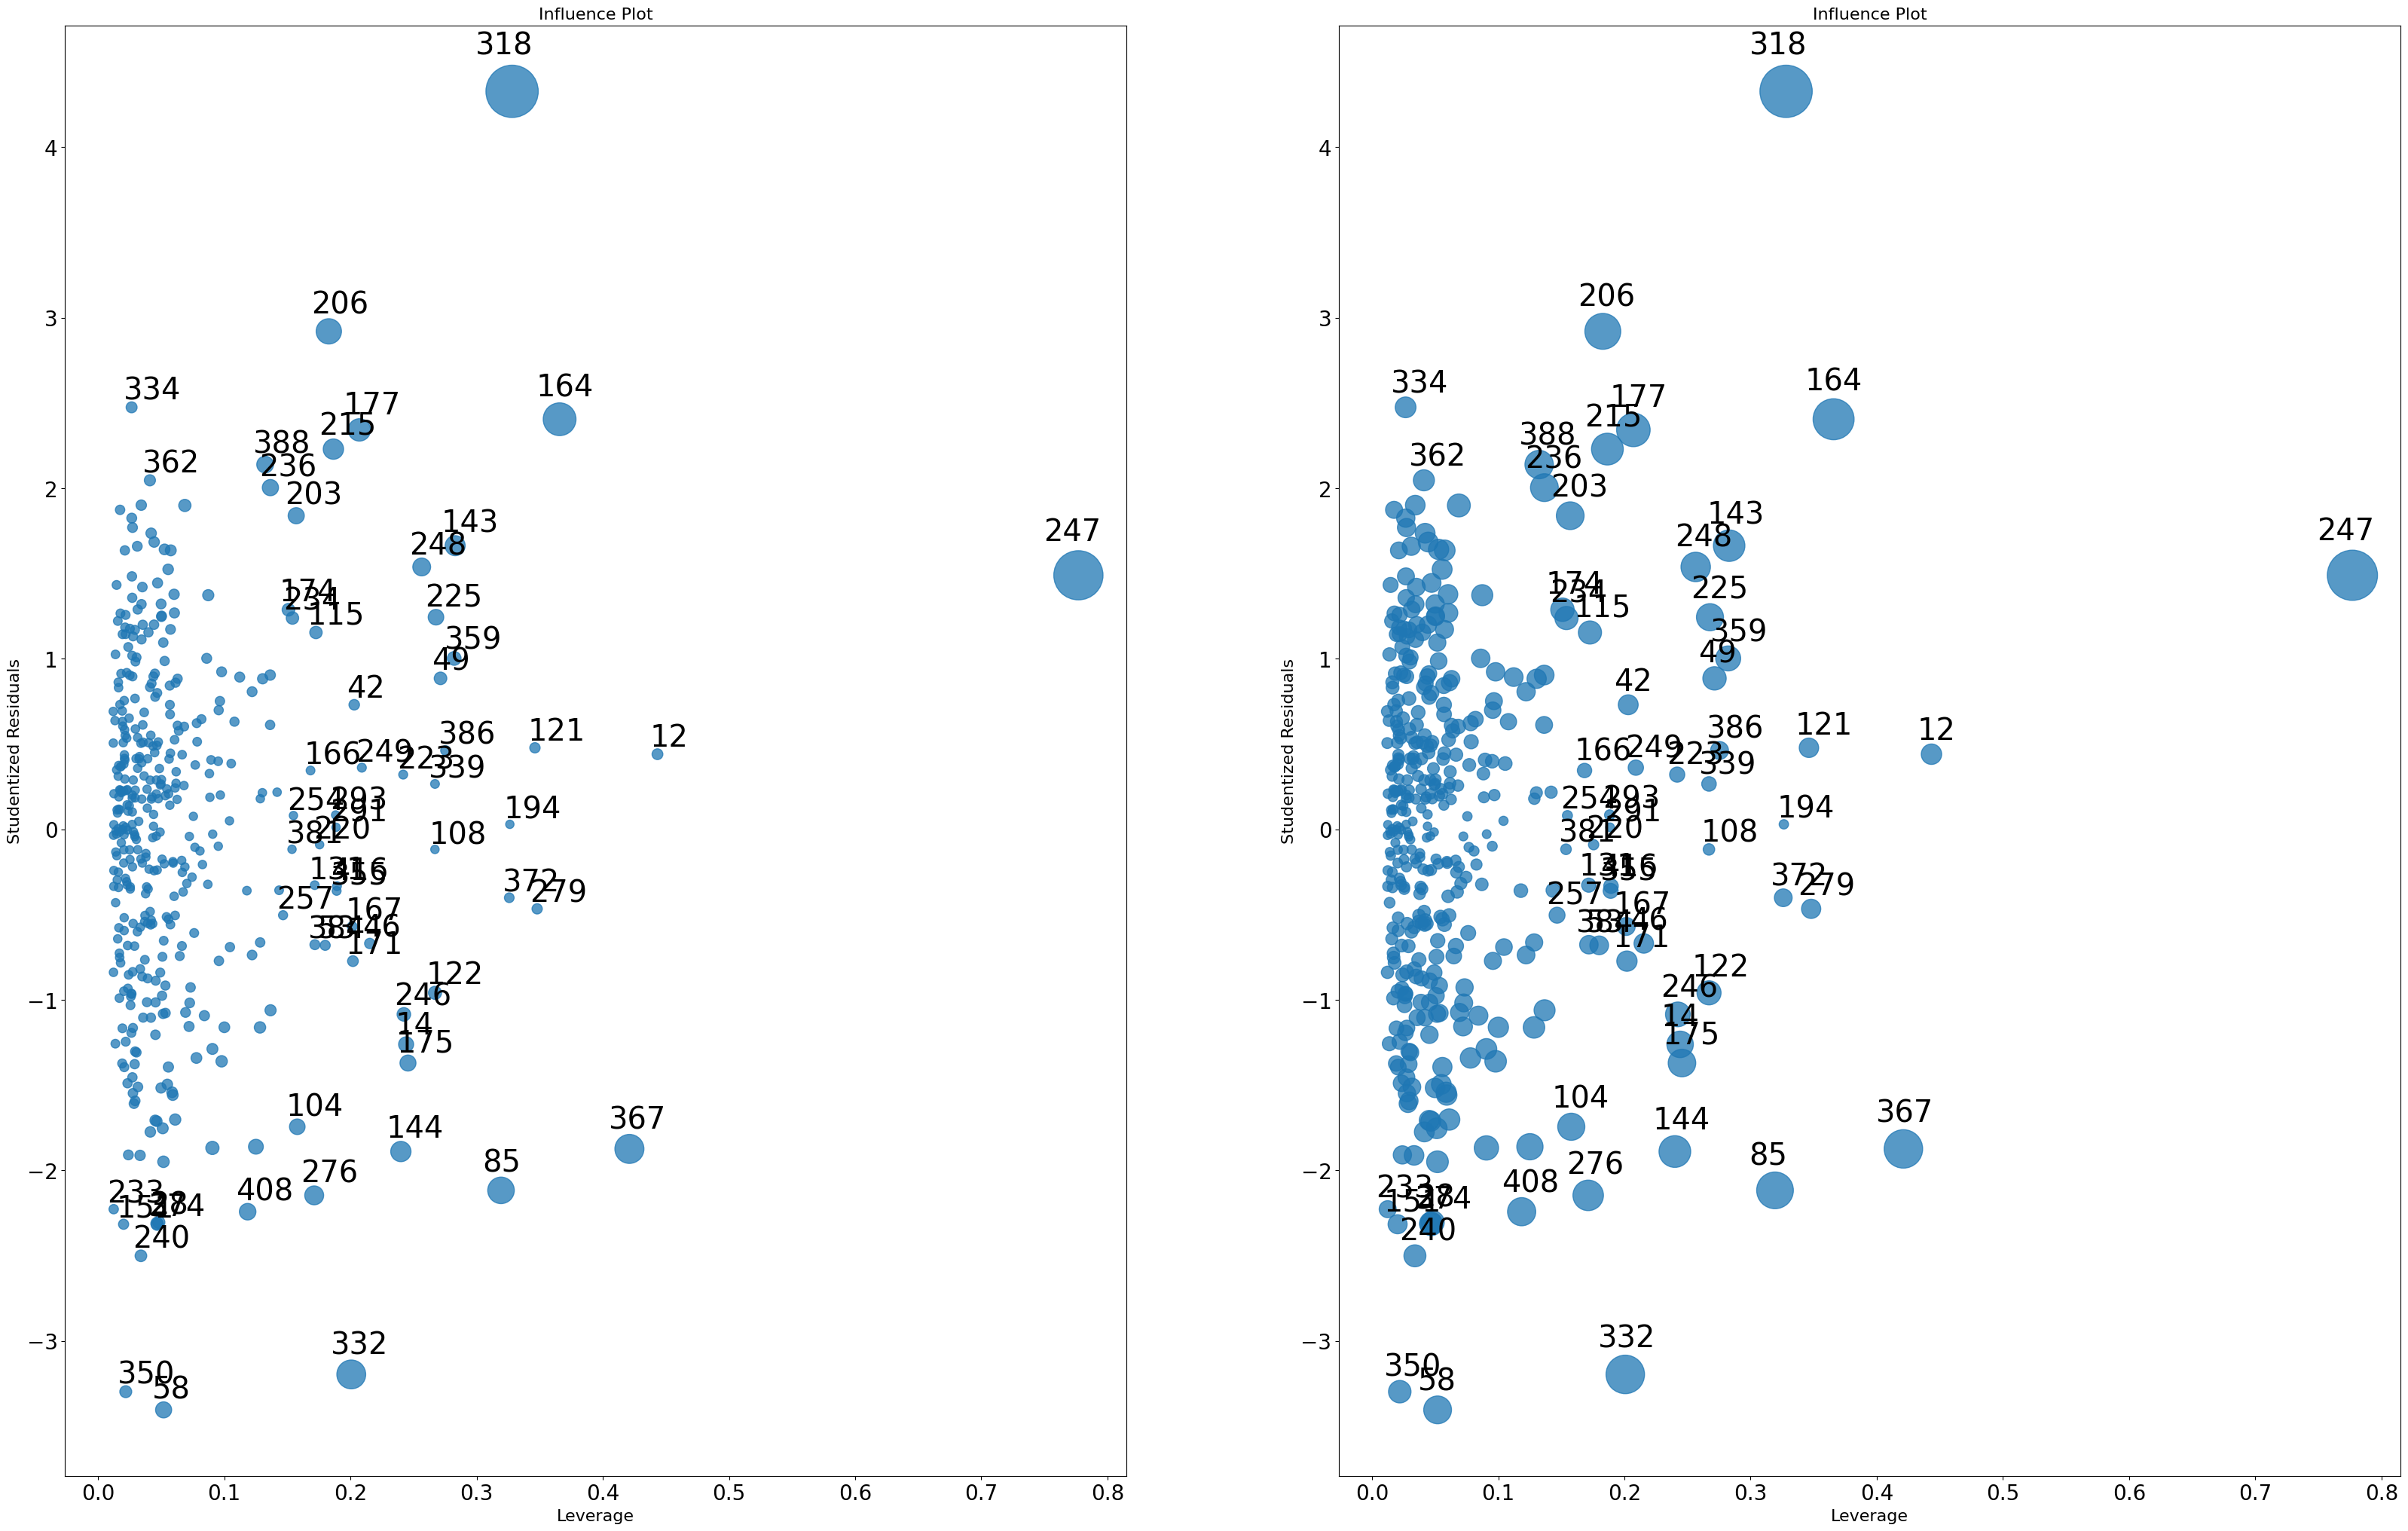

In [170]:
#Plot influential observations by cooks distance
#Use residual squared to restrict the graph but preserve the relative position of observations

from statsmodels.graphics.regressionplots import *
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(40, 25))
plt.rcParams['font.size'] = '20'
plt.rc('figure', titlesize = 30)
influence_plot(final_model2, ax=ax1, size=50)


plt.rcParams['font.size'] = '20'
influence_plot(final_model2, ax=ax2, size=50, criterion='DFFITS')
plt.show()

In [172]:
## Influential cases by DFFITS
thres_dfts_m2 = 2*math.sqrt((len(final_features2)+1)/len(inf_sum_m2.y2))
inf_dffits_m2 = pd.DataFrame(inf_sum_m2[['y2','dffits']][abs(inf_sum_m2.dffits) > thres_dfts_m2])
inf_dffits_m2  

y2    dffits
14   0.011474 -0.716443
58  -0.076741 -0.796683
85  -0.035421 -1.449916
104 -0.039558 -0.755022
122  0.083375 -0.578518
143  0.029739  1.045236
144  0.003452 -1.061470
164  0.034401  1.826600
175  0.081211 -0.781759
177  0.079713  1.197259
203 -0.004351  0.793928
206  0.047197  1.381668
215  0.061923  1.067808
225  0.081026  0.752536
236  0.007203  0.797081
241 -0.055140 -0.703641
246  0.039995 -0.613454
247  0.090562  2.781199
248 -0.055140  0.903928
276 -0.061286 -0.975696
318 -0.021911  3.024549
332 -0.179878 -1.601374
359  0.057267  0.628667
367 -0.060235 -1.598054
388  0.067296  0.835777
400  0.040300 -0.589622
408  0.041508 -0.822144

Text(0.5, 1.0, 'Index Influece plot - DFFITS')

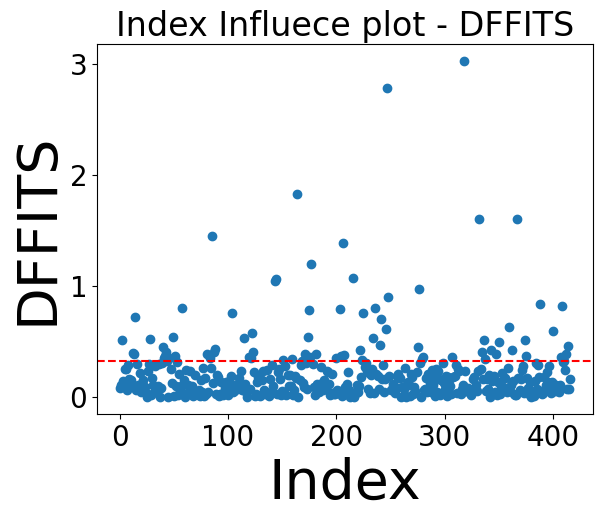

In [173]:
thres_dfts_m2=0.3248
plt.scatter(x= range(0,len(inf_sum_m2.y2)), y = abs(inf_sum_m2.dffits))
plt.axhline(y = thres_dfts_m2, color = 'r', linestyle = '--')
plt.rcParams['font.size'] = '20'
plt.xlabel("Index")
plt.ylabel("DFFITS")
plt.title("Index Influece plot - DFFITS")

In [174]:

import scipy
thres_cooks_m2 = 3*inf_sum_m2.cooks_d.mean()
inf_cooks_m2=pd.DataFrame((inf_sum_m2[['y2', 'cooks_d']][abs(inf_sum_m2.cooks_d) > thres_cooks_m2]))
inf_cooks_m2

y2   cooks_d
14   0.011474  0.016016
58  -0.076741  0.019308
85  -0.035421  0.065111
104 -0.039558  0.017721
143  0.029739  0.033986
144  0.003452  0.034978
164  0.034401  0.102994
175  0.081211  0.019055
177  0.079713  0.044282
203 -0.004351  0.019577
206  0.047197  0.058521
215  0.061923  0.035270
225  0.081026  0.017672
236  0.007203  0.019701
241 -0.055140  0.015375
247  0.090562  0.240963
248 -0.055140  0.025444
276 -0.061286  0.029476
318 -0.021911  0.273377
332 -0.179878  0.078278
367 -0.060235  0.079292
388  0.067296  0.021629
408  0.041508  0.020906

Text(0.5, 1.0, 'Index Influence plot')

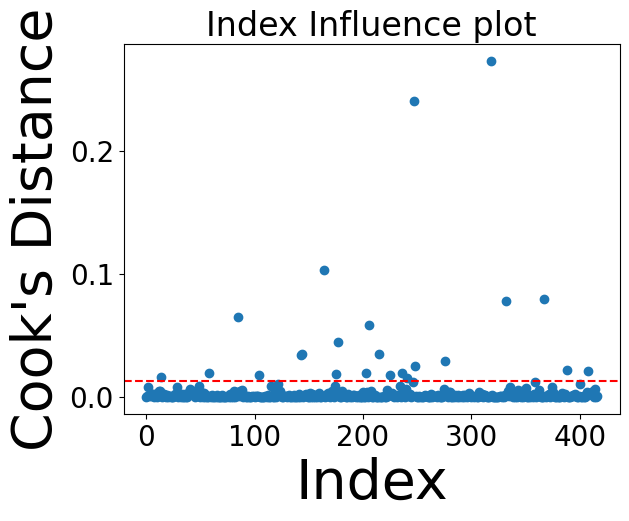

In [175]:
plt.scatter(x= range(0,len(inf_sum_m2.y2)), y = inf_sum_m2.cooks_d)
plt.axhline(y = thres_cooks_m2, color = 'r', linestyle = '--')
plt.rcParams['font.size'] = '20'
plt.xlabel("Index")
plt.ylabel("Cook's Distance")
plt.title("Index Influence plot")

# Removing outliers

In [177]:
X_final_m2 = final2_standardized.drop(list(inf_cooks_m2.index), inplace= False)
X_final_m2

x1  x3  x4        x7  x9       x10  x8_2  x8_3      x1^2      x7^2  \
0    0.379089   0   1  0.371574   1  0.497552     1     0  0.143709  0.138067   
1    0.406649   1   1  0.372147   0  0.493663     0     0  0.165364  0.138494   
2    0.375799   1   1  0.372073   1  0.521149     1     0  0.141225  0.138438   
3    0.373395   1   1  0.371649   1  0.490039     1     0  0.139424  0.138123   
4    0.401890   1   1  0.371899   0  0.493010     1     0  0.161516  0.138309   
..        ...  ..  ..       ...  ..       ...   ...   ...       ...       ...   
412  0.405269   1   1  0.372444   0  0.502713     0     0  0.164243  0.138714   
413  0.400326   1   1  0.372147   0  0.485231     0     0  0.160261  0.138494   
414  0.381604   1   1  0.372073   0  0.524601     1     0  0.145622  0.138438   
415  0.365498   0   1  0.371424   1  0.456243     0     1  0.133589  0.137955   
416  0.417903   1   1  0.372394   0  0.490231     0     0  0.174643  0.138678   

     ...  x10*x8_2    x10*x4    x10*x3    x10*x9     x1*x7    x1*x10  \
0    ...  0.497552  0.497552  0.000000  0.497552  0.140860  0.188617   
1    ...  0.000000  0.493663  0.493663  0.000000  0.151333  0.200748   
2    ...  0.521149  0.521149  0.521149  0.521149  0.139824  0.195847   
3    ...  0.490039  0.490039  0.490039  0.490039  0.138772  0.182978   
4    ...  0.493010  0.493010  0.493010  0.000000  0.149463  0.198136   
..   ...       ...       ...       ...       ...       ...       ...   
412  ...  0.000000  0.502713  0.502713  0.000000  0.150940  0.203734   
413  ...  0.000000  0.485231  0.485231  0.000000  0.148980  0.194251   
414  ...  0.524601  0.524601  0.524601  0.000000  0.141985  0.200190   
415  ...  0.000000  0.456243  0.000000  0.456243  0.135754  0.166756   
416  ...  0.000000  0.490231  0.490231  0.000000  0.155625  0.204869   

        x7*x1    x7*x10    x10*x1    x10*x7  
0    0.140860  0.184878  0.188617  0.184878  
1    0.151333  0.183715  0.200748  0.183715  
2    0.139824  0.193905  0.195847  0.193905  
3    0.138772  0.182123  0.182978  0.182123  
4    0.149463  0.183350  0.198136  0.183350  
..        ...       ...       ...       ...  
412  0.150940  0.187232  0.203734  0.187232  
413  0.148980  0.180578  0.194251  0.180578  
414  0.141985  0.195190  0.200190  0.195190  
415  0.135754  0.169459  0.166756  0.169459  
416  0.155625  0.182559  0.204869  0.182559  

[394 rows x 32 columns]

In [178]:
Y_final_m2 = pd.DataFrame(Y_std2)
Y_final_m2

y_std2
0    0.007695
1    0.084061
2   -0.011432
3   -0.015277
4    0.046538
..        ...
412  0.112008
413  0.077458
414 -0.000488
415 -0.050387
416  0.073058

[417 rows x 1 columns]

In [179]:
Y_final_m2.drop(list(inf_cooks_m2.index) , inplace = True)
Y_final_m2

y_std2
0    0.007695
1    0.084061
2   -0.011432
3   -0.015277
4    0.046538
..        ...
412  0.112008
413  0.077458
414 -0.000488
415 -0.050387
416  0.073058

[394 rows x 1 columns]

# Building the Final Model

In [180]:
model_final2 = sm.OLS(Y_final_m2['y_std2'], X_final_m2[final_features2]).fit()
pred_final2 = model_final2.predict(X_final_m2[final_features2])
residuals_final2 = Y_final_m2['y_std2'] - model_final2.predict(X_final_m2[final_features2])
summary_final2 = model_final2.summary()
print(summary_final2)

                                 OLS Regression Results                                
Dep. Variable:                 y_std2   R-squared (uncentered):                   0.880
Model:                            OLS   Adj. R-squared (uncentered):              0.871
Method:                 Least Squares   F-statistic:                              92.40
Date:                Sat, 20 Apr 2024   Prob (F-statistic):                   3.32e-149
Time:                        00:52:58   Log-Likelihood:                          1055.8
No. Observations:                 394   AIC:                                     -2054.
Df Residuals:                     365   BIC:                                     -1938.
Df Model:                          29                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

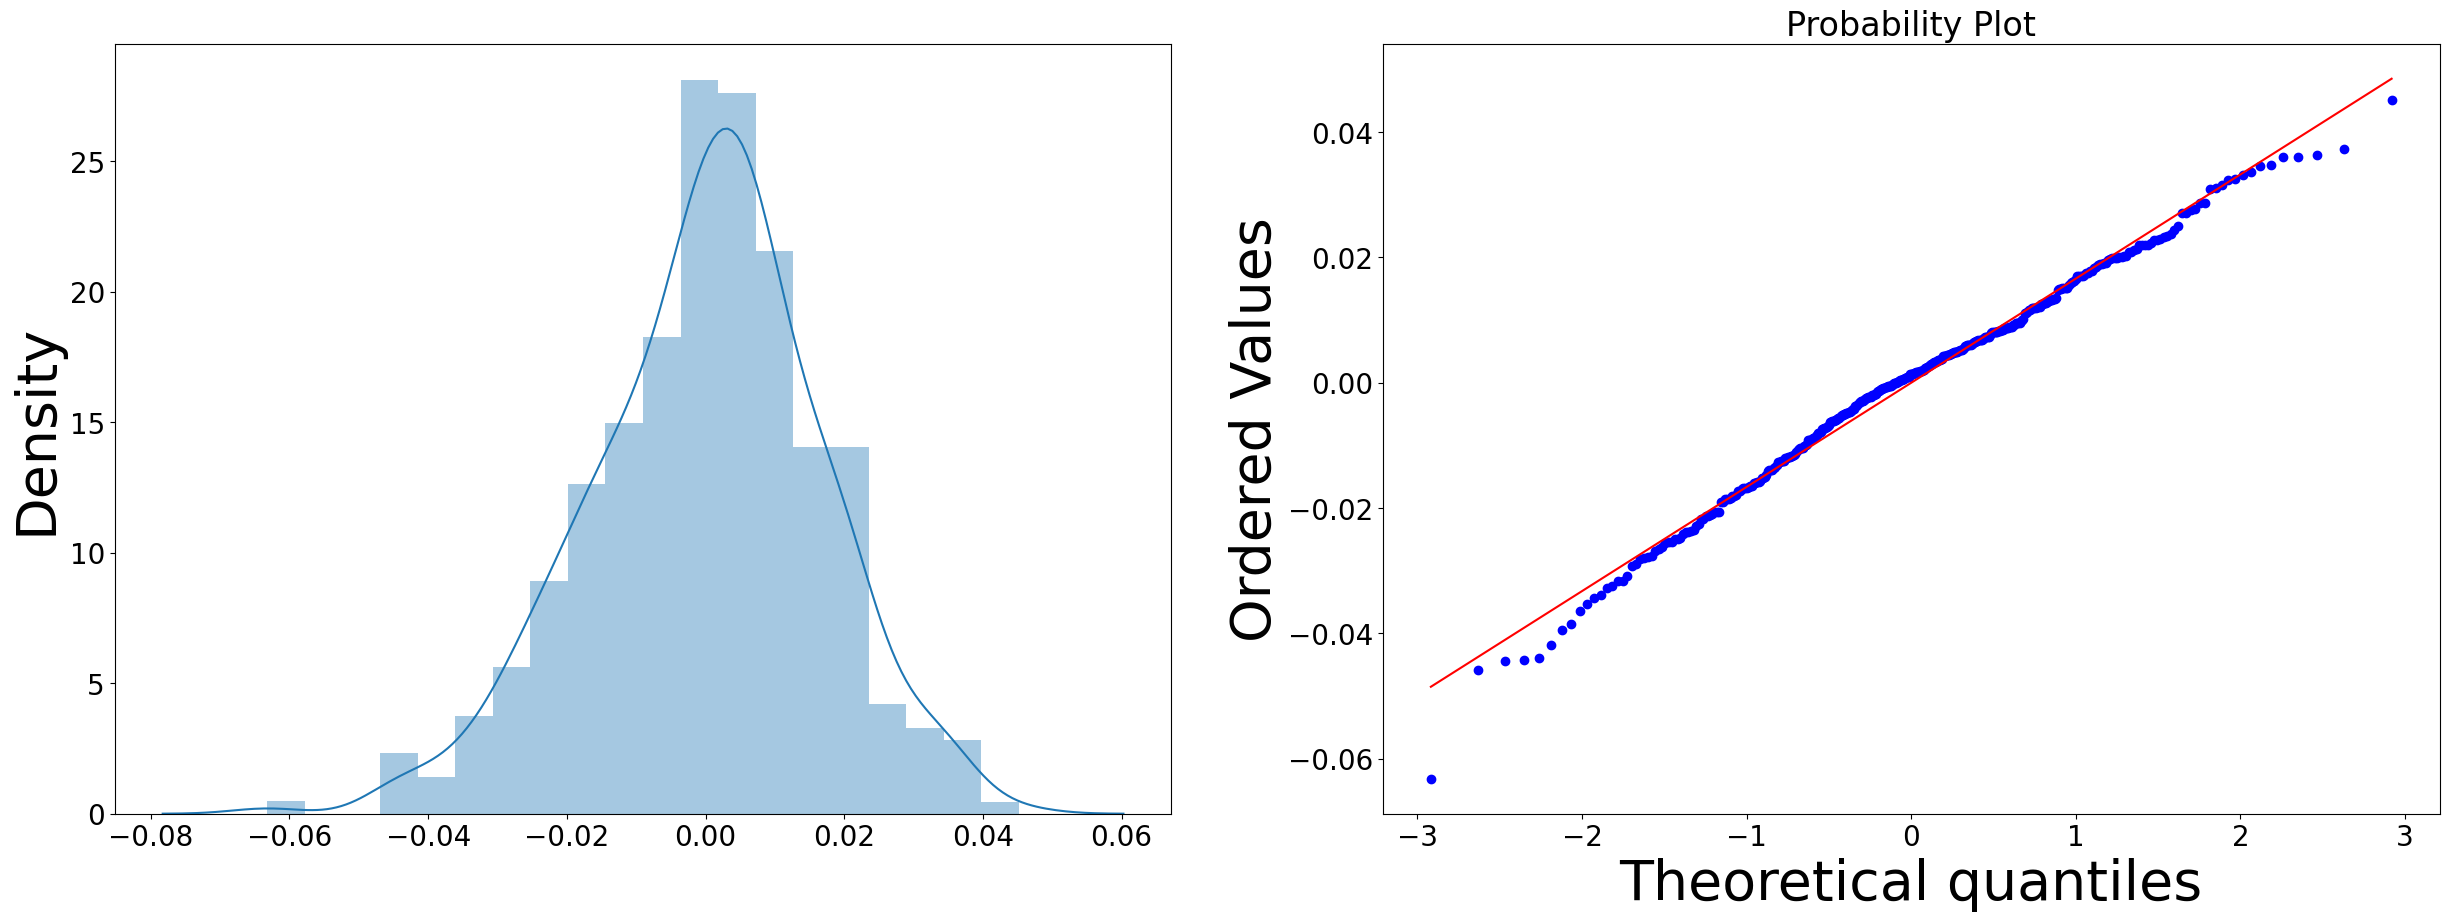

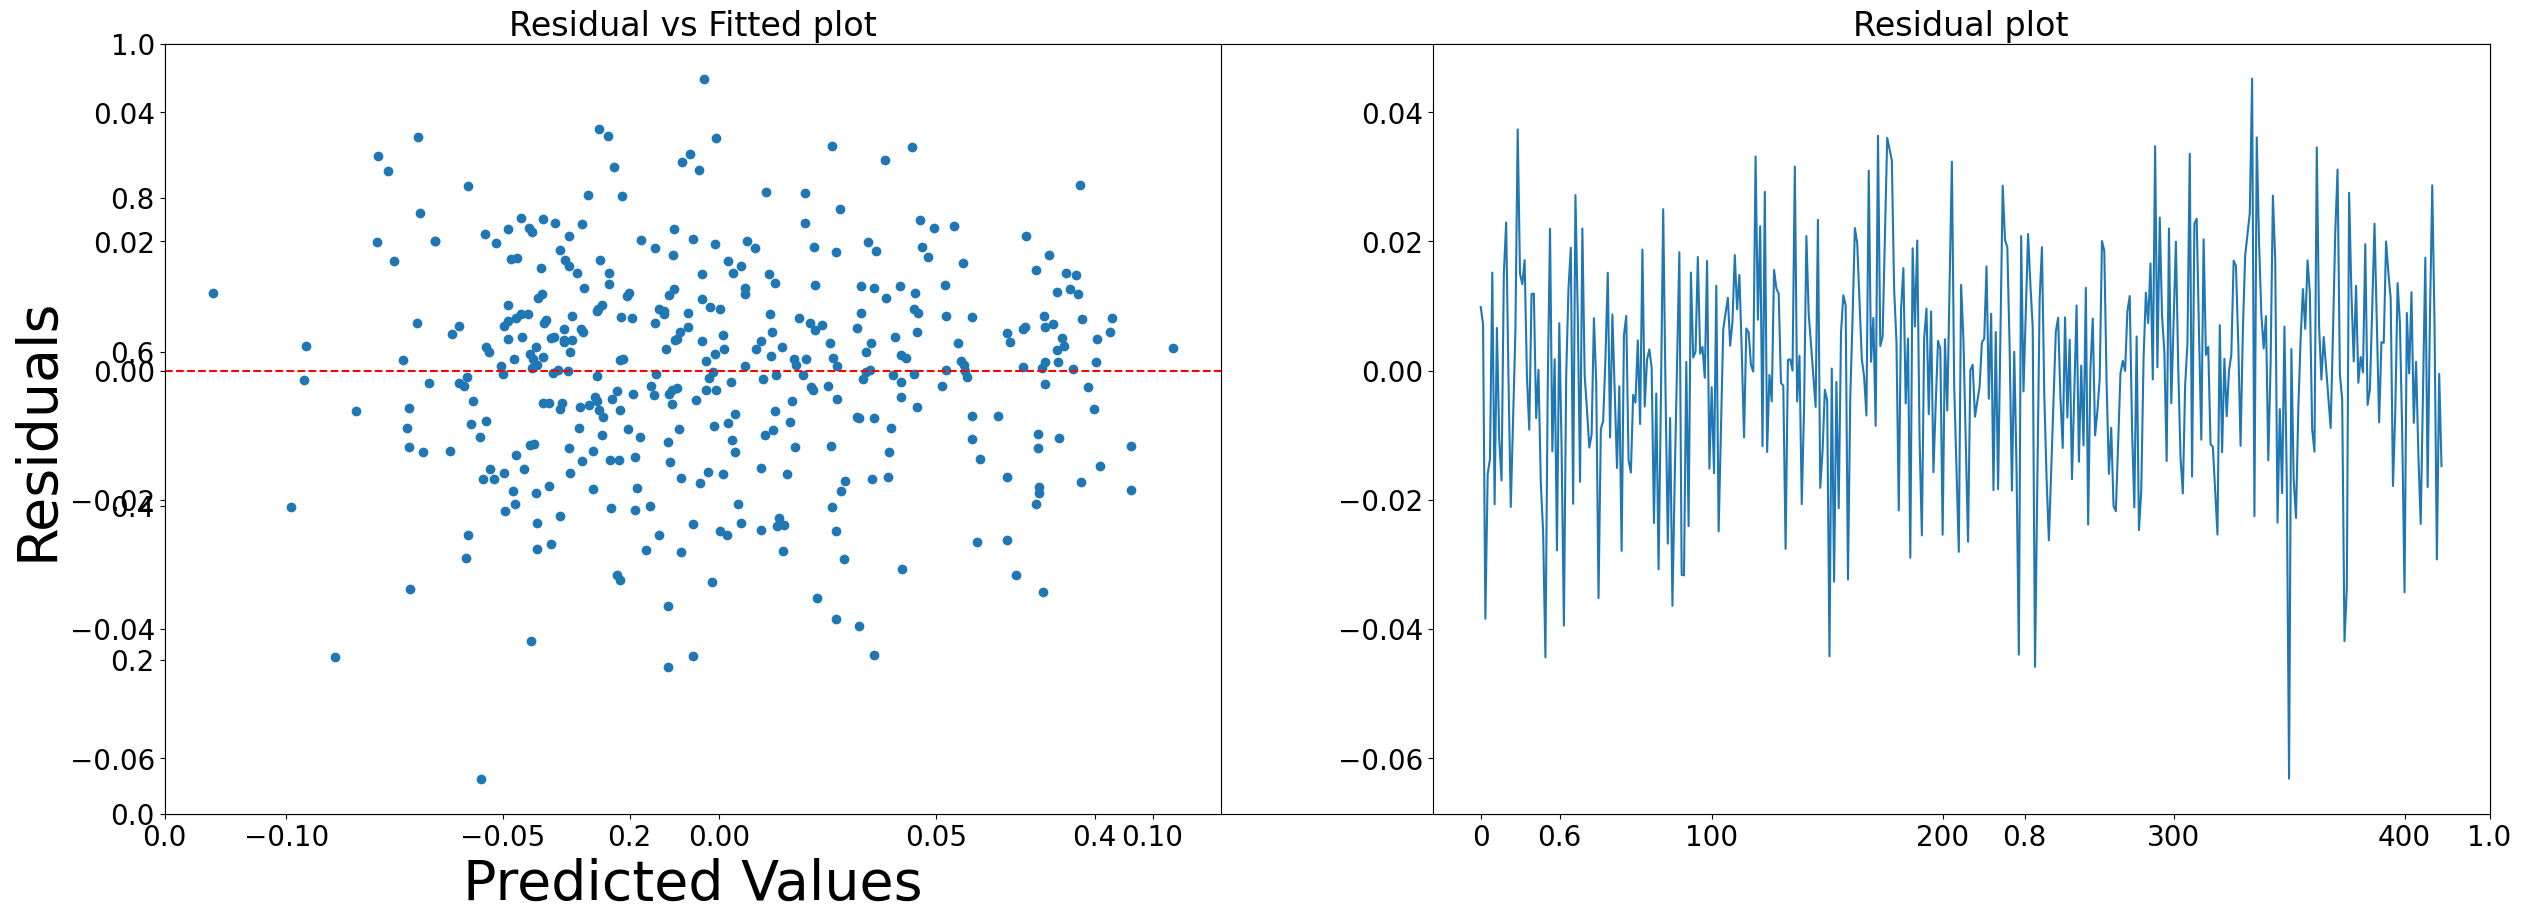

In [181]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
#plt.rcParams['font.size'] = '20'
sns.distplot(residuals_final2, ax = ax1)
plt.title("Residual density plot")

sp.stats.probplot(residuals_final2,plot=ax2,fit=True)
plt.show()

plt.subplots(figsize=(30, 10))
#plt.rcParams['font.size'] = '20'
plt.subplot(1, 2, 1)
plt.scatter(pred_final2,residuals_final2)
plt.title("Residual vs Fitted plot")
# Draw a horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")


plt.subplot(1, 2, 2)
plt.plot(residuals_final2)
plt.title("Residual plot")
plt.show()

# Multicollinearity Detection

In [183]:
# Function to calculate VIF
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

lm2 = sm.OLS(Y_final_m2['y_std2'], X_final_m2[final_features2]).fit()
calculate_vif(X_final_m2[final_features2])

Var           Vif
31    x10*x7           inf
30    x10*x1           inf
29    x7*x10           inf
28     x7*x1           inf
27    x1*x10           inf
26     x1*x7           inf
3         x7  3.674680e+09
9       x7^2  3.611624e+09
0         x1  2.574957e+09
5        x10  1.896734e+09
6       x8_2  1.884807e+07
7       x8_3  1.883549e+07
17   x7*x8_2  1.850585e+07
16   x7*x8_3  1.823389e+07
2         x4  1.516207e+07
18     x7*x4  1.511372e+07
19     x7*x3  6.438301e+06
1         x3  6.402833e+06
4         x9  3.739313e+06
20     x7*x9  3.731607e+06
8       x1^2  1.929661e+06
10     x10^2  3.184701e+05
11   x1*x8_3  2.696619e+04
12   x1*x8_2  2.204862e+04
21  x10*x8_3  1.231625e+04
22  x10*x8_2  1.213942e+04
13     x1*x4  1.186368e+04
14     x1*x3  1.150940e+04
23    x10*x4  6.200470e+03
15     x1*x9  4.440210e+03
24    x10*x3  4.147770e+03
25    x10*x9  3.401820e+03

In [189]:
vif_df = pd.DataFrame(calculate_vif(X_final_m2[final_features2]))
vif_df

Var           Vif
31    x10*x7           inf
30    x10*x1           inf
29    x7*x10           inf
28     x7*x1           inf
27    x1*x10           inf
26     x1*x7           inf
3         x7  3.674680e+09
9       x7^2  3.611624e+09
0         x1  2.574957e+09
5        x10  1.896734e+09
6       x8_2  1.884807e+07
7       x8_3  1.883549e+07
17   x7*x8_2  1.850585e+07
16   x7*x8_3  1.823389e+07
2         x4  1.516207e+07
18     x7*x4  1.511372e+07
19     x7*x3  6.438301e+06
1         x3  6.402833e+06
4         x9  3.739313e+06
20     x7*x9  3.731607e+06
8       x1^2  1.929661e+06
10     x10^2  3.184701e+05
11   x1*x8_3  2.696619e+04
12   x1*x8_2  2.204862e+04
21  x10*x8_3  1.231625e+04
22  x10*x8_2  1.213942e+04
13     x1*x4  1.186368e+04
14     x1*x3  1.150940e+04
23    x10*x4  6.200470e+03
15     x1*x9  4.440210e+03
24    x10*x3  4.147770e+03
25    x10*x9  3.401820e+03

In [185]:
# Assuming you have your VIF values stored in a DataFrame named vif_df with columns 'Var' and 'Vif'
# Example:
# vif_df = your_dataframe_containing_vif_values

# Set a threshold for high VIF values
threshold = 10

# Filter out variables with VIF values above the threshold
high_vif_variables = vif_df[vif_df['Vif'] > threshold]['Var'].tolist()

# Print the variables with high VIF values
print("Variables with high VIF values:")
print(high_vif_variables)

Variables with high VIF values:
['x10*x7', 'x10*x1', 'x7*x10', 'x7*x1', 'x1*x10', 'x1*x7', 'x7', 'x7^2', 'x1', 'x10', 'x8_2', 'x8_3', 'x7*x8_2', 'x7*x8_3', 'x4', 'x7*x4', 'x7*x3', 'x3', 'x9', 'x7*x9', 'x1^2', 'x10^2', 'x1*x8_3', 'x1*x8_2', 'x10*x8_3', 'x10*x8_2', 'x1*x4', 'x1*x3', 'x10*x4', 'x1*x9', 'x10*x3', 'x10*x9']


In [187]:
df=X_final_m2.drop(columns=high_vif_variables)

In [188]:
df

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, ...]

[394 rows x 0 columns]